# Data Ingestion

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import  SelectFromModel

## Data Loading

In [96]:
data = pd.read_csv('data.csv', encoding='latin-1', sep=';')
pd.pandas.set_option('display.max_columns', None)

print("Data contains ", data.shape[0]," rows and ", data.shape[1]," columns")

Data contains  1267  rows and  24  columns


In [28]:
# get count of each unique value of Ktas expert

print(data['KTAS_expert'].value_counts())

3    487
4    459
2    220
5     75
1     26
Name: KTAS_expert, dtype: int64


In [29]:
#count number of unique values of chief complain
print(data['Chief_complain'].nunique())

print(data['Diagnosis in ED'].nunique())

417
583


In [30]:

print(data['Chief_complain'].value_counts())

#save this values on chief complain txt file with value - count format
data['Chief_complain'].value_counts().to_csv('chief_complain.txt', sep='\t', header=False)

abd pain                   72
dyspnea                    60
dizziness                  59
fever                      45
ant. chest pain            44
                           ..
Throat Pain                 1
facial painful swelling     1
toe pain                    1
left eye swelling           1
orthopnea                   1
Name: Chief_complain, Length: 417, dtype: int64


## Head

In [97]:
data.head()

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0      2    2   71                         3             3       2   
1      1    1   56                        12             3       2   
2      2    1   68                         8             2       2   
3      1    2   71                         8             1       1   
4      1    2   58                         4             3       1   

       Chief_complain  Mental  Pain NRS_pain  SBP  DBP   HR  RR    BT  \
0   right ocular pain       1     1        2  160  100   84  18  36.6   
1  right forearm burn       1     1        2  137   75   60  20  36.5   
2        arm pain, Lt       1     1        2  130   80  102  20  36.6   
3     ascites tapping       1     1        3  139   94   88  20  36.5   
4     distension, abd       1     1        3   91   67   93  18  36.5   

  Saturation  KTAS_RN                               Diagnosis in ED  \
0        100        2                              Corneal abrasion   
1        NaN        4             Burn of hand, firts degree dorsum   
2         98        4  Fracture of surgical neck of humerus, closed   
3        NaN        4        Alcoholic liver cirrhosis with ascites   
4        NaN        4                                       Ascites   

   Disposition  KTAS_expert  Error_group  Length of stay_min  \
0            1            4            2                  86   
1            1            5            4                  64   
2            2            5            4                 862   
3            1            5            6                 108   
4            1            5            8                 109   

  KTAS duration_min  mistriage  
0              5,00          1  
1              3,95          1  
2              1,00          1  
3              9,83          1  
4              6,60          1

# Exploratory Data Analysis (EDA)

## Data Types




### Group
**Description:** Group categorization.

**Categories:**
- 1 (Local ED)
- 2 (Reginal ED)

**Type:** Categorical Nominal

### Sex
**Description:** Patient's sex.

**Categories:**
- 1 (Female)
- 2 (Male)

**Type:** Categorical Nominal

### Age 
**Description:** Patient's age.

**Type:** Numerical Discrete

### Patient number per hour
**Description:** Number of patients in the Emergency Department per hour.

**Type:** Numerical Discrete

### Arrival mode
**Description:** How patients arrive at the Emergency Department.

**Categories:**
- 1 (Walking)
- 2 (Public Ambulance)
- 3 (Private Vehicle)
- 4 (Private Ambulance)
- 5 (Public transport)
- 6 (Wheelchair)
- 7 (Other)

**Type:** Categorical Nominal 

### Injury 
**Description:** Whether the patient is injured or not.

**Categories:**
- 1 (No)
- 2 (Yes)

**Type:** Categorical Nominal

### Chief_complain
**Description:** The patient's complaint.

**Type:** Categorical Nominal 

### Mental
**Description:** The mental state of the patient.

**Categories:**
- 1 (Alert)
- 2 (Verbal Response)
- 3 (Pain Response)
- 4 (Unresponsive)

**Type:** Categorical Nominal

### Pain
**Description:** Whether the patient has pain.

**Categories:**
- 1 (Yes)
- 0 (No)

**Type:** Binary

### NRS_pain
**Description:** Numerical rating scales of pain

**Type:** Numeric Discrete

### SBP
**Description:** Systolic Blood Pressure.

**Type:** Numeric Continuous

### DBP
**Description:** Diastolic Blood Pressure.

**Type:** Numeric Continuous

### HR
**Description:** Heart Rate.

**Type:** Numeric Continuous

### RR
**Description:** Respiratory Rate.

**Type:** Numeric Continuous

### BT
**Description:** Body Temperature.

**Type:** Numeric Continuous

### Saturation
**Description:** Saturation using oximeter

**Type:** Numeric Continuous

### KTAS_RN
**Description:** Triage result of nurse in ED

**Categories:**
- 1,2,3 = Emergency
- 4,5 = Non-Emergency

**Type:** Numeric Continuous

### Disposition
**Description:** Action to be taken

**Categories:**
- 1 (Discharge)
- 2 (Admission to ward)
- 3 (Admission to ICU)
- 4 (AMA discharge)
- 5 (Transfer)
- 6 (Death)
- 7 (OP fom ED)

**Type:** Categorical Nominal

### Error_Group
**Categories:**
- 1 (Vital Sign)
- 2 (Physical exame)
- 3 (Psychatric)
- 4 (Pain)
- 5 (Mental)
- 6 (Underlying Disease)
- 7 (Medical records of other ED)
- 8 (On set)
- 9 (Other)

**Type:** Categorical Nominal

### Length of stay_min
**Description:** Length of stay in ED (minutes)

**Type:** Numeric Continuous
### KTAS duration_min
**Description:** Length of Triage (minutes)

**Type:** Numeric Continous 

### Mistriage
**Categories:**
- 0 (Correct)
- 1 (Over Triage)
- 2 (Under Triage)

**Type:** Categorical Nominal

In [76]:
data.dtypes

Group                        int64
Sex                          int64
Age                          int64
Patients number per hour     int64
Arrival mode                 int64
Injury                       int64
Chief_complain              object
Mental                       int64
Pain                         int64
NRS_pain                    object
SBP                         object
DBP                         object
HR                          object
RR                          object
BT                          object
Saturation                  object
KTAS_RN                      int64
Diagnosis in ED             object
Disposition                  int64
KTAS_expert                  int64
Error_group                  int64
Length of stay_min           int64
KTAS duration_min           object
mistriage                    int64
dtype: object

## Statistical Summary

In [77]:
#data.describe().T
data.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

count          mean           std   min    25%  \
Group                     1267.0      1.456985      0.498343   1.0    1.0   
Sex                       1267.0      1.521705      0.499726   1.0    1.0   
Age                       1267.0     54.423836     19.725033  16.0   37.0   
Patients number per hour  1267.0      7.519337      3.160563   1.0    5.0   
Arrival mode              1267.0      2.820837      0.807904   1.0    2.0   
Injury                    1267.0      1.192581      0.394482   1.0    1.0   
Mental                    1267.0      1.105762      0.447768   1.0    1.0   
Pain                      1267.0      0.563536      0.496143   0.0    0.0   
KTAS_RN                   1267.0      3.335438      0.885391   1.0    3.0   
Disposition               1267.0      1.609313      1.157983   1.0    1.0   
KTAS_expert               1267.0      3.265983      0.885803   1.0    3.0   
Error_group               1267.0      0.558011      1.571489   0.0    0.0   
Length of stay_min        1267.0  11016.102605  80446.092065   0.0  133.0   
mistriage                 1267.0      0.250197      0.628250   0.0    0.0   

                            50%    75%     90%      95%        99%       max  
Group                       1.0    2.0     2.0      2.0       2.00       2.0  
Sex                         2.0    2.0     2.0      2.0       2.00       2.0  
Age                        57.0   71.0    79.0     82.0      88.00      96.0  
Patients number per hour    7.0   10.0    12.0     13.0      15.00      17.0  
Arrival mode                3.0    3.0     4.0      4.0       5.00       7.0  
Injury                      1.0    1.0     2.0      2.0       2.00       2.0  
Mental                      1.0    1.0     1.0      2.0       3.34       4.0  
Pain                        1.0    1.0     1.0      1.0       1.00       1.0  
KTAS_RN                     3.0    4.0     4.0      5.0       5.00       5.0  
Disposition                 1.0    2.0     2.0      4.0       7.00       7.0  
KTAS_expert                 3.0    4.0     4.0      5.0       5.00       5.0  
Error_group                 0.0    0.0     2.0      4.0       8.00       9.0  
Length of stay_min        274.0  606.5  9074.2  10094.4  698702.96  709510.0  
mistriage                   0.0    0.0     2.0      2.0       2.00       2.0

## Null Values

In [78]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Saturation         688
Diagnosis in ED      2
dtype: int64


## Unique Values

In [79]:
for column in data.columns:
  print('Column ', column, ' has ', data[column].nunique(), ' unique values')

Column  Group  has  2  unique values
Column  Sex  has  2  unique values
Column  Age  has  81  unique values
Column  Patients number per hour  has  16  unique values
Column  Arrival mode  has  7  unique values
Column  Injury  has  2  unique values
Column  Chief_complain  has  417  unique values
Column  Mental  has  4  unique values
Column  Pain  has  2  unique values
Column  NRS_pain  has  11  unique values
Column  SBP  has  127  unique values
Column  DBP  has  83  unique values
Column  HR  has  94  unique values
Column  RR  has  11  unique values
Column  BT  has  46  unique values
Column  Saturation  has  22  unique values
Column  KTAS_RN  has  5  unique values
Column  Diagnosis in ED  has  583  unique values
Column  Disposition  has  7  unique values
Column  KTAS_expert  has  5  unique values
Column  Error_group  has  10  unique values
Column  Length of stay_min  has  716  unique values
Column  KTAS duration_min  has  392  unique values
Column  mistriage  has  3  unique values


In [80]:
#distribution of all variables histograms
data.hist(bins=25, figsize=(20,15))
plt.show()

KeyboardInterrupt: 

## Target Distribution Graph

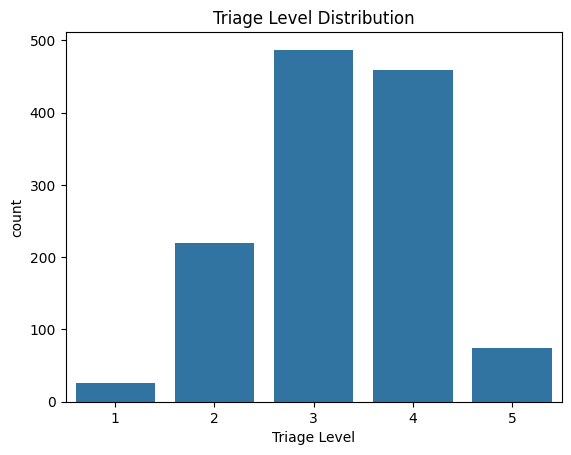

In [ ]:
#Plot the distribution of the target variable with x by order
sb.countplot(x='KTAS_expert', data=data)
plt.xlabel('Triage Level')
plt.title('Triage Level Distribution')
plt.show()

# Data Preprocessing

## Feature Engineering

### Replacing "??" and "#BO�!" for null values

In [98]:
data['NRS_pain'] = data[["NRS_pain"]].replace("#BOÞ!",0)


cols_to_clean = ["SBP", "DBP", "HR", "RR", "BT", "Saturation"]
data[cols_to_clean] = data[cols_to_clean].replace("??", np.NaN)

## count how many "??" in selected columns after cleaning
print("\nAfter cleaning:")
for col in cols_to_clean:
    print(f"{col}: {data[col].value_counts().get('??', 0)}")


After cleaning:
SBP: 0
DBP: 0
HR: 0
RR: 0
BT: 0
Saturation: 0


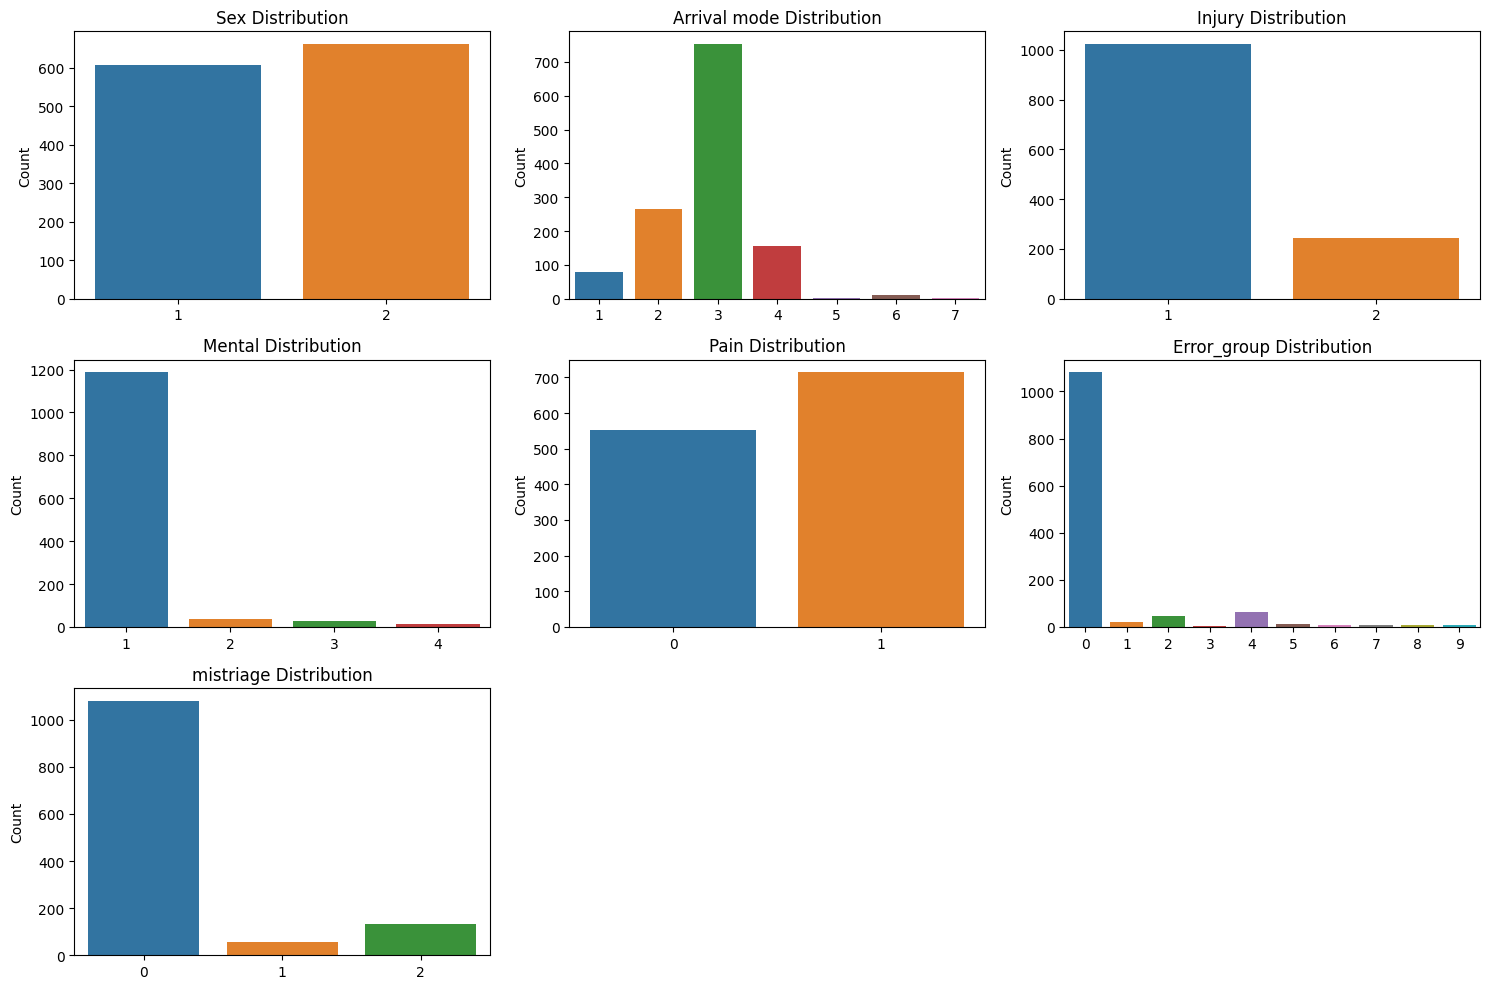

In [4]:
categorical_columns = ['Sex', 'Arrival mode', 'Injury', 'Mental', 'Pain', 'Error_group', 'mistriage']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sb.countplot(x=column, data=data)
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

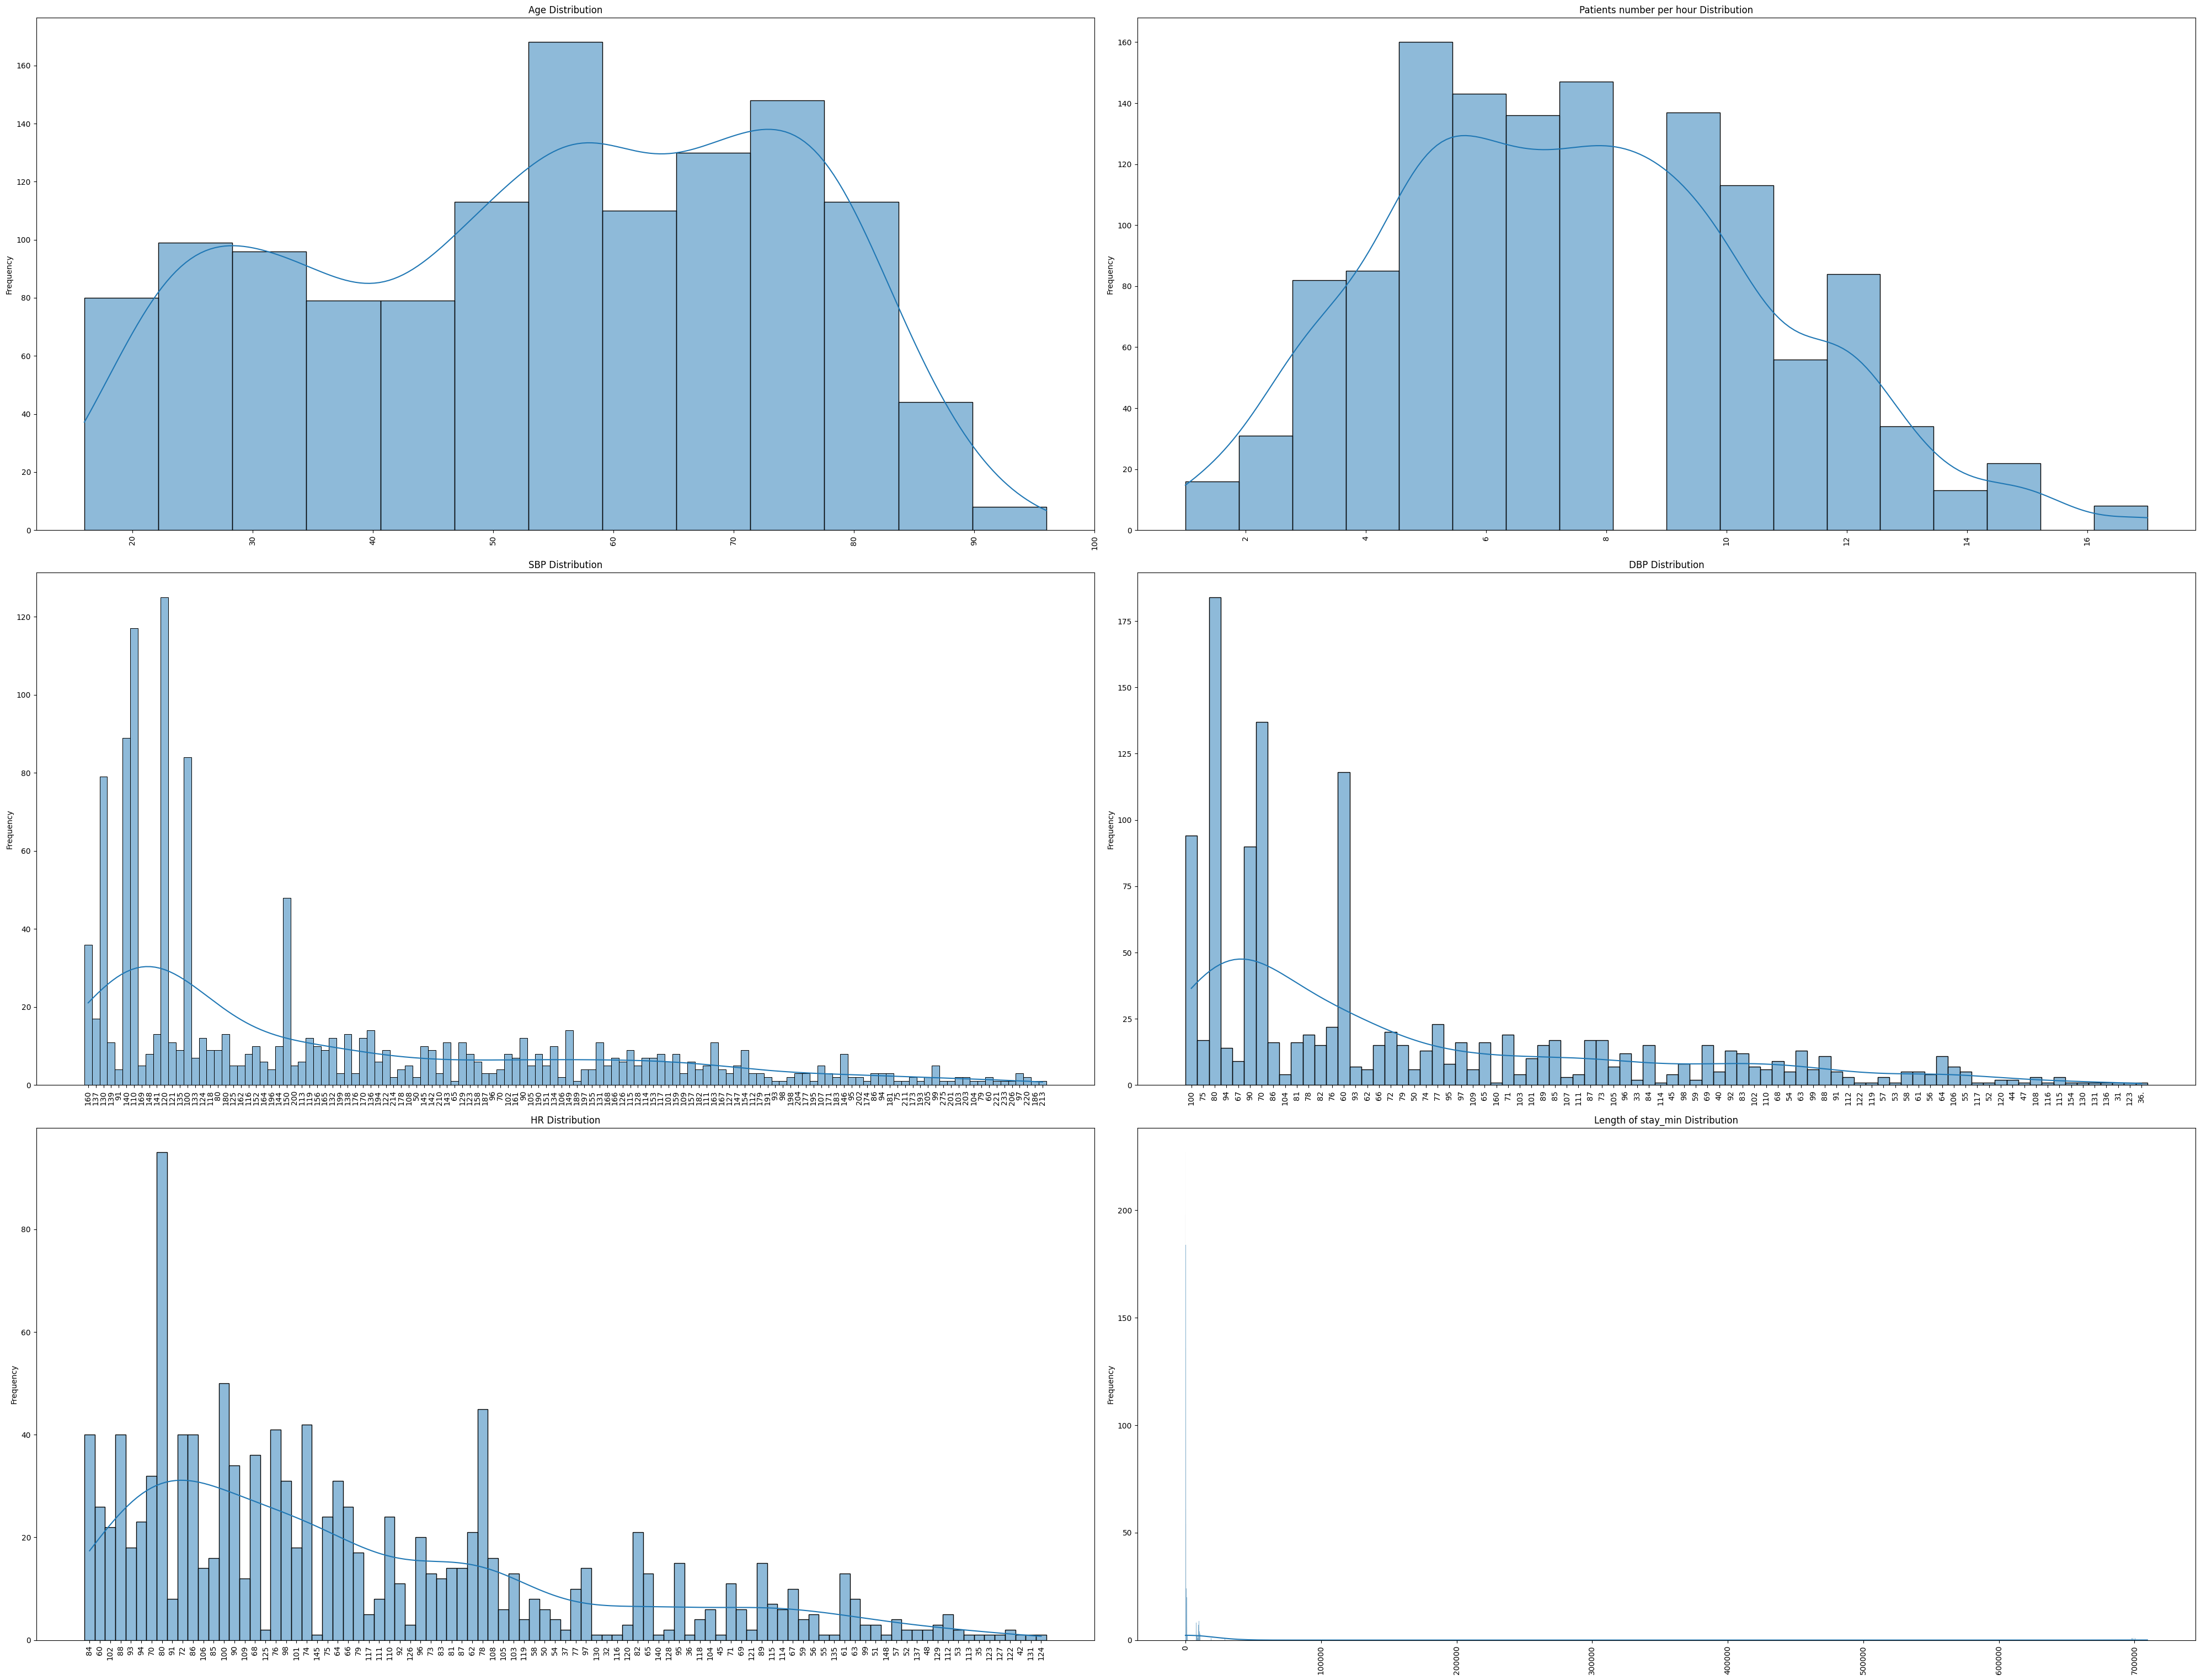

In [5]:
numeric_columns = ['Age', 'Patients number per hour', 'SBP', 'DBP', 'HR', 'Length of stay_min']

plt.figure(figsize=(40, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sb.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Replacing binary columns

In [99]:
data.rename(columns={'Sex': 'Female'}, inplace=True)
data["Female"] = data["Female"].replace(2,0)

data.rename(columns={'Injury': 'Injured'}, inplace=True)
data["Injured"] = data["Injured"].replace({1: 0, 2: 1})

### Replacing the numbers by their categorical value

In [100]:
group_map = ['Local ED 3th Degree', 'Regional ED 4tg Degree']
arrival_mode_map = ['Walking', 'Public Ambulance', 'Private Vehicle', 'Private Ambulance', 'Public Transport', 'Wheelchair', 'Other']
mental_map = ['Alert', 'Verbal Response', 'Pain Response', 'Unresponsive']
disposition_map = ['Discharge', 'Admission to Ward', 'Admission to ICU', 'Discharge', 'Transfer', 'Death', 'Surgery']
error_group_map = ['Vital Sign', 'Physical Exam', 'Psychatric', 'Pain', 'Mental', 'Underlying Disease', 'Medical Records of other ED', 'On set', 'Other']
mistriage_map = ['Correct','Over Triage', 'Under Triage']


data['Group'] = data['Group'].replace([1,2], group_map)
data['Arrival mode'] = data['Arrival mode'].replace([1,2,3,4,5,6,7], arrival_mode_map)
data['Mental'] = data['Mental'].replace([1,2,3,4], mental_map)
data['Disposition'] = data['Disposition'].replace([1,2,3,4,5,6,7], disposition_map)
data['Error_group'] = data['Error_group'].replace([1,2,3,4,5,6,7,8,9], error_group_map)
data['mistriage'] = data['mistriage'].replace([0,1,2], mistriage_map)

data.head()

Group  Female  Age  Patients number per hour  \
0  Regional ED 4tg Degree       0   71                         3   
1     Local ED 3th Degree       1   56                        12   
2  Regional ED 4tg Degree       1   68                         8   
3     Local ED 3th Degree       0   71                         8   
4     Local ED 3th Degree       0   58                         4   

       Arrival mode  Injured      Chief_complain Mental  Pain NRS_pain  SBP  \
0   Private Vehicle        1   right ocular pain  Alert     1        2  160   
1   Private Vehicle        1  right forearm burn  Alert     1        2  137   
2  Public Ambulance        1        arm pain, Lt  Alert     1        2  130   
3           Walking        0     ascites tapping  Alert     1        3  139   
4   Private Vehicle        0     distension, abd  Alert     1        3   91   

   DBP   HR  RR    BT Saturation  KTAS_RN  \
0  100   84  18  36.6        100        2   
1   75   60  20  36.5        NaN        4   
2   80  102  20  36.6         98        4   
3   94   88  20  36.5        NaN        4   
4   67   93  18  36.5        NaN        4   

                                Diagnosis in ED        Disposition  \
0                              Corneal abrasion          Discharge   
1             Burn of hand, firts degree dorsum          Discharge   
2  Fracture of surgical neck of humerus, closed  Admission to Ward   
3        Alcoholic liver cirrhosis with ascites          Discharge   
4                                       Ascites          Discharge   

   KTAS_expert         Error_group  Length of stay_min KTAS duration_min  \
0            4       Physical Exam                  86              5,00   
1            5                Pain                  64              3,95   
2            5                Pain                 862              1,00   
3            5  Underlying Disease                 108              9,83   
4            5              On set                 109              6,60   

     mistriage  
0  Over Triage  
1  Over Triage  
2  Over Triage  
3  Over Triage  
4  Over Triage

## Hypothesis

### H1: **Older Patients more likely to be urgent patients**

TRUE: The urgent levels of KTAS triage are 1,2,3 and we can see that the age range of these 3 levels is higher than the range of levels 4 and 5.

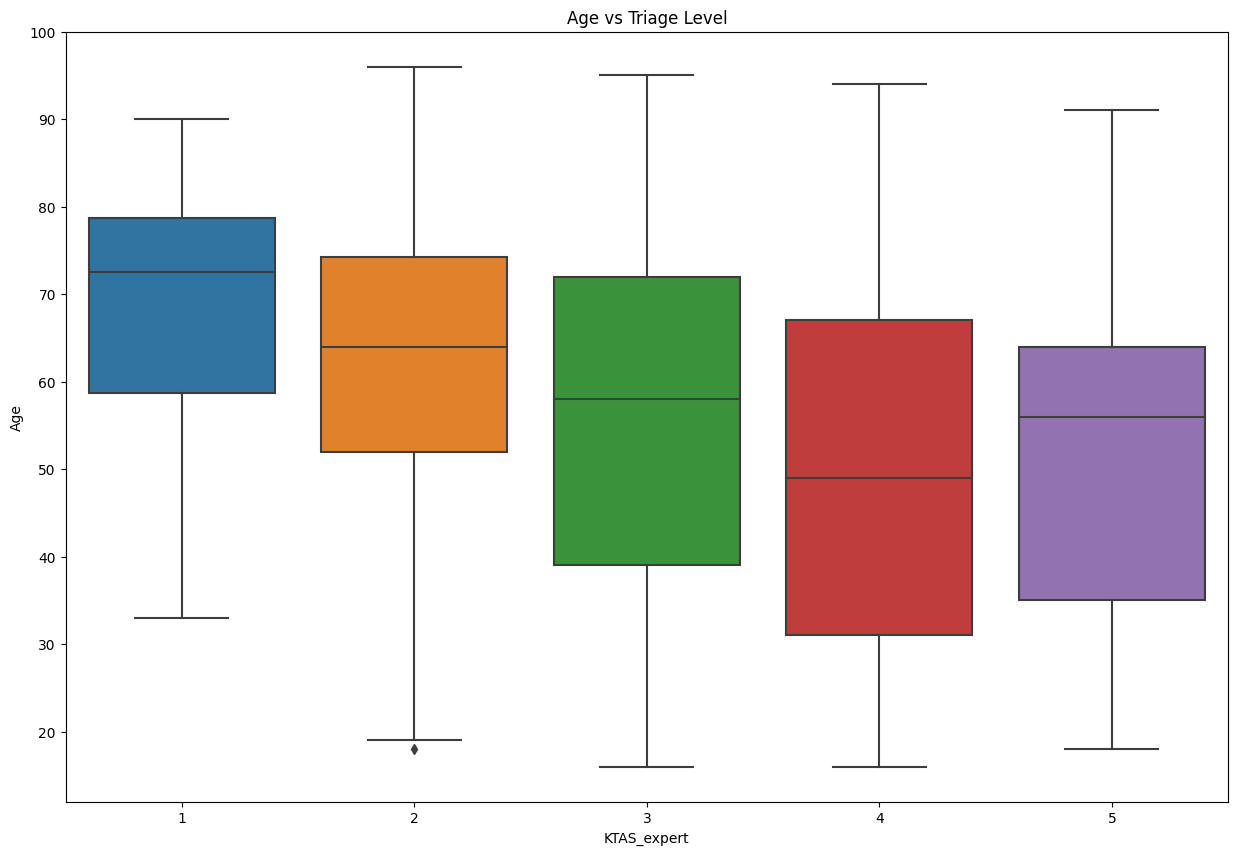

In [9]:
# Create plot that shows the relation betwwen age and triage level
plt.figure(figsize=(15, 10))
sb.boxplot(x='KTAS_expert', y='Age', data=data)
plt.title('Age vs Triage Level')
plt.show()

### H2: **Patients with higher levels of pain are more likely to be urgent patients**

TRUE: The patients with pain levels above 6 (half) are between levels 1 and 4 of the triage, which means that they are likely to be urgent patients (levels 1/2/3).

BUT: Anyway, we don't think it's a straight line. Because there are some patients with average levels of pain who are not urgent patients.

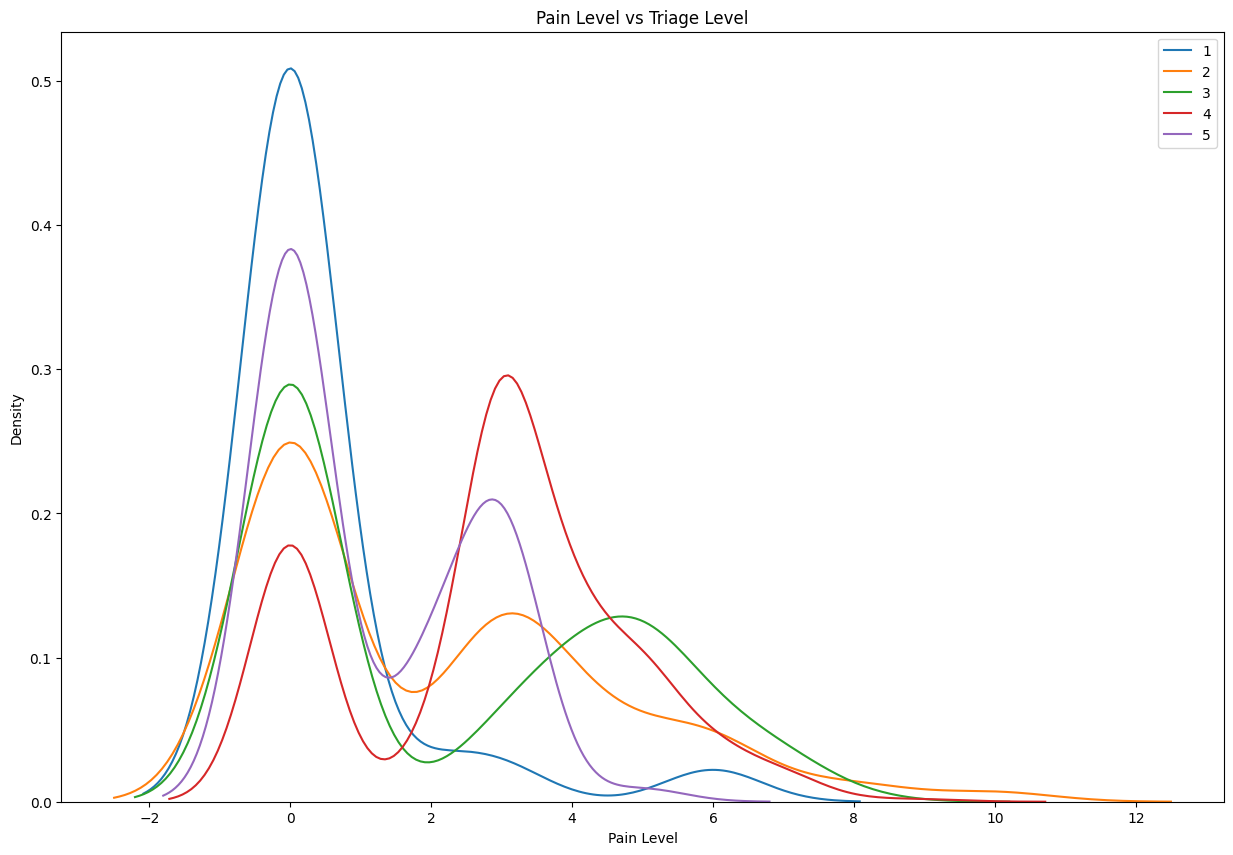

In [ ]:
#Create a plot that shows the relation between pain level and triage level
triage_levels = sorted(data['KTAS_expert'].unique())
data['NRS_pain'] = pd.to_numeric(data['NRS_pain'], errors='coerce')
plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['NRS_pain'], label=level)
plt.title('Pain Level vs Triage Level')
plt.xlabel('Pain Level')
plt.ylabel('Density')
plt.legend()
plt.show()

### H3: **Injured patients are more likely to be urgent patients**

FALSE: The majority of patients with an urgent triage level (1/2/3) are not injured.

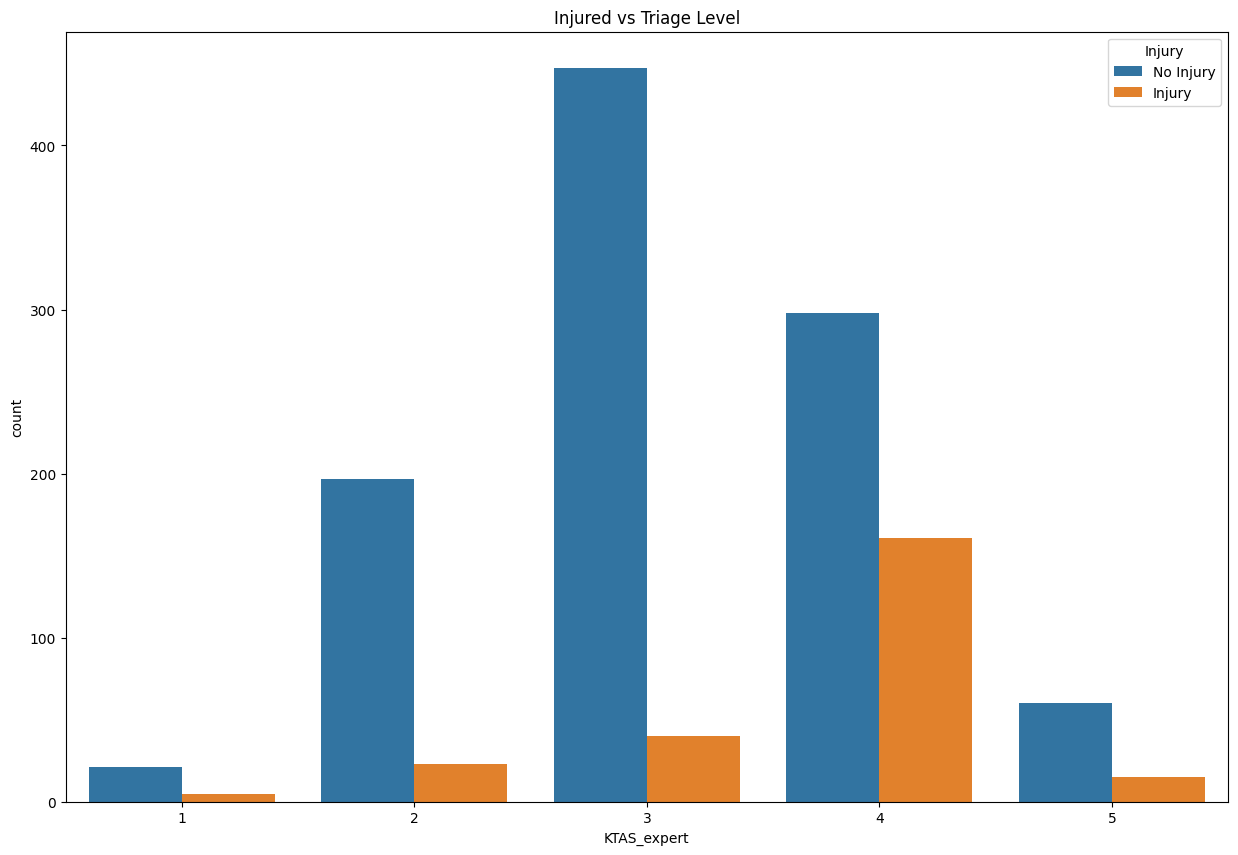

In [ ]:
# Create a plot that shows the relation between injury and triage level
# 1 = No injury, 2 = Injury
# Bar chart
plt.figure(figsize=(15, 10))
sb.countplot(x='KTAS_expert', hue='Injured', data=data)
plt.title('Injured vs Triage Level')
plt.legend(title='Injury', loc='upper right', labels=['No Injury', 'Injury'])
plt.show()


### H4: **Patients with poor mental status are more likely to be urgent patients.**

TRUE: Almost all patients with a mental status other than 'Alert' have triage levels 1, 2 and 3, which means they are urgent patients.

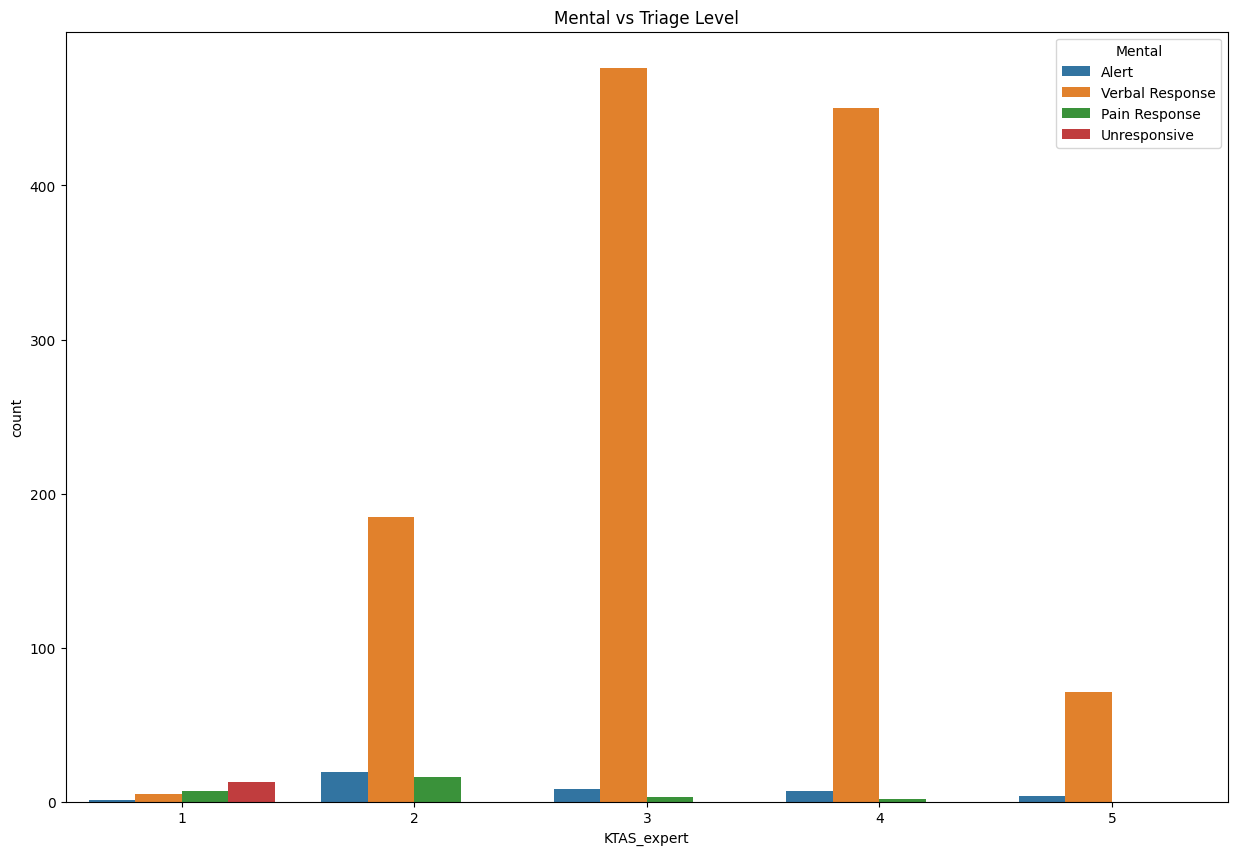

In [ ]:
#Create a plot that shows the relation between mental status and triage level
plt.figure(figsize=(15, 10))
sb.countplot(x='KTAS_expert', hue='Mental', data=data)
plt.title('Mental vs Triage Level')
plt.legend(title='Mental', loc='upper right', labels=['Alert', 'Verbal Response', 'Pain Response', 'Unresponsive'])
plt.show()

### H5: **Patients with higher and lower blood presure are more likely to be urgent patients**
TRUE: Patients with the highest and lowest SBP and DBP are triaged to levels that represent urgent patients

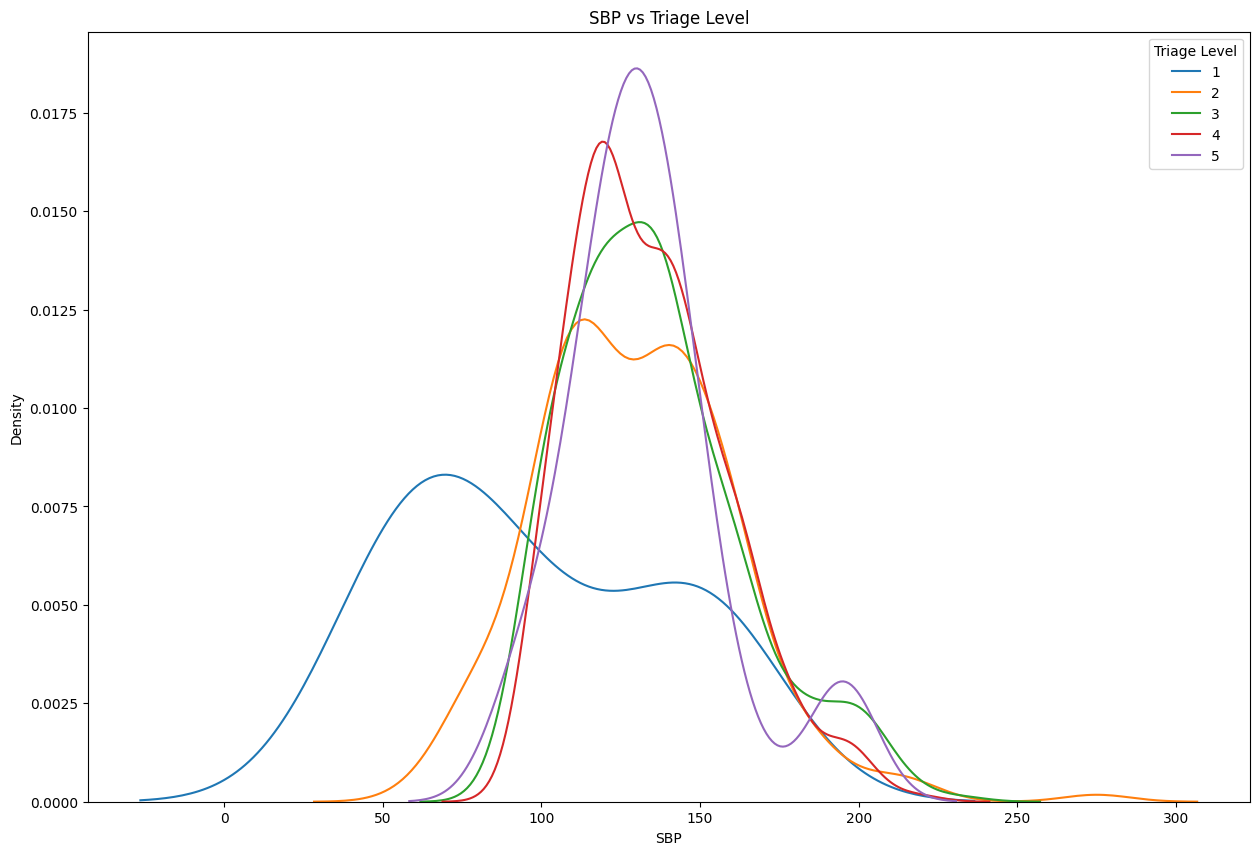

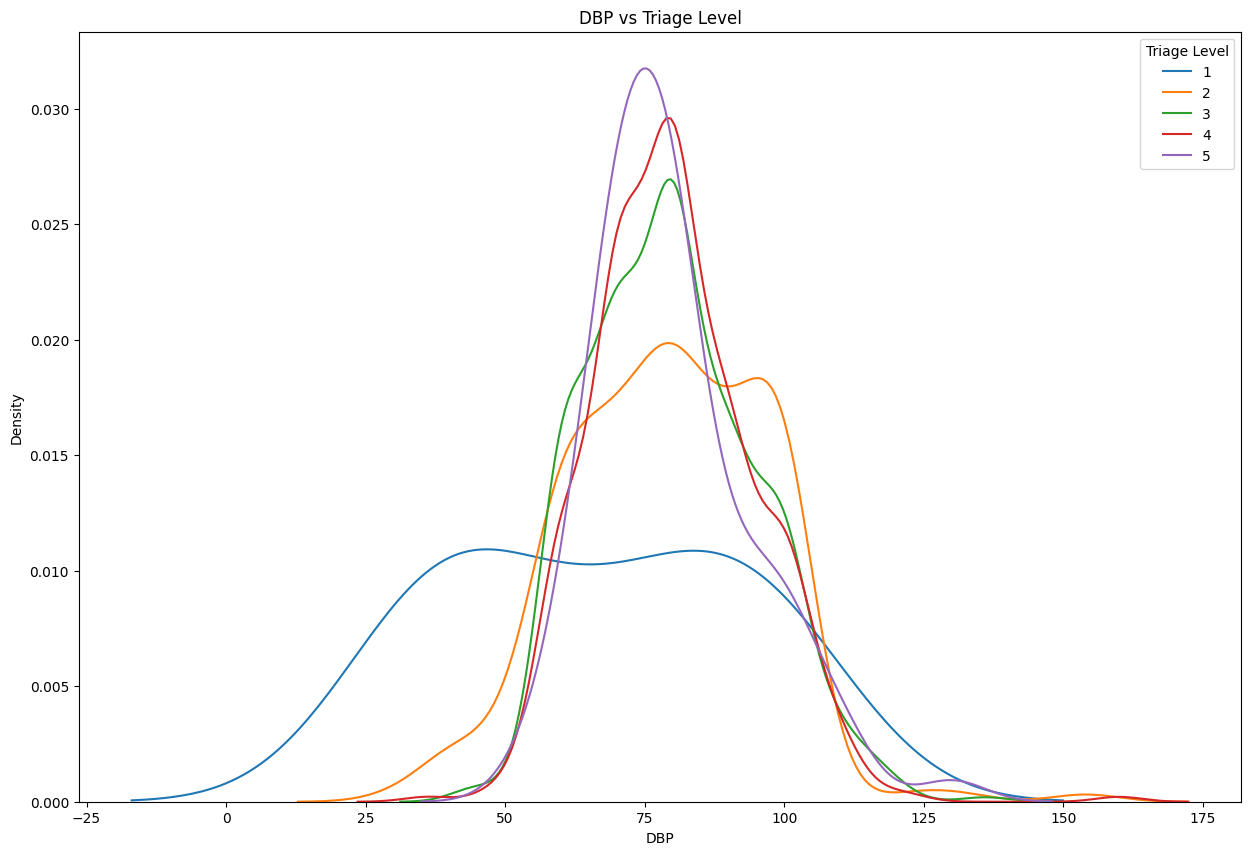

In [ ]:
#Create a plot that shows the relation between SBP and DBP and triage level
data['SBP'] = pd.to_numeric(data['SBP'], errors='coerce')
data['DBP'] = pd.to_numeric(data['DBP'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['SBP'], label=level)
plt.title('SBP vs Triage Level')
plt.xlabel('SBP')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['DBP'], label=level)
plt.title('DBP vs Triage Level')
plt.xlabel('DBP')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()


### H6: **Patients with higher and lower HR are more likely to be urgent patients**
TRUE: The density of patients with the highest and lowest HR are in levels 1/2/3 of the triage, which means they are urgent patients.

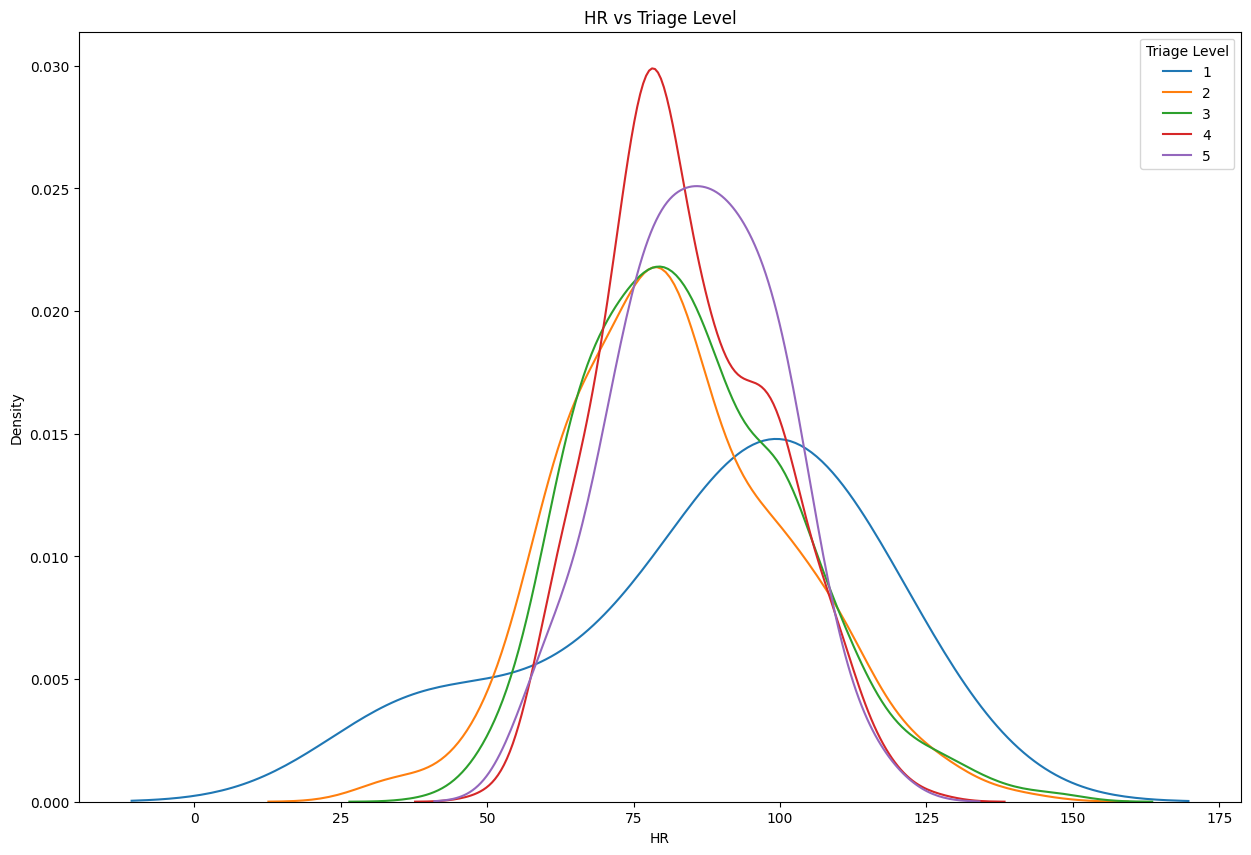

In [ ]:
#Create a plot that shows the relation between HR and triage level
data['HR'] = pd.to_numeric(data['HR'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['HR'], label=level)
plt.title('HR vs Triage Level')
plt.xlabel('HR')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

### H7: **Patients with higher and lower RR are more likely to be urgent patients**
TRUE FOR THE HIGHER LEVELS: The density of patients with the higher RRs are in levels 1/2/3 of the triage, which means they are urgent patients.

FALSE FOR THE LOWER LEVELS: The density of patients with the lower RRs is distributed for each level of triage.

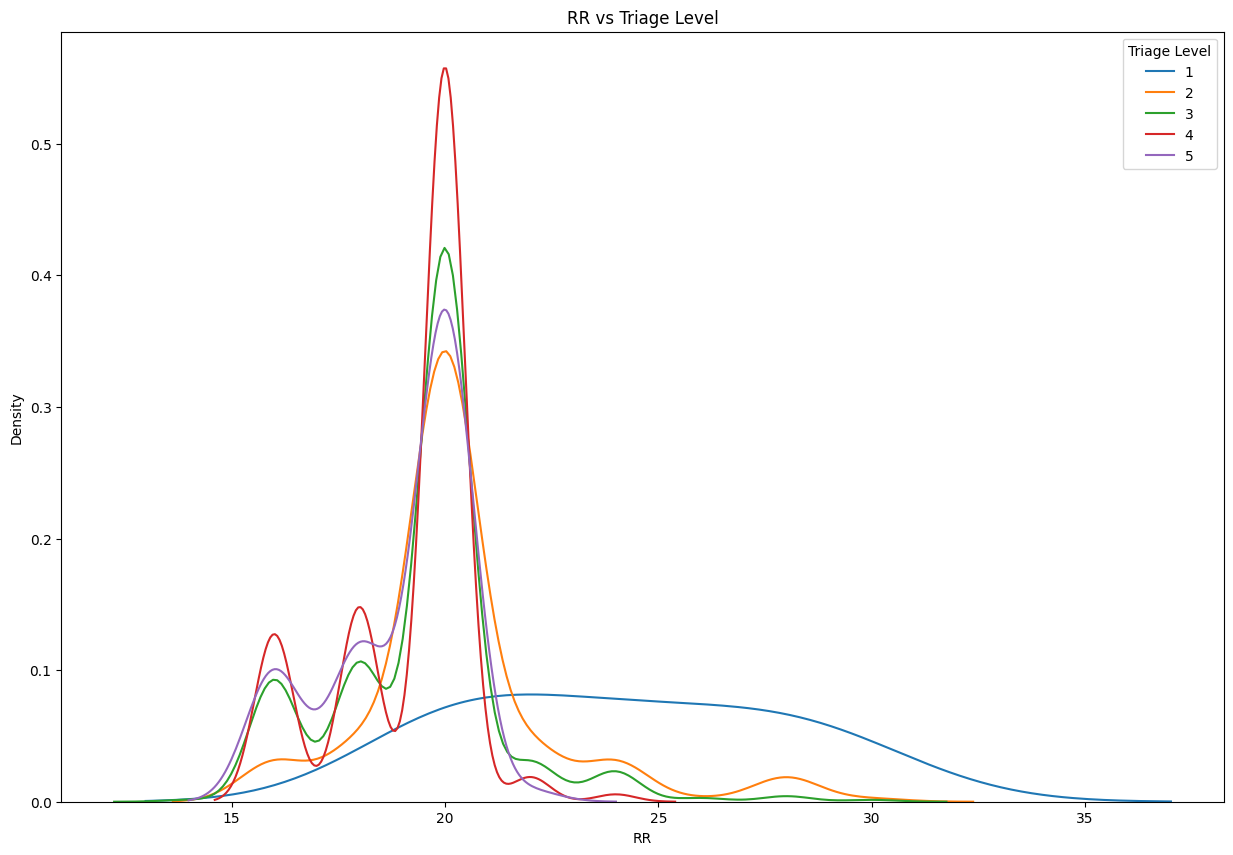

In [ ]:
data['RR'] = pd.to_numeric(data['RR'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['RR'], label=level)
plt.title('RR vs Triage Level')
plt.xlabel('RR')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()


### H8: **Patients with higher BT are more likely to be urgent patients**
TRUE FOR EXTREMELY HIGH BT: For extremely high BT (>39), the majority of patients are in level 2 triage, which means they are urgent patients.

FALSE FOR NOT TOO HIGH BT: For standard higher BT (>37 and <39), the density of patients is distributed in each level of triage.

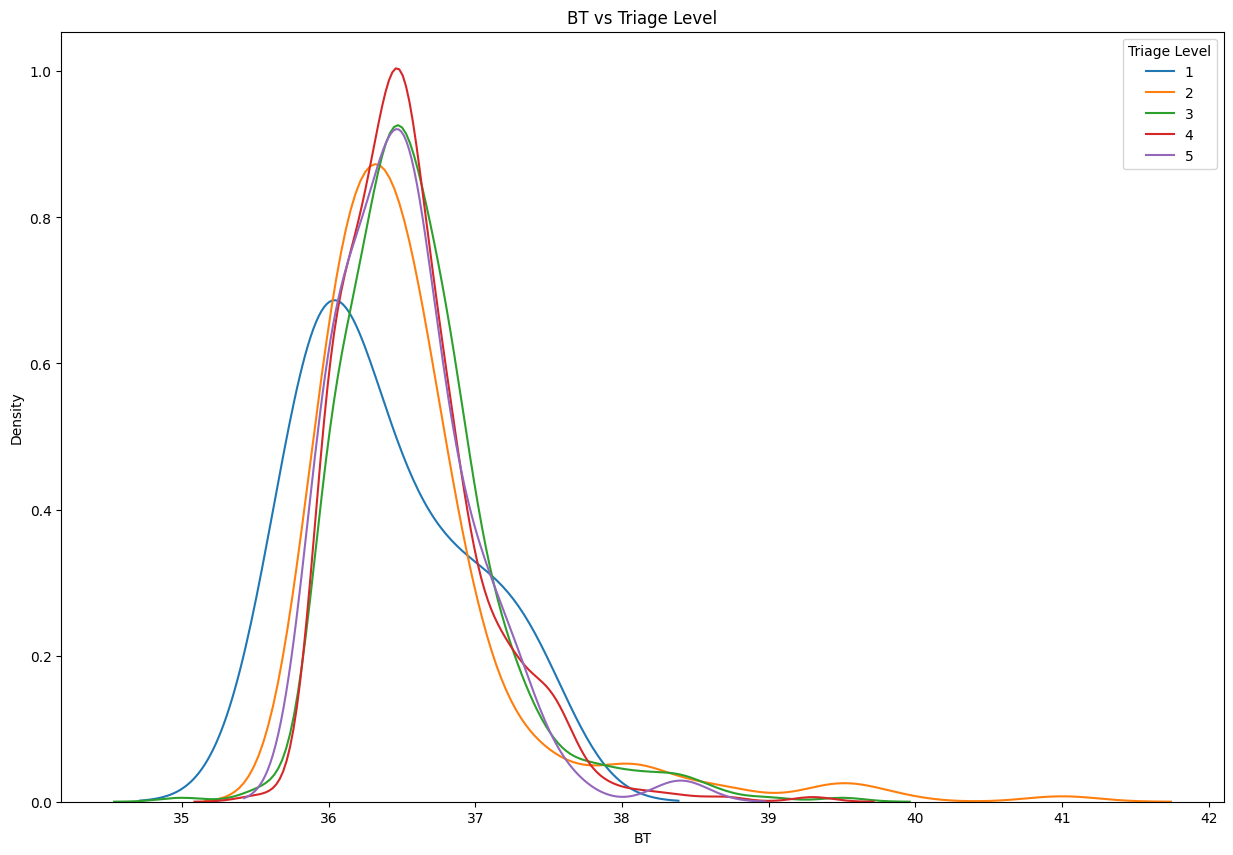

In [ ]:
data['BT'] = pd.to_numeric(data['BT'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['BT'], label=level)
plt.title('BT vs Triage Level')
plt.xlabel('BT')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

### H9: **Patients with lower Saturation values are more likely to be urgent patients**
TRUE: Patients with saturations below 90 +/- are in triage levels 1/2/3, which means they are urgent patients.

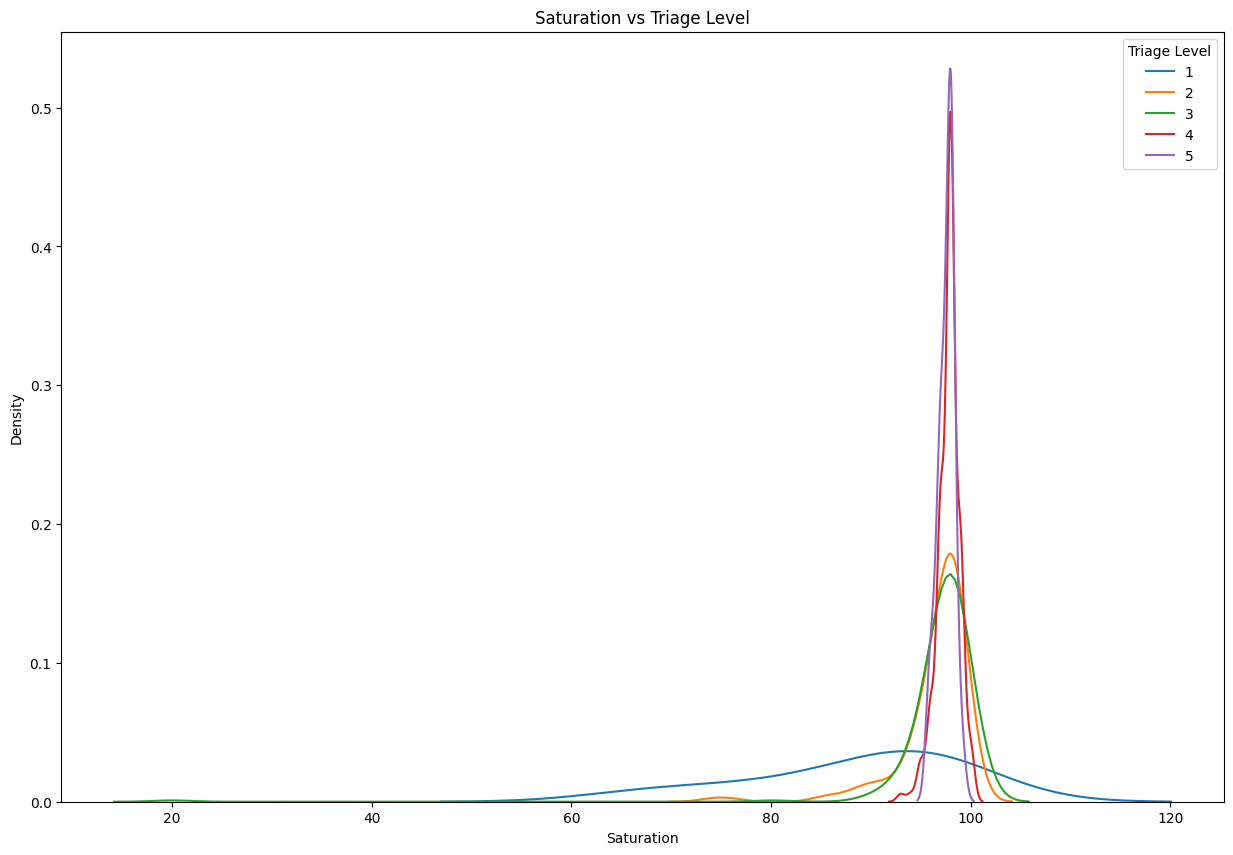

In [ ]:
data['Saturation'] = pd.to_numeric(data['Saturation'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['Saturation'], label=level)
plt.title('Saturation vs Triage Level')
plt.xlabel('Saturation')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

## Feature Imputation

### Checking all missing values



In [101]:
missing_values = [column for column in data.columns if data[column].isnull().sum() > 0]
for column in missing_values:
  print('Column ', column, ' has ', data[column].isnull().sum(), ' missing values')

Column  SBP  has  25  missing values
Column  DBP  has  29  missing values
Column  HR  has  20  missing values
Column  RR  has  22  missing values
Column  BT  has  18  missing values
Column  Saturation  has  697  missing values
Column  Diagnosis in ED  has  2  missing values


### Imputing integer values

In [102]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['SBP', 'DBP', 'HR', 'RR', 'Saturation']
imp = SimpleImputer(missing_values=np.NaN, strategy='median')
for column in columns_to_impute:
    data[column] = imp.fit_transform(data[[column]])

### Imputing real values

In [103]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
data['BT'] = imp.fit_transform(data[['BT']])

### Imputing categorical values

In [104]:
data['Diagnosis in ED'] = data['Diagnosis in ED'].fillna('No Diagnosis')

In [105]:
data['NRS_pain'].unique()

array(['2', '3', '4', '5', '6', '8', '9', 0, '1', '7', '10'], dtype=object)

In [108]:
#Convert to int type sbp and bdp
data['SBP'] = data['SBP'].astype(str).astype(float)
data['DBP'] = data['DBP'].astype(str).astype(float)

# Values
# Normal
#   SBP < 120 e DBP < 80
# Elevated (Pre-hypertension)
#   SBP 120-129 ou DBP < 80
# Hypertension 
#   SBP > 130 ou DBP > 80
# Hypertensive crises 
#   SBP > 180 ou DBP > 110

#Create new column for blood pressure category with 4 categories based on values above
data.loc[(data['SBP'] < 120) & (data['DBP'] < 80), 'Blood Pressure'] = 'Normal'
data.loc[(data['SBP'] >= 120) & (data['SBP'] <= 129) | (data['DBP'] < 80), 'Blood Pressure'] = 'Elevated'
data.loc[(data['SBP'] >= 130) | (data['DBP'] >= 80), 'Blood Pressure'] = 'Hypertension'
data.loc[(data['SBP'] >= 180) | (data['DBP'] >= 110), 'Blood Pressure'] = 'Hypertensive crises'


#Convert to int type nrs_pain
data['NRS_pain'] = data['NRS_pain'].astype(str).astype(float)
#Convert nrs pain in categories based on values 0-10 creating 3 columns
data.loc[(data['NRS_pain'] >= 0) & (data['NRS_pain'] <= 3), 'Pain Level'] = 'Low'
data.loc[(data['NRS_pain'] >= 4) & (data['NRS_pain'] <= 6), 'Pain Level'] = 'Moderate'
data.loc[(data['NRS_pain'] >= 7) & (data['NRS_pain'] <= 10), 'Pain Level'] = 'High'


In [109]:
data.head()

Group  Female  Age  Patients number per hour  \
0  Regional ED 4tg Degree       0   71                         3   
1     Local ED 3th Degree       1   56                        12   
2  Regional ED 4tg Degree       1   68                         8   
3     Local ED 3th Degree       0   71                         8   
4     Local ED 3th Degree       0   58                         4   

       Arrival mode  Injured      Chief_complain Mental  Pain  NRS_pain  \
0   Private Vehicle        1   right ocular pain  Alert     1       2.0   
1   Private Vehicle        1  right forearm burn  Alert     1       2.0   
2  Public Ambulance        1        arm pain, Lt  Alert     1       2.0   
3           Walking        0     ascites tapping  Alert     1       3.0   
4   Private Vehicle        0     distension, abd  Alert     1       3.0   

     SBP    DBP     HR    RR    BT  Saturation  KTAS_RN  \
0  160.0  100.0   84.0  18.0  36.6       100.0        2   
1  137.0   75.0   60.0  20.0  36.5        98.0        4   
2  130.0   80.0  102.0  20.0  36.6        98.0        4   
3  139.0   94.0   88.0  20.0  36.5        98.0        4   
4   91.0   67.0   93.0  18.0  36.5        98.0        4   

                                Diagnosis in ED        Disposition  \
0                              Corneal abrasion          Discharge   
1             Burn of hand, firts degree dorsum          Discharge   
2  Fracture of surgical neck of humerus, closed  Admission to Ward   
3        Alcoholic liver cirrhosis with ascites          Discharge   
4                                       Ascites          Discharge   

   KTAS_expert         Error_group  Length of stay_min KTAS duration_min  \
0            4       Physical Exam                  86              5,00   
1            5                Pain                  64              3,95   
2            5                Pain                 862              1,00   
3            5  Underlying Disease                 108              9,83   
4            5              On set                 109              6,60   

     mistriage Blood Pressure Pain Level  
0  Over Triage   Hypertension        Low  
1  Over Triage   Hypertension        Low  
2  Over Triage   Hypertension        Low  
3  Over Triage   Hypertension        Low  
4  Over Triage       Elevated        Low

## Feature Encondig

In [110]:
data = pd.get_dummies(data, columns=['Group','Mental','Arrival mode','Disposition','Error_group','mistriage','Blood Pressure'],dtype='int64')
data.head()

Female  Age  Patients number per hour  Injured      Chief_complain  Pain  \
0       0   71                         3        1   right ocular pain     1   
1       1   56                        12        1  right forearm burn     1   
2       1   68                         8        1        arm pain, Lt     1   
3       0   71                         8        0     ascites tapping     1   
4       0   58                         4        0     distension, abd     1   

   NRS_pain    SBP    DBP     HR    RR    BT  Saturation  KTAS_RN  \
0       2.0  160.0  100.0   84.0  18.0  36.6       100.0        2   
1       2.0  137.0   75.0   60.0  20.0  36.5        98.0        4   
2       2.0  130.0   80.0  102.0  20.0  36.6        98.0        4   
3       3.0  139.0   94.0   88.0  20.0  36.5        98.0        4   
4       3.0   91.0   67.0   93.0  18.0  36.5        98.0        4   

                                Diagnosis in ED  KTAS_expert  \
0                              Corneal abrasion            4   
1             Burn of hand, firts degree dorsum            5   
2  Fracture of surgical neck of humerus, closed            5   
3        Alcoholic liver cirrhosis with ascites            5   
4                                       Ascites            5   

   Length of stay_min KTAS duration_min Pain Level  Group_Local ED 3th Degree  \
0                  86              5,00        Low                          0   
1                  64              3,95        Low                          1   
2                 862              1,00        Low                          0   
3                 108              9,83        Low                          1   
4                 109              6,60        Low                          1   

   Group_Regional ED 4tg Degree  Mental_Alert  Mental_Pain Response  \
0                             1             1                     0   
1                             0             1                     0   
2                             1             1                     0   
3                             0             1                     0   
4                             0             1                     0   

   Mental_Unresponsive  Mental_Verbal Response  Arrival mode_Other  \
0                    0                       0                   0   
1                    0                       0                   0   
2                    0                       0                   0   
3                    0                       0                   0   
4                    0                       0                   0   

   Arrival mode_Private Ambulance  Arrival mode_Private Vehicle  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   Arrival mode_Public Ambulance  Arrival mode_Public Transport  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   Arrival mode_Walking  Arrival mode_Wheelchair  \
0                     0                        0   
1                     0                        0   
2                     0                        0   
3                     1                        0   
4                     0                        0   

   Disposition_Admission to ICU  Disposition_Admission to Ward  \
0                             0                              0   
1                             0                              0   
2                             0                              1   
3         

In [111]:
# For each of this string in Chief_complain
# 1. Create a new column with the same name
# 2. If the patient has this chief complain, set the value to 1, otherwise 0
map_columns = {
    'abd pain': 'Abdominal Pain',
    'dyspnea': 'Dyspnea',
    'dizziness': 'Dizziness',
    'fever': 'Fever',
    'ant. chest pain': 'Anterior Chest Pain',
    'Open Wound': 'Open Wound',
    'headache': 'Headache',
    'epigastric pain': 'Epigastric Pain',
    'mental change': 'Mental Change',
    'general weakness': 'General Weakness',
    'vomiting': 'Vomiting',
    'pain, chest': 'Chest Pain'
}

for key, value in map_columns.items():
    #Create new column with the same name
    data[value] = 0
    #Set value to 1 if the patient has this chief complain
    data.loc[data['Chief_complain'].str.contains(key, case=False), value] = 1



In [112]:
#For each string in Pain level 
# 1. Create a new column with the same name
# 2. If the patient has this pain level, set the value to 1, otherwise 0
map_columns = {
    'low': 'Low Pain',
    'moderate': 'Moderate Pain',
    'high': 'High Pain'
}

for key, value in map_columns.items():
    #Create new column with the same name
    data[value] = 0
    #Set value to 1 if the patient has this pain level
    data.loc[data['Pain Level'].str.contains(key, case=False), value] = 1

In [113]:
data.head()

Female  Age  Patients number per hour  Injured      Chief_complain  Pain  \
0       0   71                         3        1   right ocular pain     1   
1       1   56                        12        1  right forearm burn     1   
2       1   68                         8        1        arm pain, Lt     1   
3       0   71                         8        0     ascites tapping     1   
4       0   58                         4        0     distension, abd     1   

   NRS_pain    SBP    DBP     HR    RR    BT  Saturation  KTAS_RN  \
0       2.0  160.0  100.0   84.0  18.0  36.6       100.0        2   
1       2.0  137.0   75.0   60.0  20.0  36.5        98.0        4   
2       2.0  130.0   80.0  102.0  20.0  36.6        98.0        4   
3       3.0  139.0   94.0   88.0  20.0  36.5        98.0        4   
4       3.0   91.0   67.0   93.0  18.0  36.5        98.0        4   

                                Diagnosis in ED  KTAS_expert  \
0                              Corneal abrasion            4   
1             Burn of hand, firts degree dorsum            5   
2  Fracture of surgical neck of humerus, closed            5   
3        Alcoholic liver cirrhosis with ascites            5   
4                                       Ascites            5   

   Length of stay_min KTAS duration_min Pain Level  Group_Local ED 3th Degree  \
0                  86              5,00        Low                          0   
1                  64              3,95        Low                          1   
2                 862              1,00        Low                          0   
3                 108              9,83        Low                          1   
4                 109              6,60        Low                          1   

   Group_Regional ED 4tg Degree  Mental_Alert  Mental_Pain Response  \
0                             1             1                     0   
1                             0             1                     0   
2                             1             1                     0   
3                             0             1                     0   
4                             0             1                     0   

   Mental_Unresponsive  Mental_Verbal Response  Arrival mode_Other  \
0                    0                       0                   0   
1                    0                       0                   0   
2                    0                       0                   0   
3                    0                       0                   0   
4                    0                       0                   0   

   Arrival mode_Private Ambulance  Arrival mode_Private Vehicle  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   Arrival mode_Public Ambulance  Arrival mode_Public Transport  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   Arrival mode_Walking  Arrival mode_Wheelchair  \
0                     0                        0   
1                     0                        0   
2                     0                        0   
3                     1                        0   
4                     0                        0   

   Disposition_Admission to ICU  Disposition_Admission to Ward  \
0                             0                              0   
1                             0                              0   
2                             0                              1   
3         

## Feature Selection

In the process of refining our dataset, we aim to streamline and concentrate on elements directly associated with patient self-reporting. Given the nature of the dataset, which encompasses various hospital-related variables, we have decided to prune certain columns to prioritize aspects that individuals can personally provide. 
The following were removed:
- Patients number per hour
- Chief's Complain
- KTAS_RN
- Diagnosis in ED
- Length of stay
- KTAS duration minimum
- Group
- Disposition
- Error Group
- Mistriage

In [114]:
columns_to_drop = ['Patients number per hour', 'KTAS_RN', 'Diagnosis in ED', 'Length of stay_min', 'KTAS duration_min', 'SBP', 'DBP', 'Chief_complain', 'NRS_pain', 'Pain Level']

columns_to_drop += list(data.filter(regex='Group_'))
columns_to_drop += list(data.filter(regex='Disposition_'))
columns_to_drop += list(data.filter(regex='Error_group_'))
columns_to_drop += list(data.filter(regex='mistriage_'))

data.drop(columns=columns_to_drop, inplace=True)


data.head()

Female  Age  Injured  Pain     HR    RR    BT  Saturation  KTAS_expert  \
0       0   71        1     1   84.0  18.0  36.6       100.0            4   
1       1   56        1     1   60.0  20.0  36.5        98.0            5   
2       1   68        1     1  102.0  20.0  36.6        98.0            5   
3       0   71        0     1   88.0  20.0  36.5        98.0            5   
4       0   58        0     1   93.0  18.0  36.5        98.0            5   

  Pain Level  Mental_Alert  Mental_Pain Response  Mental_Unresponsive  \
0        Low             1                     0                    0   
1        Low             1                     0                    0   
2        Low             1                     0                    0   
3        Low             1                     0                    0   
4        Low             1                     0                    0   

   Mental_Verbal Response  Arrival mode_Other  Arrival mode_Private Ambulance  \
0                       0                   0                               0   
1                       0                   0                               0   
2                       0                   0                               0   
3                       0                   0                               0   
4                       0                   0                               0   

   Arrival mode_Private Vehicle  Arrival mode_Public Ambulance  \
0                             1                              0   
1                             1                              0   
2                             0                              1   
3                             0                              0   
4                             1                              0   

   Arrival mode_Public Transport  Arrival mode_Walking  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     1   
4                              0                     0   

   Arrival mode_Wheelchair  Blood Pressure_Elevated  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        1   

   Blood Pressure_Hypertension  Blood Pressure_Hypertensive crises  \
0                            1                                   0   
1                            1                                   0   
2                            1                                   0   
3                            1                                   0   
4                            0                                   0   

   Abdominal Pain  Dyspnea  Dizziness  Fever  Anterior Chest Pain  Open Wound  \
0               0        0          0      0                    0           0   
1               0        0          0      0                    0           0   
2               0        0          0      0                    0           0   
3               0        0          0      0                    0           0   
4               0        0          0      0                    0           0   

   Headache  Epigastric Pain  Mental Change  General Weakness  Vomiting  \
0         0                0              0                 0         0   
1         0                0              0                 0         0   
2         0                0              0                 0         0   
3         0                0              0                 0         0   
4         0                0              0                 0         0   

   Chest Pain  Low Pain  Moderate Pain  High Pain  
0           0         1              0          0  
1           0         1              0          0  
2           0         

### Correlation Matrix

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
# Extract correlations with the target variable
target_correlations = correlation_matrix['KTAS_expert'].sort_values(ascending=False)

# Print top correlated features
print("Top correlated features with KTAS_expert:")
print(target_correlations)


Top correlated features with KTAS_expert:
KTAS_expert                           1.000000
Arrival mode_Private Vehicle          0.299012
Mental_Alert                          0.297879
Injured                               0.210452
Pain                                  0.183484
Saturation                            0.141410
Open Wound                            0.096667
NRS_pain                              0.084927
Arrival mode_Walking                  0.051564
HR                                    0.036226
Headache                              0.027328
Arrival mode_Wheelchair               0.023573
Vomiting                              0.019200
Epigastric Pain                       0.011224
Blood Pressure_Hypertension           0.004929
Abdominal Pain                        0.002948
Blood Pressure_Hypertensive crises   -0.000008
Blood Pressure_Elevated              -0.005137
Female                               -0.005684
Arrival mode_Other                   -0.011944
Fever             

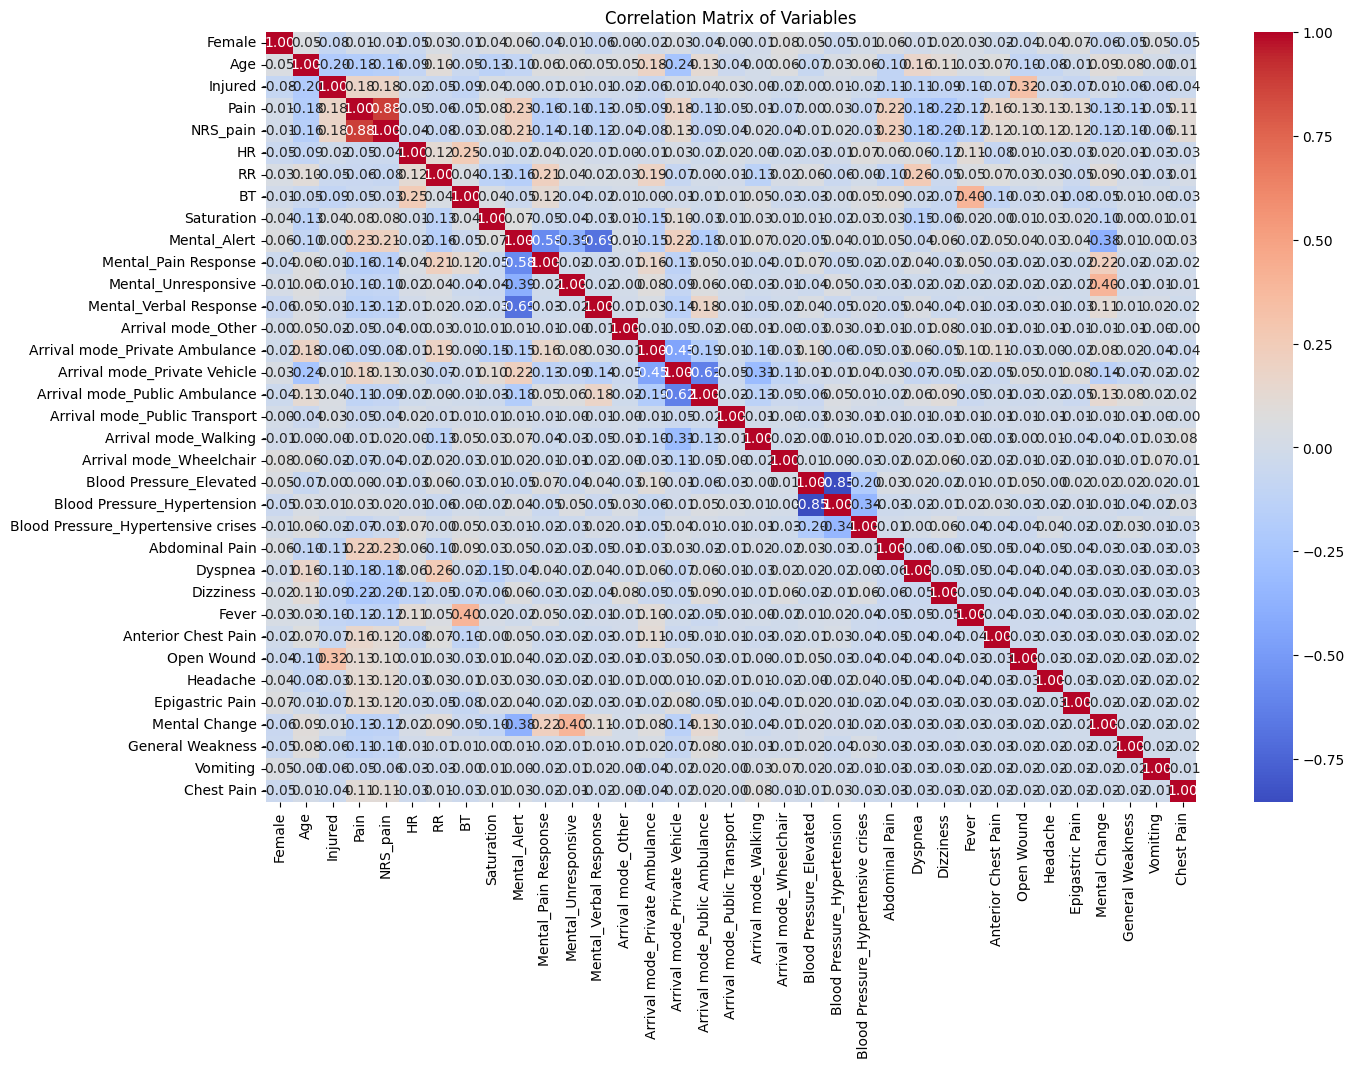

In [ ]:
corr_data = data.drop(['KTAS_expert'], axis=1)

# Create correlation matrix
corr = corr_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

In [115]:
y = data['KTAS_expert'].astype('int')

In [116]:
y.unique()

array([4, 5, 3, 2, 1])

In [117]:
# map the target variable to be 0 1 2 3 4 instead of 1 2 3 4 5
y = y - 1

## Standardization and Normalization

Normalization scales the values of different features to a similar range

array([[<Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Injured'}>,
        <Axes: title={'center': 'Pain'}>,
        <Axes: title={'center': 'NRS_pain'}>,
        <Axes: title={'center': 'HR'}>],
       [<Axes: title={'center': 'RR'}>, <Axes: title={'center': 'BT'}>,
        <Axes: title={'center': 'Saturation'}>,
        <Axes: title={'center': 'KTAS_expert'}>,
        <Axes: title={'center': 'Mental_Alert'}>,
        <Axes: title={'center': 'Mental_Pain Response'}>],
       [<Axes: title={'center': 'Mental_Unresponsive'}>,
        <Axes: title={'center': 'Mental_Verbal Response'}>,
        <Axes: title={'center': 'Arrival mode_Other'}>,
        <Axes: title={'center': 'Arrival mode_Private Ambulance'}>,
        <Axes: title={'center': 'Arrival mode_Private Vehicle'}>,
        <Axes: title={'center': 'Arrival mode_Public Ambulance'}>],
       [<Axes: title={'center': 'Arrival mode_Public Transport'}>,
        <Axes: title=

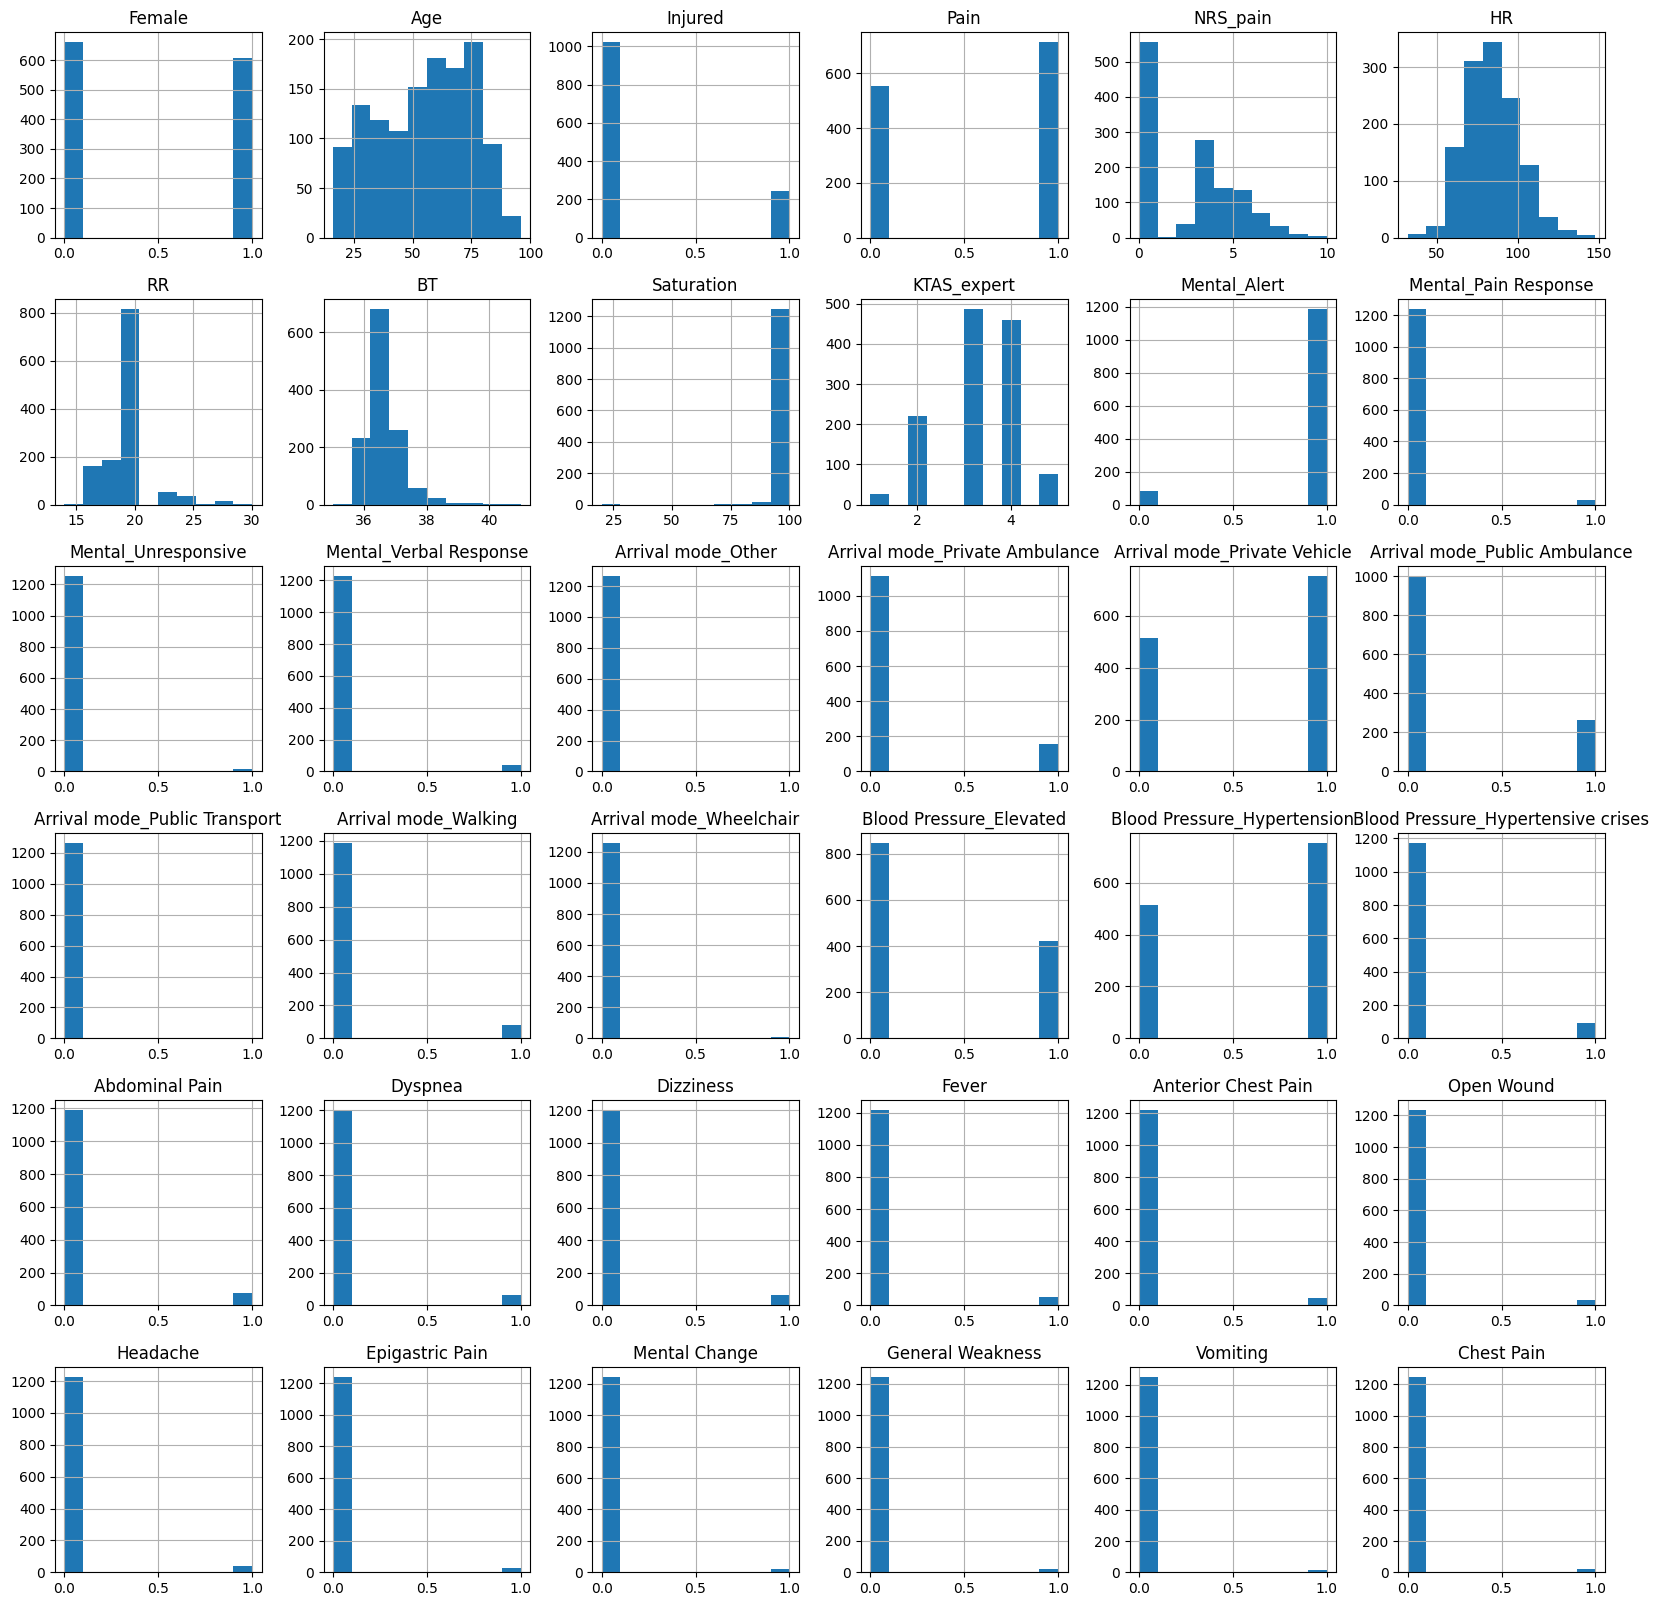

In [ ]:
data.hist(figsize=(20,20))

Columns to Normalize:
- Age
- NRS_Pain
- SBP
- DBP
- HR
- RR
- BT
- Saturation


In [118]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler

# Data to normalize
normalize = ['Age', 'HR', 'RR', 'BT', 'Saturation']

datapd = pd.DataFrame(data, columns=normalize)

normalizer = MinMaxScaler()
data[normalize] = normalizer.fit_transform(datapd)

data.head()

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Female     Age  Injured  Pain        HR     RR        BT  Saturation  \
0       0  0.6875        1     1  0.448276  0.250  0.266667       1.000   
1       1  0.5000        1     1  0.241379  0.375  0.250000       0.975   
2       1  0.6500        1     1  0.603448  0.375  0.266667       0.975   
3       0  0.6875        0     1  0.482759  0.375  0.250000       0.975   
4       0  0.5250        0     1  0.525862  0.250  0.250000       0.975   

   KTAS_expert Pain Level  Mental_Alert  Mental_Pain Response  \
0            4        Low             1                     0   
1            5        Low             1                     0   
2            5        Low             1                     0   
3            5        Low             1                     0   
4            5        Low             1                     0   

   Mental_Unresponsive  Mental_Verbal Response  Arrival mode_Other  \
0                    0                       0                   0   
1                    0                       0                   0   
2                    0                       0                   0   
3                    0                       0                   0   
4                    0                       0                   0   

   Arrival mode_Private Ambulance  Arrival mode_Private Vehicle  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   Arrival mode_Public Ambulance  Arrival mode_Public Transport  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   Arrival mode_Walking  Arrival mode_Wheelchair  Blood Pressure_Elevated  \
0                     0                        0                        0   
1                     0                        0                        0   
2                     0                        0                        0   
3                     1                        0                        0   
4                     0                        0                        1   

   Blood Pressure_Hypertension  Blood Pressure_Hypertensive crises  \
0                            1                                   0   
1                            1                                   0   
2                            1                                   0   
3                            1                                   0   
4                            0                                   0   

   Abdominal Pain  Dyspnea  Dizziness  Fever  Anterior Chest Pain  Open Wound  \
0               0        0          0      0                    0           0   
1               0        0          0      0                    0           0   
2               0        0          0      0                    0           0   
3               0        0          0      0                    0           0   
4               0        0          0      0                    0           0   

   Headache  Epigastric Pain  Mental Change  General Weakness  Vomiting  \
0         0                0              0                 0         0   
1         0                0              0                 0         0   
2         0                0              0                 0         0   
3         0                0              0                 0         0   
4         0                0              0                 0         0   

   Chest Pain  Low Pain  Moderate Pain  High Pain  NRS_pain  
0           0         1              0          0 

Standardization (z-score normalization) transforms the features to have a mean of 0 and a standard deviation of 1.

In [ ]:
#Print standard deviation and mean of the data as table
print("Standard deviation and mean of the data:")
print(data.describe().T[['mean', 'std']])


Standard deviation and mean of the data:
                                        mean       std
Female                              0.478295  0.499726
Age                                 0.480298  0.246563
Injured                             0.192581  0.394482
Pain                                0.563536  0.496143
NRS_pain                            0.230308  0.229802
HR                                  0.447691  0.142361
RR                                  0.344712  0.125006
BT                                  0.263437  0.090302
Saturation                          0.969515  0.036960
KTAS_expert                         3.265983  0.885803
Mental_Alert                        0.936859  0.243313
Mental_Pain Response                0.022099  0.147065
Mental_Unresponsive                 0.010260  0.100813
Mental_Verbal Response              0.030781  0.172793
Arrival mode_Other                  0.001579  0.039715
Arrival mode_Private Ambulance      0.122336  0.327803
Arrival mode_Private Veh

In [120]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

#Standardize the data
scaler = StandardScaler()
data[normalize] = pd.DataFrame(scaler.fit_transform(datapd), columns=normalize)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [123]:
data.head()

Female       Age  Injured  Pain        HR        RR        BT  Saturation  \
0       0  0.840694        1     1  0.004112 -0.757961  0.035774    0.825155   
1       1  0.079938        1     1 -1.449782  0.242390 -0.148863    0.148474   
2       1  0.688543        1     1  1.094532  0.242390  0.035774    0.148474   
3       0  0.840694        0     1  0.246427  0.242390 -0.148863    0.148474   
4       0  0.181372        0     1  0.549322 -0.757961 -0.148863    0.148474   

   KTAS_expert Pain Level  Mental_Alert  Mental_Pain Response  \
0            4        Low             1                     0   
1            5        Low             1                     0   
2            5        Low             1                     0   
3            5        Low             1                     0   
4            5        Low             1                     0   

   Mental_Unresponsive  Mental_Verbal Response  Arrival mode_Other  \
0                    0                       0                   0   
1                    0                       0                   0   
2                    0                       0                   0   
3                    0                       0                   0   
4                    0                       0                   0   

   Arrival mode_Private Ambulance  Arrival mode_Private Vehicle  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   Arrival mode_Public Ambulance  Arrival mode_Public Transport  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   Arrival mode_Walking  Arrival mode_Wheelchair  Blood Pressure_Elevated  \
0                     0                        0                        0   
1                     0                        0                        0   
2                     0                        0                        0   
3                     1                        0                        0   
4                     0                        0                        1   

   Blood Pressure_Hypertension  Blood Pressure_Hypertensive crises  \
0                            1                                   0   
1                            1                                   0   
2                            1                                   0   
3                            1                                   0   
4                            0                                   0   

   Abdominal Pain  Dyspnea  Dizziness  Fever  Anterior Chest Pain  Open Wound  \
0               0        0          0      0                    0           0   
1               0        0          0      0                    0           0   
2               0        0          0      0                    0           0   
3               0        0          0      0                    0           0   
4               0        0          0      0                    0           0   

   Headache  Epigastric Pain  Mental Change  General Weakness  Vomiting  \
0         0                0              0                 0         0   
1         0                0              0                 0         0   
2         0                0              0                 0         0   
3         0                0              0                 0         0   
4         0                0              0                 0         0   

   Chest Pain  Low Pain  Moderate Pain  High Pain  
0           0         1       

# Data Spliting

In [137]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = data.drop(columns=['KTAS_expert'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [138]:
X.head()

Female       Age  Injured  Pain        HR        RR        BT  Saturation  \
0       0  0.840694        1     1  0.004112 -0.757961  0.035774    0.825155   
1       1  0.079938        1     1 -1.449782  0.242390 -0.148863    0.148474   
2       1  0.688543        1     1  1.094532  0.242390  0.035774    0.148474   
3       0  0.840694        0     1  0.246427  0.242390 -0.148863    0.148474   
4       0  0.181372        0     1  0.549322 -0.757961 -0.148863    0.148474   

   Mental_Alert  Mental_Pain Response  Mental_Unresponsive  \
0             1                     0                    0   
1             1                     0                    0   
2             1                     0                    0   
3             1                     0                    0   
4             1                     0                    0   

   Mental_Verbal Response  Arrival mode_Other  Arrival mode_Private Ambulance  \
0                       0                   0                               0   
1                       0                   0                               0   
2                       0                   0                               0   
3                       0                   0                               0   
4                       0                   0                               0   

   Arrival mode_Private Vehicle  Arrival mode_Public Ambulance  \
0                             1                              0   
1                             1                              0   
2                             0                              1   
3                             0                              0   
4                             1                              0   

   Arrival mode_Public Transport  Arrival mode_Walking  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     1   
4                              0                     0   

   Arrival mode_Wheelchair  Blood Pressure_Elevated  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        1   

   Blood Pressure_Hypertension  Blood Pressure_Hypertensive crises  \
0                            1                                   0   
1                            1                                   0   
2                            1                                   0   
3                            1                                   0   
4                            0                                   0   

   Abdominal Pain  Dyspnea  Dizziness  Fever  Anterior Chest Pain  Open Wound  \
0               0        0          0      0                    0           0   
1               0        0          0      0                    0           0   
2               0        0          0      0                    0           0   
3               0        0          0      0                    0           0   
4               0        0          0      0                    0           0   

   Headache  Epigastric Pain  Mental Change  General Weakness  Vomiting  \
0         0                0              0                 0         0   
1         0                0              0                 0         0   
2         0                0              0                 0         0   
3         0                0              0                 0         0   
4         0                0              0                 0         0   

   Chest Pain  Low Pain  Moderate Pain  High Pain  
0           0         1              0          0  
1           0         1              0          0  
2           0         1              0          0  
3           0     

## Feature Importance

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest for feature importance in train set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importance_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Random Forest:")
print(feature_importance_rf)


Feature Importance Scores for Random Forest:
Age                                   0.149713
HR                                    0.145470
BT                                    0.118177
NRS_pain                              0.091746
RR                                    0.059185
Saturation                            0.052759
Injured                               0.041930
Female                                0.032201
Anterior Chest Pain                   0.026866
Arrival mode_Private Vehicle          0.023030
Pain                                  0.021269
Blood Pressure_Hypertension           0.020742
Dizziness                             0.020417
Blood Pressure_Elevated               0.020221
Arrival mode_Private Ambulance        0.018656
Mental_Alert                          0.015735
Arrival mode_Public Ambulance         0.015242
Abdominal Pain                        0.013552
Dyspnea                               0.013057
Fever                                 0.011712
Mental_Unrespo

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting for feature importance in train set
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Feature importance
feature_importance_gb = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Gradient Boosting:")
print(feature_importance_gb)



Feature Importance Scores for Gradient Boosting:
NRS_pain                              0.196510
Age                                   0.103823
HR                                    0.086695
Injured                               0.081183
Anterior Chest Pain                   0.067341
BT                                    0.065191
Dizziness                             0.042823
RR                                    0.042353
Arrival mode_Private Vehicle          0.038909
Saturation                            0.038088
Arrival mode_Private Ambulance        0.030993
Abdominal Pain                        0.023834
Mental_Unresponsive                   0.022655
Dyspnea                               0.020394
Fever                                 0.019557
Mental_Alert                          0.018460
Chest Pain                            0.015859
Mental_Pain Response                  0.012970
Mental Change                         0.008601
Female                                0.008194
Arrival mo

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree for feature importance in train set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Feature importance
feature_importance_dt = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Decision Tree:")
print(feature_importance_dt)



Feature Importance Scores for Decision Tree:
Age                                   0.171238
HR                                    0.159545
BT                                    0.118278
NRS_pain                              0.114111
RR                                    0.058482
Saturation                            0.047806
Injured                               0.044995
Anterior Chest Pain                   0.032797
Arrival mode_Private Vehicle          0.026418
Dizziness                             0.023713
Mental_Unresponsive                   0.019848
Mental_Alert                          0.019508
Female                                0.018820
Abdominal Pain                        0.017143
Fever                                 0.013786
Dyspnea                               0.013616
Mental_Verbal Response                0.012660
Blood Pressure_Elevated               0.012075
Blood Pressure_Hypertension           0.010222
Mental Change                         0.009966
Chest Pain    

In [ ]:
#Mean of feature importance
feature_importance = pd.DataFrame([feature_importance_rf, feature_importance_gb, feature_importance_dt]).T
feature_importance['Mean'] = feature_importance.mean(axis=1)
feature_importance.sort_values(by='Mean', ascending=False, inplace=True)
print("\nMean of Feature Importance Scores:")
print(feature_importance['Mean'])



Mean of Feature Importance Scores:
Age                                   0.141591
NRS_pain                              0.134122
HR                                    0.130570
BT                                    0.100549
Injured                               0.056036
RR                                    0.053340
Saturation                            0.046218
Anterior Chest Pain                   0.042335
Arrival mode_Private Vehicle          0.029452
Dizziness                             0.028984
Female                                0.019739
Abdominal Pain                        0.018176
Mental_Alert                          0.017901
Mental_Unresponsive                   0.017676
Arrival mode_Private Ambulance        0.017458
Dyspnea                               0.015689
Fever                                 0.015018
Blood Pressure_Elevated               0.012104
Blood Pressure_Hypertension           0.011302
Chest Pain                            0.011043
Pain                    

# Balance Dataset

In [ ]:

#to try

#from imblearn.over_sampling import ADASYN--dont run

#---------BEST----------
#from imblearn.under_sampling import TomekLinks
#from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler

#------------Intermediate
#from imblearn.under_sampling import RandomUnderSampler

#---------BAD-----------
#from imblearn.under_sampling import NearMiss
#from imblearn.combine import SMOTEENN

In [139]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

counter= Counter(y_train)
print("Before", counter)

#oversampling the train dataset using SMOTE
balanced=TomekLinks()

X_train_sm, y_train_sm=balanced.fit_resample(X_train, y_train)

counter= Counter(y_train_sm)
print("After", counter)

Before Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After Counter({2: 294, 3: 283, 1: 135, 4: 36, 0: 20})


# Models


## Functions

### Model Evaluation

In [141]:
def evaluate_model (model, X_train, X_test, y_train, y_test):
    # Model prediction
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Model evaluation
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

    # Results to show 
        # Accuracy score
        # Precision
        # Recall
        # F1 score
        # Classification report

    # Training results
    #print("Training Results:\n")
    #print("Accuracy score: ", accuracy_score(y_train, y_pred_train))
    #print("Precision score: ", precision_score(y_train, y_pred_train, average='weighted',zero_division=0))
    #print("Recall score: ", recall_score(y_train, y_pred_train, average='weighted'))
    #print("F1 score: ", f1_score(y_train, y_pred_train, average='weighted'))

    accuracy=accuracy_score(y_test, y_pred_test)
    precision=precision_score(y_test, y_pred_test, average='weighted',zero_division=0)
    recall=recall_score(y_test, y_pred_test, average='weighted')
    f1=f1_score(y_test, y_pred_test, average='weighted')

    # Testing results
    print("\nTesting Results:\n")
    print("Accuracy score: ", accuracy)
    print("Precision score: ", precision)
    print("Recall score: ", recall)
    print("F1 score: ", f1 )

    #AUC and ROC curve
    from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

    # Plot roc curve
    plt.figure(figsize=(15, 10))
    #For each class
    for i in range(len(model.classes_)):
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=model.classes_[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve of class {0} (area = {1:0.2f})'.format(model.classes_[i], roc_auc))
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


    # Plot confusion matrix
    plt.figure(figsize=(15, 10))
    confusion_matrix = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_).plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall':recall,'f1':f1}


In [71]:
from hyperopt import STATUS_OK, Trials, fmin, tpe, hp
from sklearn.metrics import classification_report, f1_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#import lgbm
from lightgbm import LGBMClassifier

In [72]:
import os
# Save best parameters of model in a txt file 
def save_best_params(best_params, model_name, type_param):
    # Check if exist a folder with the model name in Models folder
    if not os.path.exists(f'Models/{model_name}'):
        os.mkdir(f'Models/{model_name}')
    # Save best parameters in a txt file inside the model folder
    with open(f'Models/{model_name}/best_params_{type_param}.txt', 'w') as f:
        print(best_params, file=f)

## Support Vector Machine

**Important parameters:**
- Kernel
- Gamma
- C


### Hyperopt

In [188]:
def svm_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
    'C': hp.uniform('C',0.01,1)
    }

    def objetive(space):
        svc = SVC(C=float(space['C']), kernel='linear', probability=True)

        svc.fit(X_train_sm, y_train_sm)

        y_pred = svc.predict(X_test)

        F1 = f1_score(y_test, y_pred, average='weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'svm', 'hyperopt')

    print(best)

    svm = SVC(C=float(best['C']),
            probability=True,
            kernel='linear')

    svm.fit(X_train_sm, y_train_sm)

    res=evaluate_model(svm, X_train_sm, X_test, y_train_sm, y_test)

    return res

### GridSearch

In [199]:
def svm_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    C = np.arange(0.01, 1, 0.1)

    parameters_svc = dict(C=C, probability=[True], kernel=['linear'])

    svm = SVC()

    grid_search_result = GridSearchCV(svm, parameters_svc, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_svc_gs = grid_search_result.best_params_

    print (best_param_svc_gs)

    save_best_params(best_param_svc_gs, 'svm', 'grid_search')

    svm = SVC(C=float(best_param_svc_gs['C']),
            kernel='linear',
            probability=True)

    svm.fit(X_train_sm, y_train_sm)

    res=evaluate_model(svm, X_train_sm, X_test, y_train_sm, y_test)

    return res

### Function Support Vector Machine

100%|██████████| 100/100 [00:19<00:00,  5.06trial/s, best loss: -0.6579534251790602]
{'C': 0.974501191875263}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6813880126182965
Precision score:  0.6445075042924061
Recall score:  0.6813880126182965
F1 score:  0.6579534251790602


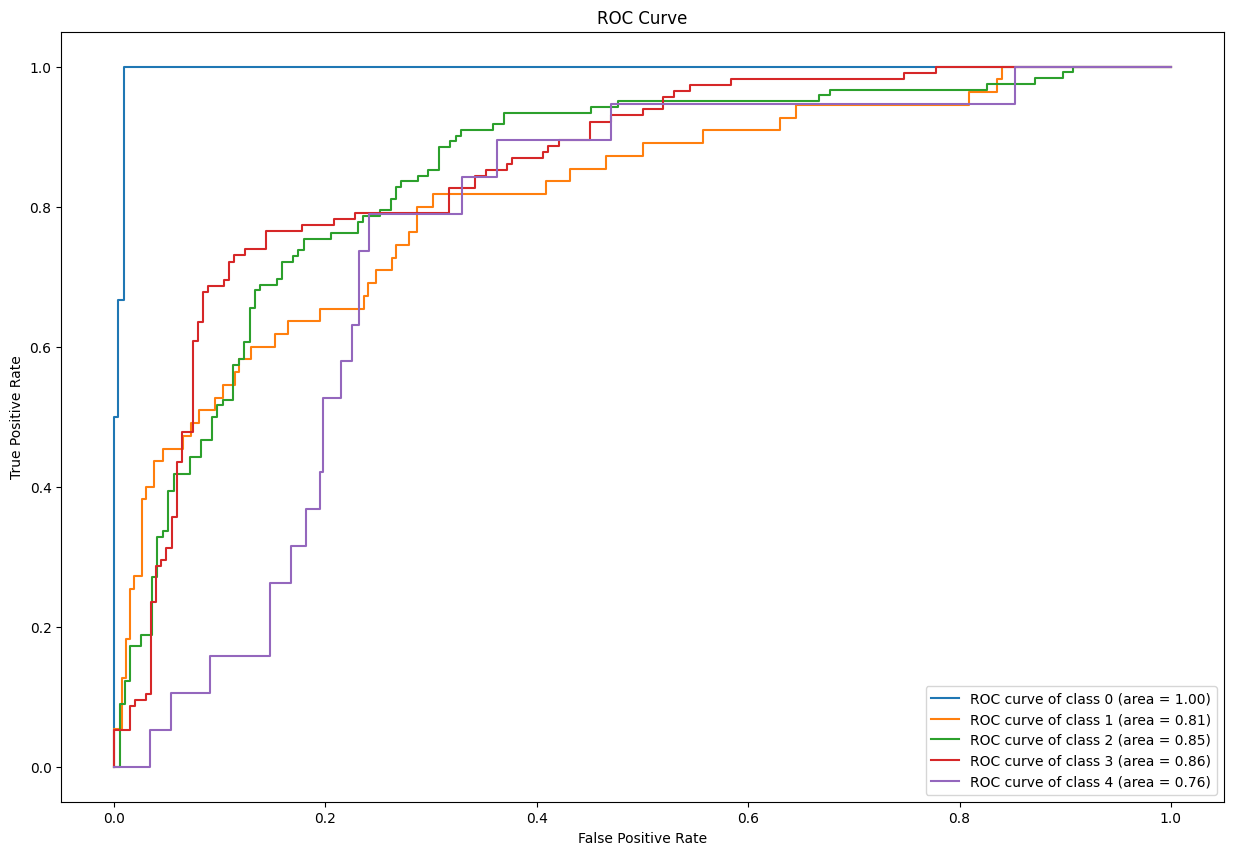

<Figure size 1500x1000 with 0 Axes>

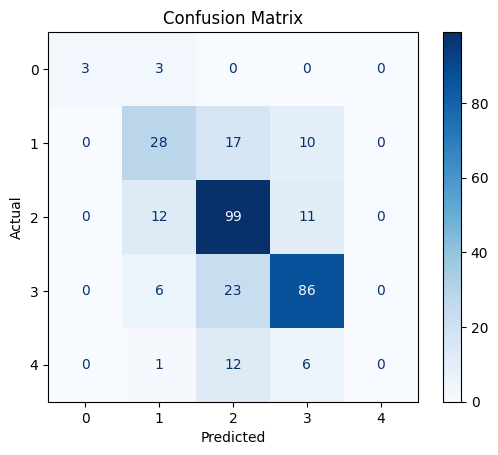

100%|██████████| 100/100 [00:27<00:00,  3.63trial/s, best loss: -0.6587953688566183]
{'C': 0.5117177663857898}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6813880126182965
Precision score:  0.6466288666510649
Recall score:  0.6813880126182965
F1 score:  0.6587953688566183


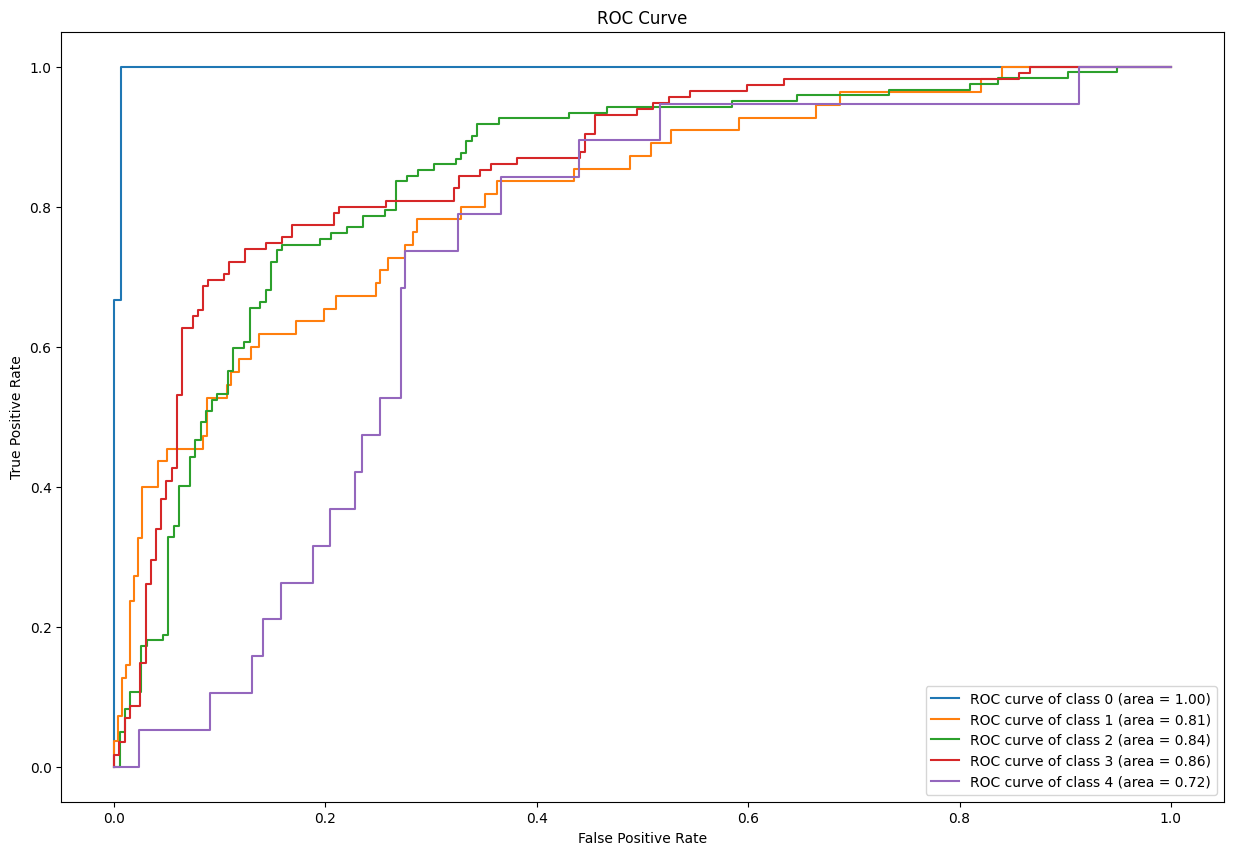

<Figure size 1500x1000 with 0 Axes>

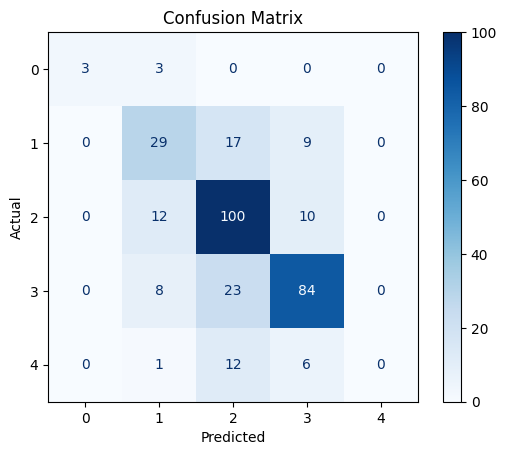

In [143]:
def support_vector_machine(X_train_sm, y_train_sm, X_test, y_test):
    svm_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #svm_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

support_vector_machine(X_train_sm, y_train_sm, X_test, y_test)
support_vector_machine(X_train, y_train, X_test, y_test)

## Decision Trees

**Important parameters:**
- Criterion
- Max_depth
- Splitter
- Min_sample_split
- Min_sample_leaf
- Max_features
- Min_impurity_decrease


### Hyperopt

In [82]:

def decision_tree_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'criterion': hp.choice('criterion', ['gini', 'entropy']),
        'max_depth': hp.quniform('max_depth', 1, 20, 1),
        'splitter': hp.choice('splitter', ['best', 'random']),
        'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'max_features': hp.choice("max_features", ['sqrt', 'log2']),
        'min_impurity_decrease': hp.quniform('min_impurity_decrease', 0.0, 1, 0.1)
    }

    def objective(space):
        dt = DecisionTreeClassifier(
            criterion=space['criterion'],
            max_depth=int(space['max_depth']),
            splitter=space['splitter'],
            max_features=space['max_features'],
            min_samples_leaf=int(space['min_samples_leaf']),
            min_samples_split=int(space['min_samples_split']),
            min_impurity_decrease=float(space['min_impurity_decrease'])
        )

        dt.fit(X_train_sm, y_train_sm)

        y_pred = dt.predict(X_test)

        F1 = f1_score(y_test, y_pred, average='weighted')

        return {'loss': -F1, 'status': STATUS_OK}

    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

    save_best_params(best, 'decision_tree', 'hyperopt')

    print(best)

    criterion_map = {0: 'gini', 1: 'entropy'}
    splitter_map = {0: 'best', 1: 'random'}
    max_features_map = {0: 'sqrt', 1: 'log2'}

    best['criterion'] = criterion_map[best['criterion']]
    best['splitter'] = splitter_map[best['splitter']]
    best['max_features'] = max_features_map[best['max_features']]

    dt_hyperopt = DecisionTreeClassifier(
        criterion=best['criterion'],
        max_depth=int(best['max_depth']),
        splitter=best['splitter'],
        max_features=best['max_features'],
        min_samples_leaf=int(best['min_samples_leaf']),
        min_samples_split=int(best['min_samples_split']),
        min_impurity_decrease=float(best['min_impurity_decrease'])
    )

    dt_hyperopt.fit(X_train_sm, y_train_sm)

    res=evaluate_model(dt_hyperopt, X_train_sm, X_test, y_train_sm, y_test)

    return res


### GridSearch

In [200]:
def decision_tree_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_dt = {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(5, 10, 1),
        'splitter': ['best', 'random'],
        'min_samples_split': np.arange(1, 5, 1),
        'min_samples_leaf': np.arange(1, 5, 1),
        'max_features': ['sqrt', 'log2'],
        'min_impurity_decrease': np.arange(0.0, 0.5, 0.1)
    }

    dt = DecisionTreeClassifier()
    grid_search_result = GridSearchCV(dt, parameters_dt, cv=2, scoring='f1_weighted', verbose=10)
    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_dt_gs = grid_search_result.best_params_

    dt_gs = DecisionTreeClassifier(
        criterion=best_param_dt_gs['criterion'],
        max_depth=best_param_dt_gs['max_depth'],
        splitter=best_param_dt_gs['splitter'],
        max_features=best_param_dt_gs['max_features'],
        min_samples_leaf=best_param_dt_gs['min_samples_leaf'],
        min_samples_split=best_param_dt_gs['min_samples_split'],
        min_impurity_decrease=best_param_dt_gs['min_impurity_decrease']
    )

    dt_gs.fit(X_train_sm, y_train_sm)

    res=evaluate_model(dt_gs, X_train_sm, X_test, y_train_sm, y_test)
    return res

### Function Decision tree

In [155]:
def decision_tree(X_train_sm, y_train_sm, X_test, y_test):
    decision_tree_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #decision_tree_gridsearch(X_train_sm, y_train_sm, X_test, y_test)
    
#decision_tree(X_train, y_train, X_test, y_test)
#decision_tree(X_train_sm, y_train_sm, X_test, y_test)

## K-Nearest Neighbors

**Important parameters:**
- n_neighbors
- weights
- algorithm
- metric
- leaf_size
- p

### Hyperopt

In [156]:
def k_nearest_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'n_neighbors': hp.choice('n_neighbors', range(1, 50)),
        'weights': hp.choice('weights', ['uniform', 'distance']),
        'algorithm': hp.choice('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'metric' : hp.choice('metric', ['euclidean', 'manhattan', 'chebyshev', 'minkowski']),
        'leaf_size': hp.choice('leaf_size', range(1, 50)),
        'p': hp.choice('p', [1, 2])
    }

    def objetive(space):
        knn =  KNeighborsClassifier(n_neighbors= int(space['n_neighbors']),
                                            weights= space['weights'],
                                            algorithm= space['algorithm'],
                                            leaf_size= int(space['leaf_size']),
                                            metric= space['metric'],
                                            p= int(space['p']))

        knn.fit(X_train_sm, y_train_sm)

        y_pred = knn.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
            space = space,
            algo = tpe.suggest,
            max_evals = 100)

    print(best)

    save_best_params(best, 'knn', 'hyperopt')

    algorithm_map = {0: 'auto', 1: 'ball_tree', 2: 'kd_tree', 3: 'brute'}
    metric_map = {0: 'euclidean', 1: 'manhattan', 2: 'chebyshev', 3: 'minkowski'}
    weights_map = {0: 'uniform', 1: 'distance'}
    p_map = {0: 1, 1: 2}

    best['algorithm'] = algorithm_map[best['algorithm']]
    best['metric'] = metric_map[best['metric']]
    best['weights'] = weights_map[best['weights']]
    best['p'] = p_map[best['p']]

    knn = KNeighborsClassifier(n_neighbors=best['n_neighbors'],
                                weights=best['weights'],
                                algorithm=best['algorithm'],
                                metric=best['metric'],
                                leaf_size=best['leaf_size'],
                                p=best['p'])

    knn.fit(X_train_sm, y_train_sm)

    res=evaluate_model(knn, X_train_sm, X_test, y_train_sm, y_test)

    return res


### GridSearch

In [157]:
def k_nearest_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_knn = dict(n_neighbors=range(1, 50),
                        weights=['uniform', 'distance'],
                        algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'],
                        leaf_size=range(1, 50),
                        metric=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                        p=[1, 2])
    
    knn = KNeighborsClassifier()

    grid_search_result = GridSearchCV(knn, parameters_knn, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_knn_gs = grid_search_result.best_params_

    save_best_params(best_param_knn_gs, 'knn', 'grid_search')

    knn = KNeighborsClassifier(n_neighbors=best_param_knn_gs['n_neighbors'],
                                weights=best_param_knn_gs['weights'],
                                algorithm=best_param_knn_gs['algorithm'],
                                metric=best_param_knn_gs['metric'],
                                leaf_size=best_param_knn_gs['leaf_size'],
                                p=best_param_knn_gs['p'])

    knn.fit(X_train_sm, y_train_sm)

    res=evaluate_model(knn, X_train_sm, X_test, y_train_sm, y_test)

    return res

In [158]:
def k_nearest_neighbors(X_train_sm, y_train_sm, X_test, y_test):
    k_nearest_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #k_nearest_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

#k_nearest_neighbors(X_train, y_train, X_test, y_test)
#k_nearest_neighbors(X_train_sm, y_train_sm, X_test, y_test) 

## Multi-class Logistic Regression

**Important parameters:**
- solver
- penalty
- C
- max_iter
- tolerance
- wights
- algorithm


### Hyperopt

In [196]:
def logistic_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    'penalty': hp.choice('penalty', ['l2']),
    'C': hp.quniform("C", 0.1, 10.0, 0.1),
    'max_iter': hp.choice('max_iter', range(1, 1000)),
    'tolerance': hp.quniform("tolerance", 0.0001, 1.0, 0.01),
    'weights': hp.choice('weights', ['balanced',None]),
    'eps': hp.quniform("eps", 0.0001, 1.0, 0.01)
    }
    
    def objective(space):
        lreg =  LogisticRegression(penalty= space['penalty'],
                                    C= float(space['C']),
                                    solver= space['solver'],
                                    max_iter= int(space['max_iter']),
                                    tol= float(space['tolerance']),
                                    class_weight= space['weights'],
                                    eps= float(space['eps']))

        lreg.fit(X_train_sm, y_train_sm)

        y_pred = lreg.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objective,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    print(best)

    save_best_params(best, 'l_reg', 'hyperopt')

    solver_map = {0: 'newton-cg', 1: 'lbfgs', 2: 'liblinear', 3: 'sag', 4: 'saga'}
    weights_map = {0: 'balanced', 1: None}

    best['solver'] = solver_map[best['solver']]
    best['weights'] = weights_map[best['weights']]

    print(best )
    lr = LogisticRegression(solver=best['solver'],
                            penalty='l2',
                            C=float(best['C']),
                            max_iter=best['max_iter'],
                            tol=float(best['tolerance']),
                            class_weight=best['weights'])

    lr.fit(X_train_sm, y_train_sm)

    res=evaluate_model(lr, X_train_sm, X_test, y_train_sm, y_test)

    return res


### GridSearch

In [201]:
def logistic_gridsearch(X_train_sm, y_train_sm, X_test, y_test):

    parameters_lreg = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        penalty=['l2'],
                        C=np.arange(5, 10.0, 0.1),
                        max_iter=range(200, 400),
                        tol=np.arange(0.1, 1.0, 0.01),
                        weights=['balanced', None])
    
    lr = LogisticRegression()

    grid_search_result = GridSearchCV(lr, parameters_lreg, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_lreg_gs = grid_search_result.best_params_

    print (best_param_lreg_gs)

    save_best_params(best_param_lreg_gs, 'l_reg', 'grid_search')

    lr = LogisticRegression(solver=best_param_lreg_gs['solver'],
                            penalty=best_param_lreg_gs['penalty'],
                            C=float(best_param_lreg_gs['C']),
                            max_iter=best_param_lreg_gs['max_iter'],
                            tol=float(best_param_lreg_gs['tolerance']),
                            weights=best_param_lreg_gs['weights'],
                            algorithm=best_param_lreg_gs['algorithm'])

    lr.fit(X_train_sm, y_train_sm)

    res=evaluate_model(lr, X_train_sm, X_test, y_train_sm, y_test)

    return res

    

### Function Logistic Regression


In [161]:
def logistic(X_train_sm, y_train_sm, X_test, y_test):
    logistic_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #logistic_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

#logistic(X_train, y_train, X_test, y_test)
#logistic(X_train_sm, y_train_sm, X_test, y_test)

## Neural Network

**Important parameters:**
- hidden_layer
- activation_function
- solver
- alpha
- learning rate

### Hyperopt

In [162]:
def neuralnetwork_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'hidden_layer': hp.choice('hidden_layer', [1, 2, 3, 4, 5]),
        'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
        'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
        'alpha': hp.quniform("alpha", 0.0001, 1.0, 0.01),
        'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    }

    def hyperparameter_tuning(space):
        nn =  MLPClassifier(hidden_layer_sizes= space['hidden_layer'],
                            activation= space['activation'],
                            solver= space['solver'],
                            alpha= float(space['alpha']),
                            learning_rate= space['learning_rate'])

        nn.fit(X_train_sm, y_train)

        y_pred = nn.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = hyperparameter_tuning,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'neural_net', 'hyperopt')
    

    hidden_layer_map = {0: (1,), 1: (2,), 2: (3,), 3: (4,), 4: (5,)}
    activation_map = {0: 'identity', 1: 'logistic', 2: 'tanh', 3: 'relu'}
    solver_map = {0: 'lbfgs', 1: 'sgd', 2: 'adam'}
    learning_rate_map = {0: 'constant', 1: 'invscaling', 2: 'adaptive'}

    best['hidden_layer'] = hidden_layer_map[best['hidden_layer']]
    best['activation'] = activation_map[best['activation']]
    best['solver'] = solver_map[best['solver']]
    best['learning_rate'] = learning_rate_map[best['learning_rate']]

    print(best)

    nn = MLPClassifier(hidden_layer_sizes=best['hidden_layer'],
                        activation=best['activation'],
                        solver=best['solver'],
                        alpha=float(best['alpha']),
                        learning_rate=best['learning_rate'])

    nn.fit(X_train_sm, y_train_sm)

    res= evaluate_model(nn, X_train_sm, X_test, y_train_sm, y_test)

    return res

### GridSearch

In [202]:
def neuralnetwork_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_nn = dict(hidden_layer_sizes=[(1,), (2,), (3,), (4,), (5,)],
                        activation=['identity', 'logistic', 'tanh', 'relu'],
                        solver=['lbfgs', 'sgd', 'adam'],
                        alpha=np.arange(0.1, 1.0, 0.1),
                        learning_rate=['constant', 'invscaling', 'adaptive'])
    
    nn = MLPClassifier()

    grid_search_result = GridSearchCV(nn, parameters_nn, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_nn_gs = grid_search_result.best_params_

    print (best_param_nn_gs)

    save_best_params(best_param_nn_gs, 'neural_net', 'grid_search')

    nn = MLPClassifier(hidden_layer_sizes=best_param_nn_gs['hidden_layer'],
                        activation=best_param_nn_gs['activation'],
                        solver=best_param_nn_gs['solver'],
                        alpha=float(best_param_nn_gs['alpha']),
                        learning_rate=best_param_nn_gs['learning_rate'])

    nn.fit(X_train_sm, y_train_sm)

    res=evaluate_model(nn, X_train_sm, X_test, y_train_sm, y_test)

    return res

### Function Neural Network

In [164]:
def neuralnetwork(X_train_sm, y_train_sm, X_test, y_test):
    neuralnetwork_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #neuralnetwork_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

#neuralnetwork(X_train, y_train, X_test, y_test)
#neuralnetwork(X_train_sm, y_train_sm, X_test, y_test)

## Random Forest

**Important parameters:**
- estimators
- max_features
- min_sample_leaf
- n_jobs
- random_state
- oob_score


### Hyperopt

In [165]:
def randomforest_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'estimators': hp.choice('estimators', range(1, 100)),
        'max_features': hp.choice('max_features', [ 'sqrt', 'log2']),
        'min_sample_leaf': hp.choice('min_sample_leaf', range(1, 10)),
        'n_jobs' : hp.choice('n_jobs', range(1, 10)),
        'random_state' : hp.choice('random_state', range(1, 10)),
        'oob_score' : hp.choice('oob_score', [True, False]),
    }

    def objetive(space):
        rf =  RandomForestClassifier(n_estimators= int(space['estimators']),
                                    max_features= space['max_features'],
                                    min_samples_leaf= int(space['min_sample_leaf']),
                                    n_jobs= int(space['n_jobs']),
                                    random_state= int(space['random_state']),
                                    oob_score= space['oob_score'])

        rf.fit(X_train_sm, y_train_sm)

        y_pred = rf.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'rand_f', 'hyperopt')

    max_features_map = {0: 'sqrt', 1: 'log2'}
    oob_score_map = {0: True, 1: False}

    best['max_features'] = max_features_map[best['max_features']]
    best['oob_score'] = oob_score_map[best['oob_score']]

    print(best)

    rf = RandomForestClassifier(n_estimators=best['estimators'],
                                max_features=max_features_map[1],
                                min_samples_leaf=1,
                                n_jobs=best['n_jobs'],
                                random_state=best['random_state'],
                                oob_score=best['oob_score'])

    rf.fit(X_train_sm, y_train_sm)

    res=evaluate_model(rf, X_train_sm, X_test, y_train_sm, y_test)

    return res

### GridSearch

In [203]:
def randomforest_gridsearch(X_train_sm, y_train_sm, X_test, y_test):

    parameters_rf = dict(n_estimators=range(1, 100, 10),
                        max_features=['sqrt', 'log2'],
                        min_sample_leaf=range(1, 5),
                        n_jobs=range(1, 5),
                        random_state=range(1, 10),
                        oob_score=[True, False])
    
    rf = RandomForestClassifier()

    grid_search_result = GridSearchCV(rf, parameters_rf, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_rf_gs = grid_search_result.best_params_

    print (best_param_rf_gs)

    save_best_params(best_param_rf_gs, 'rand_f', 'grid_search')

    rf = RandomForestClassifier(n_estimators=best_param_rf_gs['estimators'],
                                max_features=best_param_rf_gs['max_features'],
                                min_sample_leaf=best_param_rf_gs['min_sample_leaf'],
                                n_jobs=best_param_rf_gs['n_jobs'],
                                random_state=best_param_rf_gs['random_state'],
                                oob_score=best_param_rf_gs['oob_score'])

    rf.fit(X_train_sm, y_train_sm)

    res=evaluate_model(rf, X_train_sm, X_test, y_train_sm, y_test)

    return res

### Function Random Forest

In [168]:
def randomforest(X_train_sm, y_train_sm, X_test, y_test):
    randomforest_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #randomforest_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

#randomforest(X_train, y_train, X_test, y_test)
#randomforest(X_train_sm, y_train_sm, X_test, y_test)

## XGBoost

**Important parameters:**
- estimators
- learning_rate
- max_depth
- grow_policy
- booster
- gamma
- min_child_weight


### Hyperopt

In [190]:
def xgboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    y.unique()

    space = {
        'estimators': hp.choice('estimators', range(1, 100)),
        'learning_rate': hp.quniform("learning_rate", 0.005, 10.0, 0.1),
        'max_depth': hp.choice('max_depth', range(1, 100)),
        'grow_policy': hp.choice('grow_policy', ['depthwise', 'lossguide']),
        'booster': hp.choice('booster', ['gbtree', 'gblinear', 'dart']),
        'gamma': hp.quniform("gamma", 0.0001, 1.0, 0.01),
        'min_child_weight': hp.choice('min_child_weight', range(1, 10))
    }

    def objetive(space):
        xgboost =  XGBClassifier(n_estimators= int(space['estimators']),
                                learning_rate= float(space['learning_rate']),
                                max_depth= int(space['max_depth']),
                                grow_policy= space['grow_policy'],
                                booster= space['booster'],
                                gamma= float(space['gamma']),
                                min_child_weight= int(space['min_child_weight']))

        xgboost.fit(X_train_sm, y_train_sm)

        y_pred = xgboost.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'xgboost', 'hyperopt')

    grow_policy_map = {0: 'depthwise', 1: 'lossguide'}
    booster_map = {0: 'gbtree', 1: 'gblinear', 2: 'dart'}

    best['grow_policy'] = grow_policy_map[best['grow_policy']]
    best['booster'] = booster_map[best['booster']]

    print(best)

    xgboost = XGBClassifier(n_estimators=best['estimators'],
                            learning_rate=best['learning_rate'],
                            max_depth=best['max_depth'],
                            grow_policy=best['grow_policy'],
                            booster=best['booster'],
                            gamma=best['gamma'],
                            min_child_weight=best['min_child_weight']) 



    xgboost.fit(X_train_sm,y_train_sm )

    res=evaluate_model(xgboost, X_train_sm, X_test, y_train_sm, y_test)

    return res

### GridSearch

In [205]:
def xgboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_xgboost = dict(n_estimators=range(1, 100),
                        learning_rate=np.arange(0.005, 1.0, 0.1),
                        max_depth=range(1, 100, 20),
                        grow_policy=['depthwise', 'lossguide'],
                        booster=['gbtree', 'gblinear', 'dart'],
                        gamma=np.arange(0.1, 1.0, 0.1),
                        min_child_weight=range(0, 5))

    xgboost = XGBClassifier()

    grid_search_result = RandomizedSearchCV(xgboost, parameters_xgboost, cv = 5, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_xgboost_gs = grid_search_result.best_params_

    print (best_param_xgboost_gs)

    save_best_params(best_param_xgboost_gs, 'xgboost', 'grid_search')

    xgboost = XGBClassifier(n_estimators=best_param_xgboost_gs['n_estimators'],
                            learning_rate=best_param_xgboost_gs['learning_rate'],
                            max_depth=best_param_xgboost_gs['max_depth'],
                            grow_policy=best_param_xgboost_gs['grow_policy'],
                            booster=best_param_xgboost_gs['booster'],
                            gamma=best_param_xgboost_gs['gamma'],
                            min_child_weight=best_param_xgboost_gs['min_child_weight'])

    xgboost.fit(X_train_sm, y_train_sm)

    res=evaluate_model(xgboost, X_train_sm, X_test, y_train_sm, y_test)

    return res

### Function XGBoost

  2%|▏         | 2/100 [00:09<06:32,  4.01s/trial, best loss: -0.30257455691209634]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  5%|▌         | 5/100 [00:10<01:53,  1.19s/trial, best loss: -0.30257455691209634]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  9%|▉         | 9/100 [00:12<01:07,  1.36trial/s, best loss: -0.5892490811461014] 

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 12/100 [00:26<03:42,  2.53s/trial, best loss: -0.5892490811461014]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:48:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 14/100 [00:28<02:18,  1.61s/trial, best loss: -0.5892490811461014]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 16/100 [00:29<01:18,  1.07trial/s, best loss: -0.5892490811461014]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 35%|███▌      | 35/100 [00:54<01:12,  1.12s/trial, best loss: -0.6471529047858695]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 39%|███▉      | 39/100 [01:02<02:03,  2.03s/trial, best loss: -0.6602738760934873]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 41%|████      | 41/100 [01:03<01:05,  1.11s/trial, best loss: -0.6602738760934873]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 43%|████▎     | 43/100 [01:03<00:36,  1.57trial/s, best loss: -0.6602738760934873]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 45%|████▌     | 45/100 [01:04<00:24,  2.29trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 46/100 [01:04<00:21,  2.56trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 47%|████▋     | 47/100 [01:04<00:18,  2.86trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 48/100 [01:04<00:16,  3.14trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 49%|████▉     | 49/100 [01:05<00:15,  3.23trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 50/100 [01:05<00:17,  2.82trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 51%|█████     | 51/100 [01:05<00:15,  3.08trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 52/100 [01:06<00:14,  3.25trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 53%|█████▎    | 53/100 [01:06<00:13,  3.40trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 54/100 [01:06<00:13,  3.52trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 55%|█████▌    | 55/100 [01:06<00:11,  4.03trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 57%|█████▋    | 57/100 [01:07<00:10,  4.12trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 59%|█████▉    | 59/100 [01:07<00:11,  3.70trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 60/100 [01:08<00:09,  4.24trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 62/100 [01:08<00:08,  4.47trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 64/100 [01:08<00:08,  4.49trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 65%|██████▌   | 65/100 [01:09<00:06,  5.12trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 67%|██████▋   | 67/100 [01:09<00:07,  4.69trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 69%|██████▉   | 69/100 [01:09<00:06,  4.81trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 71%|███████   | 71/100 [01:10<00:08,  3.52trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 72/100 [01:10<00:06,  4.10trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 75%|███████▌  | 75/100 [01:13<00:14,  1.68trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 79%|███████▉  | 79/100 [01:17<00:15,  1.33trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 80/100 [01:18<00:11,  1.68trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 81%|████████  | 81/100 [01:18<00:09,  2.06trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 83%|████████▎ | 83/100 [01:23<00:23,  1.41s/trial, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 85%|████████▌ | 85/100 [01:24<00:12,  1.19trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 88/100 [01:36<00:34,  2.86s/trial, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 90/100 [01:37<00:15,  1.55s/trial, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 92%|█████████▏| 92/100 [01:37<00:07,  1.11trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 94/100 [01:39<00:05,  1.11trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [01:40<00:02,  1.73trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 97%|█████████▋| 97/100 [01:40<00:01,  2.19trial/s, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 99%|█████████▉| 99/100 [01:50<00:03,  3.06s/trial, best loss: -0.6604241575893057]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [01:50<00:00,  1.11s/trial, best loss: -0.6604241575893057]
{'booster': 'gblinear', 'estimators': 81, 'gamma': 0.76, 'grow_policy': 'lossguide', 'learning_rate': 1.6, 'max_depth': 42, 'min_child_weight': 3}


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.668769716088328
Precision score:  0.646421953560798
Recall score:  0.668769716088328
F1 score:  0.6519573963822426


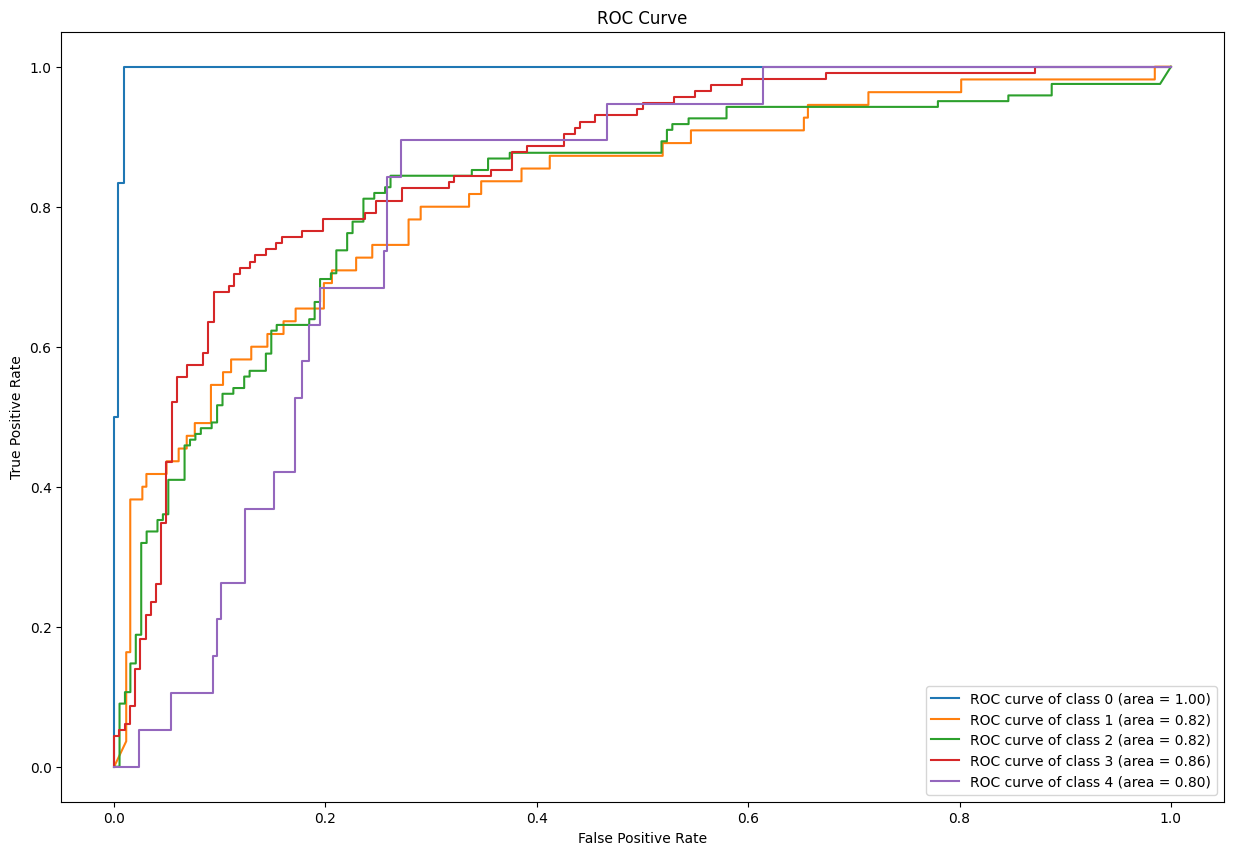

<Figure size 1500x1000 with 0 Axes>

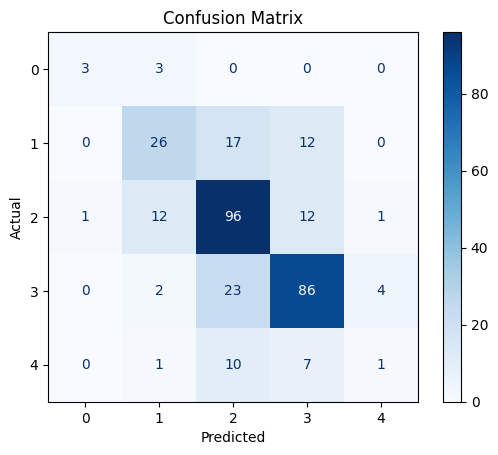

  1%|          | 1/100 [00:00<00:16,  6.09trial/s, best loss: -0.0007031868035276538]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:49:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  4%|▍         | 4/100 [00:13<05:14,  3.28s/trial, best loss: -0.260662660575266]    

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:50:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 8/100 [00:15<01:41,  1.10s/trial, best loss: -0.6143802768264301]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:50:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:50:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 14/100 [00:17<00:26,  3.19trial/s, best loss: -0.643951572946864] 

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:50:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 29%|██▉       | 29/100 [00:52<02:08,  1.80s/trial, best loss: -0.6609685164120803]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:50:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 33%|███▎      | 33/100 [01:05<02:09,  1.93s/trial, best loss: -0.6609685164120803]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 37%|███▋      | 37/100 [01:14<01:59,  1.90s/trial, best loss: -0.6622182734252018]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 38/100 [01:14<01:25,  1.39s/trial, best loss: -0.6622182734252018]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 40/100 [01:15<00:49,  1.22trial/s, best loss: -0.665365471142802] 

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 41%|████      | 41/100 [01:15<00:37,  1.56trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 42%|████▏     | 42/100 [01:15<00:30,  1.91trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 43%|████▎     | 43/100 [01:16<00:25,  2.22trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 44%|████▍     | 44/100 [01:16<00:20,  2.68trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 46/100 [01:16<00:15,  3.56trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 47%|████▋     | 47/100 [01:16<00:12,  4.08trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 49%|████▉     | 49/100 [01:17<00:11,  4.44trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 51%|█████     | 51/100 [01:17<00:13,  3.76trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 52/100 [01:18<00:12,  3.80trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 53%|█████▎    | 53/100 [01:18<00:11,  4.14trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 55%|█████▌    | 55/100 [01:18<00:10,  4.40trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 57%|█████▋    | 57/100 [01:19<00:10,  4.26trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 59%|█████▉    | 59/100 [01:19<00:09,  4.48trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 60/100 [01:20<00:09,  4.19trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 61%|██████    | 61/100 [01:20<00:09,  3.91trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 62/100 [01:20<00:09,  4.00trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 65%|██████▌   | 65/100 [01:23<00:22,  1.59trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 66/100 [01:23<00:16,  2.04trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 68/100 [01:23<00:12,  2.60trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 69%|██████▉   | 69/100 [01:24<00:10,  2.87trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 70/100 [01:24<00:09,  3.18trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 71%|███████   | 71/100 [01:24<00:08,  3.28trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 72/100 [01:24<00:07,  3.88trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 74/100 [01:25<00:08,  3.18trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 76/100 [01:32<00:36,  1.54s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 77%|███████▋  | 77/100 [01:32<00:27,  1.20s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 79%|███████▉  | 79/100 [01:33<00:15,  1.35trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 81%|████████  | 81/100 [01:37<00:23,  1.23s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 82%|████████▏ | 82/100 [01:37<00:17,  1.05trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 84/100 [01:38<00:09,  1.62trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 86/100 [01:43<00:19,  1.42s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 88/100 [01:43<00:10,  1.20trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 90/100 [01:44<00:06,  1.66trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 93%|█████████▎| 93/100 [01:51<00:11,  1.68s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [01:52<00:03,  1.31trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [01:57<00:02,  1.38s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [01:57<00:00,  1.18s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [20:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



{'booster': 'gblinear', 'estimators': 44, 'gamma': 1.0, 'grow_policy': 'lossguide', 'learning_rate': 0.5, 'max_depth': 93, 'min_child_weight': 3}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6845425867507886
Precision score:  0.6629413864078438
Recall score:  0.6845425867507886
F1 score:  0.665365471142802


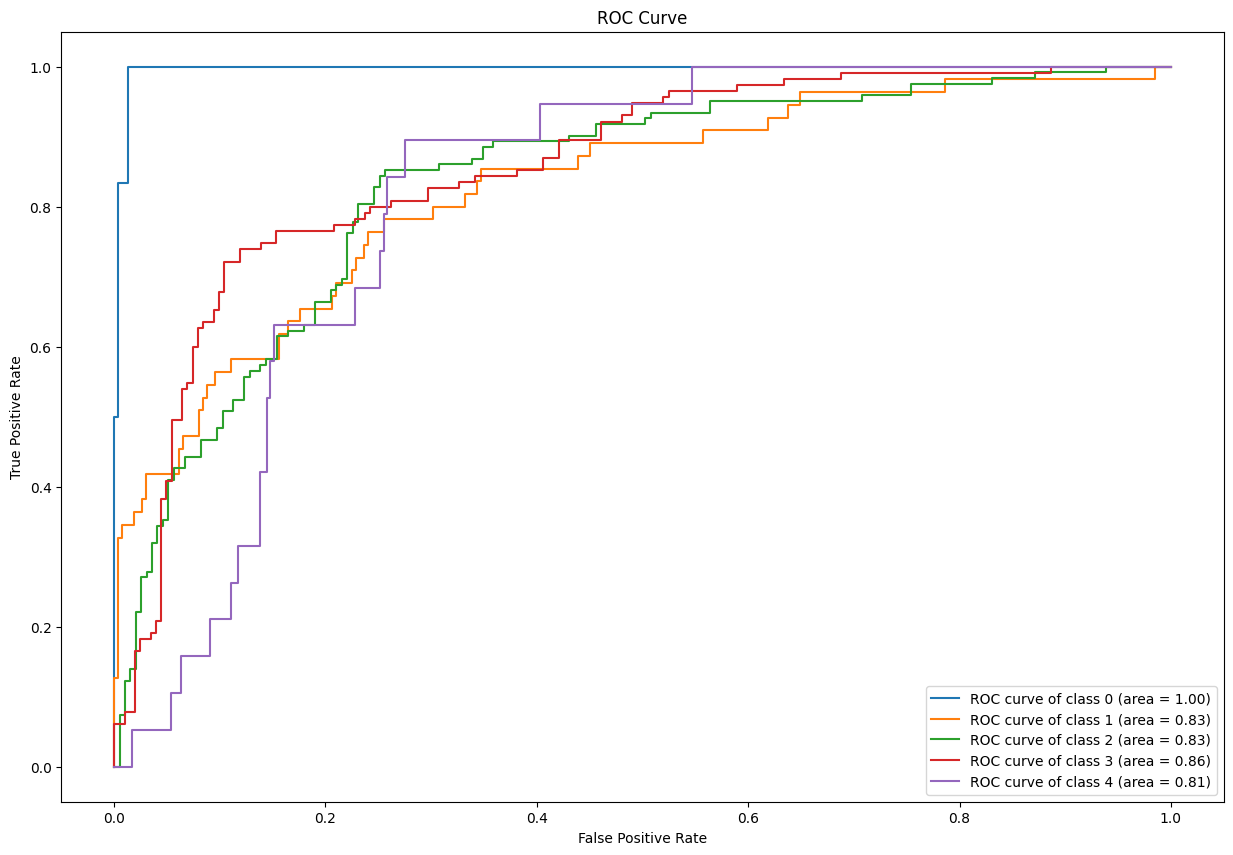

<Figure size 1500x1000 with 0 Axes>

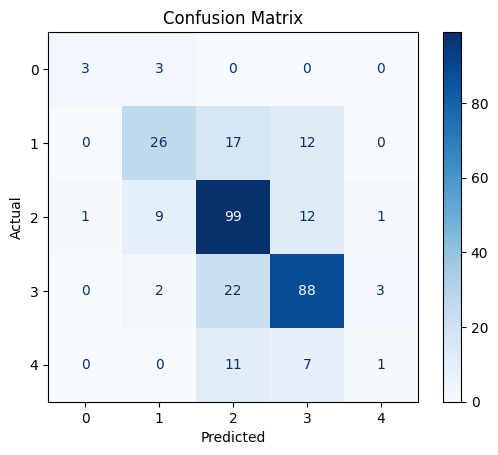

In [145]:
def xgboost(X_train_sm, y_train_sm, X_test, y_test):
    xgboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #xgboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

#xgboost(X_train, y_train, X_test, y_test)
#xgboost(X_train_sm, y_train_sm, X_test, y_test)

## AdaBoost

**Important parameters:**
- estimators
- learning_rate
- loss function
- algorithm


### Hyperopt

In [207]:
def adaboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'estimators': hp.choice('estimators', range(1, 100)),
        'learning_rate': hp.quniform("learning_rate", 0.05, 10.0, 0.1),
        'algorithm': hp.choice('algorithm', ['SAMME', 'SAMME.R'])
    }

    def hyperparameter_tuning(space):
        adaboost =  AdaBoostClassifier(n_estimators= int(space['estimators']),
                                        learning_rate= float(space['learning_rate']),
                                        algorithm= space['algorithm'],
                                        )

        adaboost.fit(X_train_sm, y_train_sm)

        y_pred = adaboost.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = hyperparameter_tuning,
            space = space,
            algo = tpe.suggest,
            max_evals = 100)

    save_best_params(best, 'adaboost', 'hyperopt')

    algorithm_map = {0: 'SAMME', 1: 'SAMME.R'}

    best['algorithm'] = algorithm_map[best['algorithm']]

    print (best)

    adaboost = AdaBoostClassifier(n_estimators=best['estimators'],
                                learning_rate=best['learning_rate'],
                                algorithm=best['algorithm'])

    adaboost.fit(X_train_sm, y_train_sm)

    res=evaluate_model(adaboost, X_train_sm, X_test, y_train_sm, y_test)

    return res

### GridSearch

In [208]:
def adaboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_ada = dict(n_estimators=range(1, 100, 10),
                        learning_rate=np.arange(0.005, 2.0, 0.2),
                        algorithm=['SAMME', 'SAMME.R'])
    
    adaboost = AdaBoostClassifier()

    grid_search_result = GridSearchCV(adaboost, parameters_ada, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_ada_gs = grid_search_result.best_params_

    print (best_param_ada_gs)

    save_best_params(best_param_ada_gs, 'ada_boost', 'grid_search')

    addaboost = AdaBoostClassifier(n_estimators=best_param_ada_gs['estimators'],
                                learning_rate=best_param_ada_gs['learning_rate'],
                                loss_function=best_param_ada_gs['loss_function'],
                                algorithm=best_param_ada_gs['algorithm'])

    addaboost.fit(X_train_sm, y_train_sm)

    res=evaluate_model(addaboost, X_train_sm, X_test, y_train_sm, y_test)

    return res

### Function AdaBoost

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:17<00:00,  5.79trial/s, best loss: -0.642809349262469]
{'algorithm': 'SAMME', 'estimators': 91, 'learning_rate': 0.9}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6719242902208202
Precision score:  0.6368871656354544
Recall score:  0.6719242902208202
F1 score:  0.642809349262469


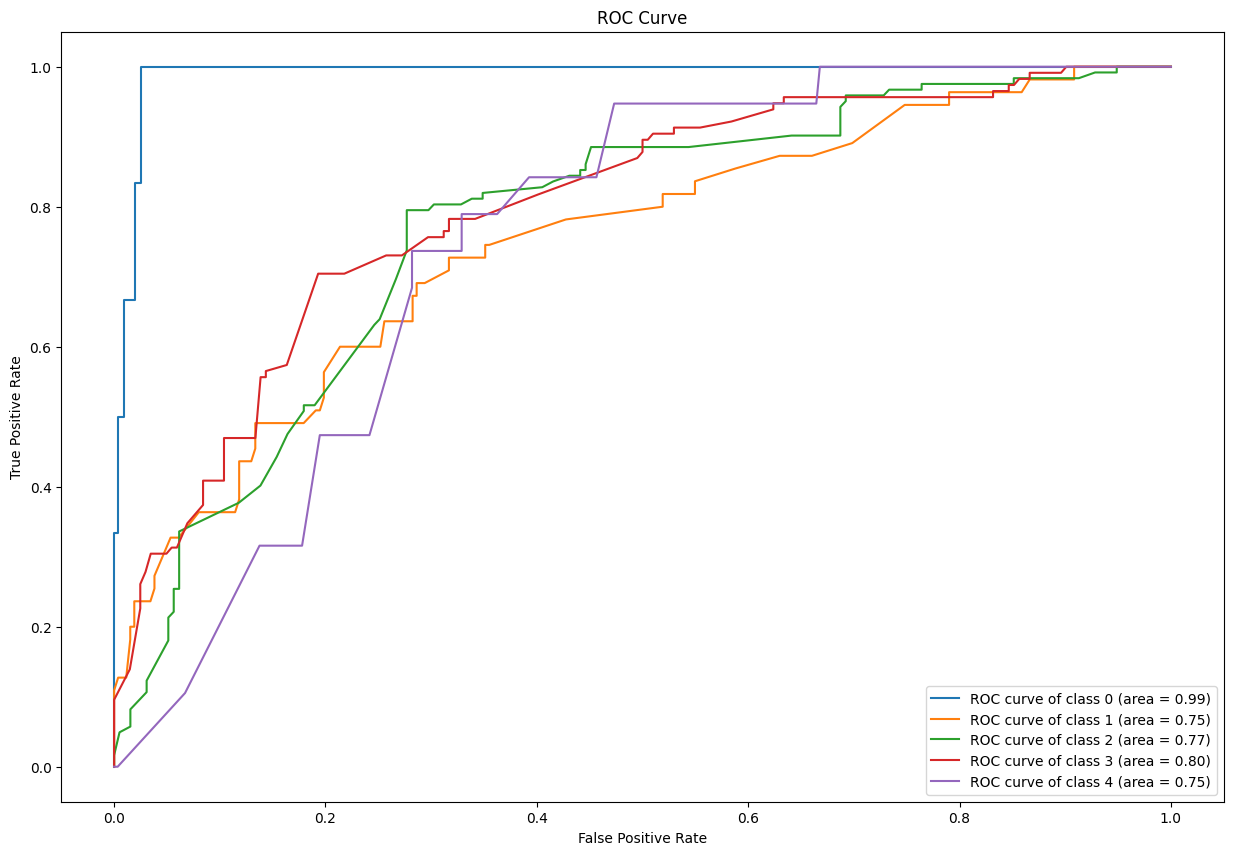

<Figure size 1500x1000 with 0 Axes>

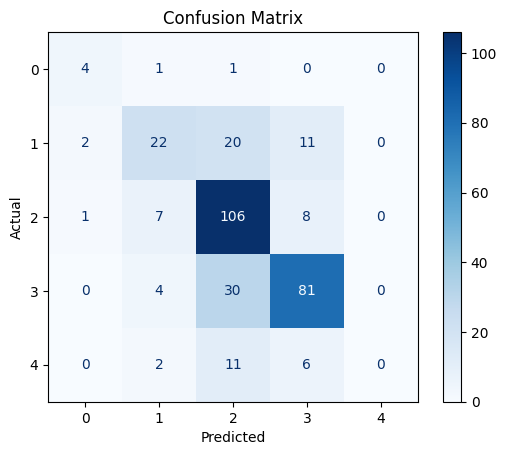

100%|██████████| 100/100 [00:16<00:00,  6.00trial/s, best loss: -0.6262142118182616]
{'algorithm': 'SAMME', 'estimators': 61, 'learning_rate': 0.4}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6656151419558359
Precision score:  0.6300955285766772
Recall score:  0.6656151419558359
F1 score:  0.6359389362627318


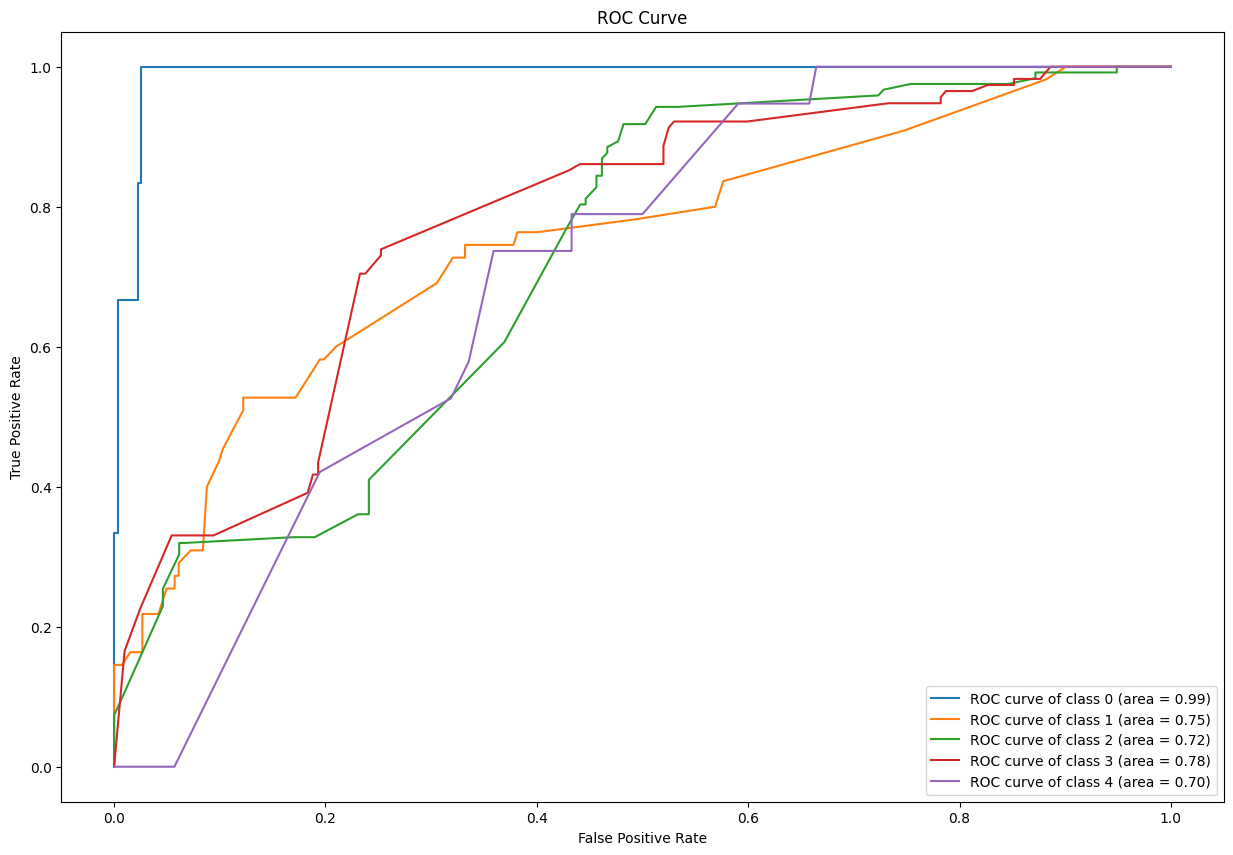

<Figure size 1500x1000 with 0 Axes>

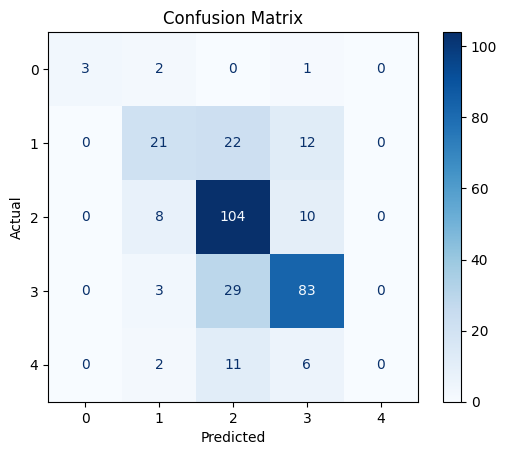

In [148]:
def adaboost(X_train_sm, y_train_sm, X_test, y_test):
    adaboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #adaboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

adaboost(X_train, y_train, X_test, y_test)
adaboost(X_train_sm, y_train_sm, X_test, y_test)


# Test Different methods with different balanced

In [194]:
# save best f1 score 
best_scores = {
    'SVM': 0.0,
    'Decision Tree': 0.0,
    'K-Nearest Neighbors': 0.0,
    'Logistic Regression': 0.0,
    'Neural Network': 0.0,
    'RandomForest': 0.0,
    'Xgboost': 0.0,
    'AdaBoost': 0.0
}

model_folders = {
    'SVM': 'svm',
    'Decision Tree': 'decision_tree',
    'K-Nearest Neighbors': 'knn',
    'Logistic Regression': 'l_reg',
    'Neural Network': 'neural_net',
    'RandomForest': 'rand_f',
    'Xgboost': 'xgboost',
    'AdaBoost': 'adaboost'
}

In [192]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from collections import Counter

balancing_techniques = ['TomekLinks', 'SMOTE', 'SMOTETomek', 'RandomOverSample']
    

def test_balance_model(X_train,y_train,X_test,y_test,balancing=None, models=None):
    results = {}

    if balancing == 'TomekLinks':
        balancer = TomekLinks()
    elif balancing == 'SMOTE':
        balancer = SMOTE(random_state=33)
    elif balancing == 'SMOTETomek':
        balancer = SMOTETomek(random_state=33)
    elif balancing == 'RandomOverSample':
        balancer = RandomOverSampler()

    #Balancear os dados
    counter= Counter(y_train)
    print("Before balanced: ", counter)
    X_train_sm, y_train_sm=balancer.fit_resample(X_train, y_train)
    counter= Counter(y_train_sm)
    print("After balanced: ", counter)

    # Exibir os resultados ordenados para cada modelo
    for model_name, model_func in models.items():
        #print("--------------------------------------------------------------------------------")
        print(f"---------Running: {model_name} using {balancing}")
        #X_train_balanced = X_train_sm if balancing != 'RandomOverSample' else X_train_sm.to_numpy()
        results[model_name] = model_func(X_train_sm, y_train_sm, X_test, y_test)
        if results[model_name]['f1'] > best_scores[model_name]:
            best_scores[model_name] = results[model_name]['f1']
            save_model(results[model_name], model_folders[model_name])

            


    
    """ print("-------------------------------------------------------------")
    print("-------------------------------------------------------------")
    print("\n \n Exibição dos resultados ordenados com base na ACCURACY") """

    # Ordenar os modelos com base na precisão (accuracy)
    orderRes = {k: v for k, v in sorted(results.items(), key=lambda item: item[1]['accuracy'], reverse=True)}

    """ for model_name, model_func in orderRes.items():
    # Imprimir os resultados para cada modelo
        acc = orderRes[model_name]['accuracy']
        prec = orderRes[model_name]['precision']
        rec = orderRes[model_name]['recall']
        f1 = orderRes[model_name]['f1']
        print(f"{model_name}")
        print(f"Accuracy - {acc}, Precision - {prec}, Recall - {rec}, F1-score - {f1} \n")
        print("\n --------------------------------")

 """
    return orderRes



### TomekLinks

In [174]:
tomeklinks_models_hyperopt={
    "SVM": svm_hyperopt,#Work
    "Decision Tree":decision_tree_hyperopt,#Work
    "K-Nearest Neighbors":k_nearest_hyperopt,#Work
    #"Logistic Regression":logistic_hyperopt,#Work
    #"Neural Network":neuralnetwork_hyperopt,
    #"RandomForest": randomforest_hyperopt,
    "Xgboost": xgboost_hyperopt,#Work
    "AdaBoost": adaboost_hyperopt,#Work
}

#to test
tomeklinks_models_grid={
    "SVM": svm_gridsearch,#Work
    "Decision Tree":decision_tree_gridsearch,#Work
    "K-Nearest Neighbors":k_nearest_gridsearch,#Work
    "Logistic Regression":logistic_gridsearch,#Work
    "Neural Network":neuralnetwork_gridsearch,#Work
    "RandomForest": randomforest_gridsearch,#Work
    "Xgboost": xgboost_gridsearch, #Work
    "AdaBoost": adaboost_gridsearch #Work
}

#test_balance_model(X_train,y_train,X_test,y_test,'TomekLinks', tomeklinks_models_grid)

In [209]:
def tomek_links_hyperopt():
    res=test_balance_model(X_train,y_train,X_test,y_test,'TomekLinks', tomeklinks_models_hyperopt)
    return res

def tomek_links_gridsearch():
    res=test_balance_model(X_train,y_train,X_test,y_test,'TomekLinks', tomeklinks_models_grid)
    return res

### Smote


In [176]:
smote_models_hyperopt={
    "SVM": svm_hyperopt,#Work
    "Decision Tree":decision_tree_hyperopt,#Work
    "K-Nearest Neighbors":k_nearest_hyperopt,#Work
    #"Logistic Regression":logistic_hyperopt,
    #"Neural Network":neuralnetwork_hyperopt,
    #"RandomForest": randomforest_hyperopt,
    "Xgboost": xgboost_hyperopt,#Work
    "AdaBoost": adaboost_hyperopt,#Work
}

#to test
smote_models_grid={
    "SVM": svm_gridsearch,#Work
    "Decision Tree":decision_tree_gridsearch,#Work
    "K-Nearest Neighbors":k_nearest_gridsearch,#Work
    "Logistic Regression":logistic_gridsearch,#Work
    "Neural Network":neuralnetwork_gridsearch,#Work
    "RandomForest": randomforest_gridsearch,#Work
    "Xgboost": xgboost_gridsearch, #Work
    "AdaBoost": adaboost_gridsearch #Work
}


#test_balance_model(X_train,y_train,X_test,y_test,'SMOTE',smote_models_hyperopt)

In [210]:
def smote_hyperopt():
    res=test_balance_model(X_train,y_train,X_test,y_test,'SMOTE',smote_models_hyperopt)
    return res

def smote_gridsearch():
    res=test_balance_model(X_train,y_train,X_test,y_test,'SMOTE',smote_models_grid)
    return res

### Smote Tomek

In [178]:
smote_tomek_models_hyperopt={
    "SVM":svm_hyperopt,#Work
    "Decision Tree":decision_tree_hyperopt,#Work
    "K-Nearest Neighbors":k_nearest_hyperopt,#Work
    "Logistic Regression":logistic_hyperopt,#Work
    #"Neural Network":neuralnetwork_hyperopt,
    "RandomForest": randomforest_hyperopt,#Work
    "Xgboost": xgboost_hyperopt,#Work
    "AdaBoost": adaboost_hyperopt,#Work
}

#to test
smote_tomek_models_grid={
    "SVM": svm_gridsearch,#Work
    "Decision Tree":decision_tree_gridsearch,#Work
    "K-Nearest Neighbors":k_nearest_gridsearch,#Work
    "Logistic Regression":logistic_gridsearch,#Work
    "Neural Network":neuralnetwork_gridsearch,#Work
    "RandomForest": randomforest_gridsearch,#Work
    "Xgboost": xgboost_gridsearch, #Work
    "AdaBoost": adaboost_gridsearch #Work
}

#test_balance_model(X_train,y_train,X_test,y_test,'SMOTETomek',smote_tomek_models_hyperopt)

In [211]:
def smote_tomek_hyperopt():
    res=test_balance_model(X_train,y_train,X_test,y_test,'SMOTETomek',smote_tomek_models_hyperopt)
    return res

def smote_tomek_gridsearch():
    res=test_balance_model(X_train,y_train,X_test,y_test,'SMOTETomek',smote_tomek_models_grid)
    return res

### RandomOverSample

In [180]:
random_oversample_models_hyperopt={
    "SVM": svm_hyperopt,#Work
    "Decision Tree":decision_tree_hyperopt,#Work
    "K-Nearest Neighbors":k_nearest_hyperopt,#Work
    "Logistic Regression":logistic_hyperopt,#Work
    #"Neural Network":neuralnetwork_hyperopt,
    "RandomForest": randomforest_hyperopt,#Work
    "Xgboost": xgboost_hyperopt,#Work
    "AdaBoost": adaboost_hyperopt,#Work
}

#to test
random_oversample_models_grid={
    "SVM": svm_gridsearch,#Work
    "Decision Tree":decision_tree_gridsearch,#Work
    "K-Nearest Neighbors":k_nearest_gridsearch,#Work
    "Logistic Regression":logistic_gridsearch,#Work
    "Neural Network":neuralnetwork_gridsearch,#Work
    "RandomForest": randomforest_gridsearch,#Work
    "Xgboost": xgboost_gridsearch, #Work
    "AdaBoost": adaboost_gridsearch #Work
}

#test_balance_model(X_train,y_train,X_test,y_test,'RandomOverSample',random_oversample_models_hyperopt)

In [212]:
def random_over_sample_hyperopt():
    res= test_balance_model(X_train,y_train,X_test,y_test,'RandomOverSample',random_oversample_models_hyperopt)
    return res

def random_over_sample_gridsearch():
    res= test_balance_model(X_train,y_train,X_test,y_test,'RandomOverSample',random_oversample_models_grid)
    return res

### The best for Hyperopt

Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({2: 294, 3: 283, 1: 135, 4: 36, 0: 20})
---------Running: SVM using TomekLinks
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:17<00:00,  5.74trial/s, best loss: -0.6582860698225659]
{'C': 0.9295622582211576}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6813880126182965
Precision score:  0.6450675231130328
Recall score:  0.6813880126182965
F1 score:  0.6582860698225659


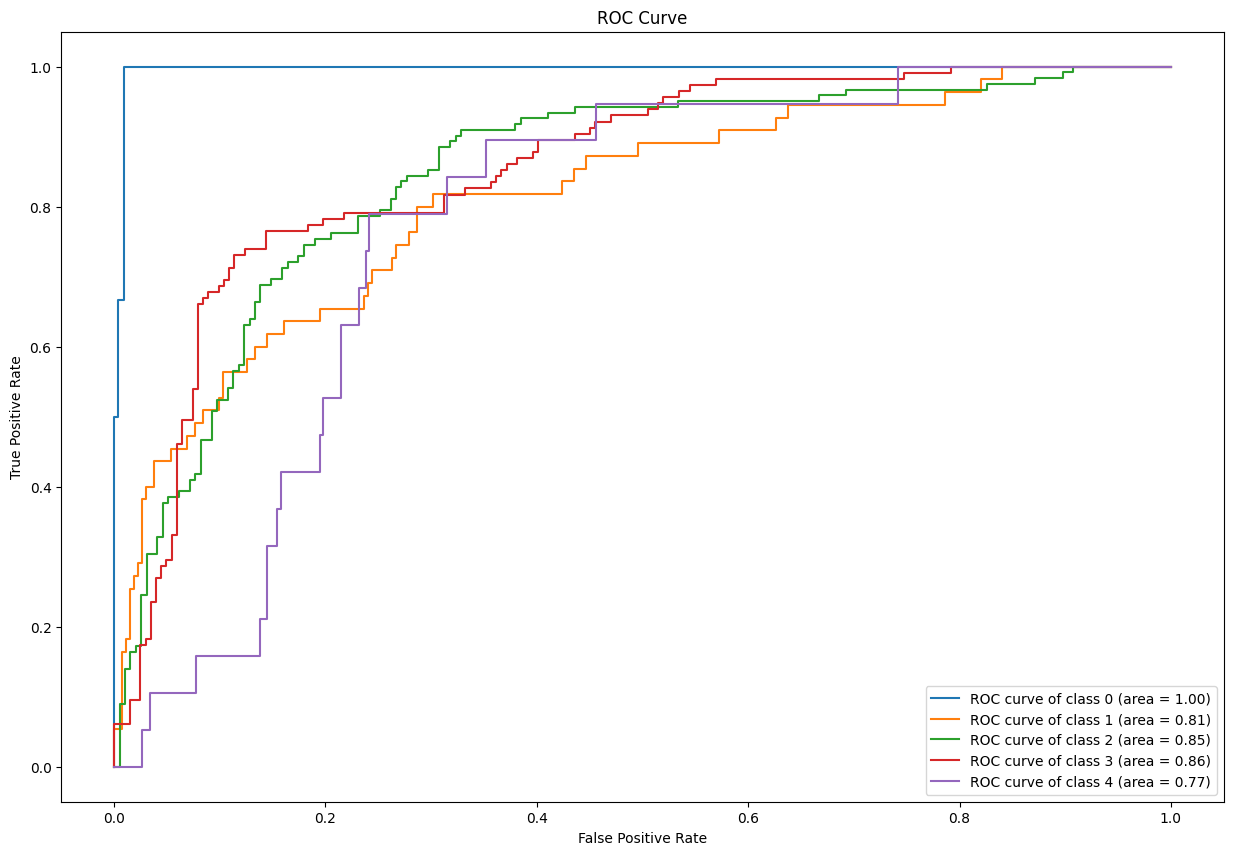

<Figure size 1500x1000 with 0 Axes>

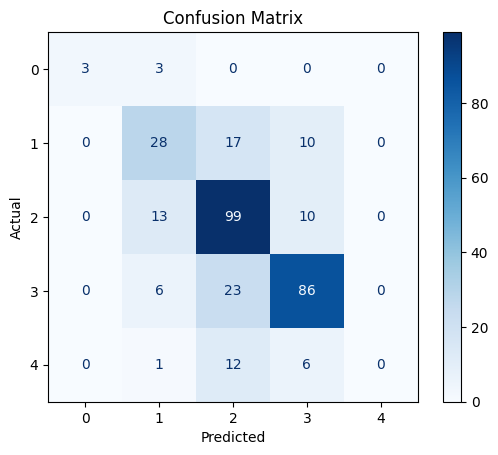

---------Running: Decision Tree using TomekLinks
100%|██████████| 100/100 [00:02<00:00, 43.76trial/s, best loss: -0.6195136217720495]
{'criterion': 1, 'max_depth': 20.0, 'max_features': 0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 10.0, 'splitter': 0}

Testing Results:

Accuracy score:  0.5741324921135647
Precision score:  0.5513902912069752
Recall score:  0.5741324921135647
F1 score:  0.5579332946913031


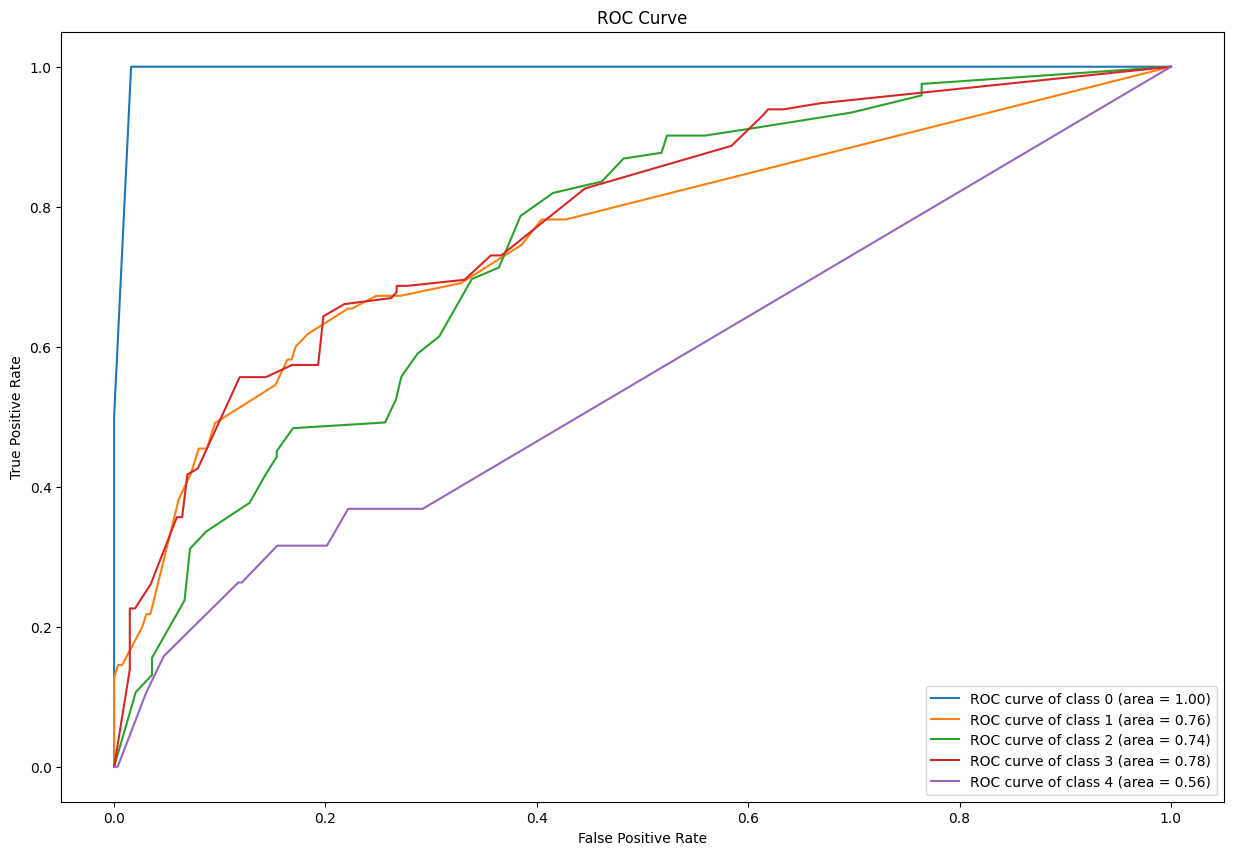

<Figure size 1500x1000 with 0 Axes>

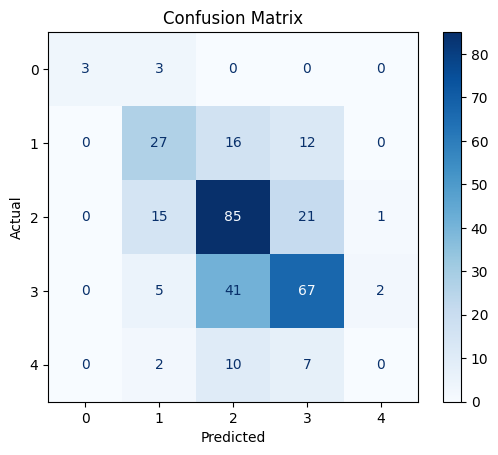

---------Running: K-Nearest Neighbors using TomekLinks
100%|██████████| 100/100 [00:05<00:00, 19.67trial/s, best loss: -0.5922367736247862]
{'algorithm': 2, 'leaf_size': 5, 'metric': 0, 'n_neighbors': 28, 'p': 1, 'weights': 0}

Testing Results:

Accuracy score:  0.6151419558359621
Precision score:  0.5744673587146236
Recall score:  0.6151419558359621
F1 score:  0.5728308860688118


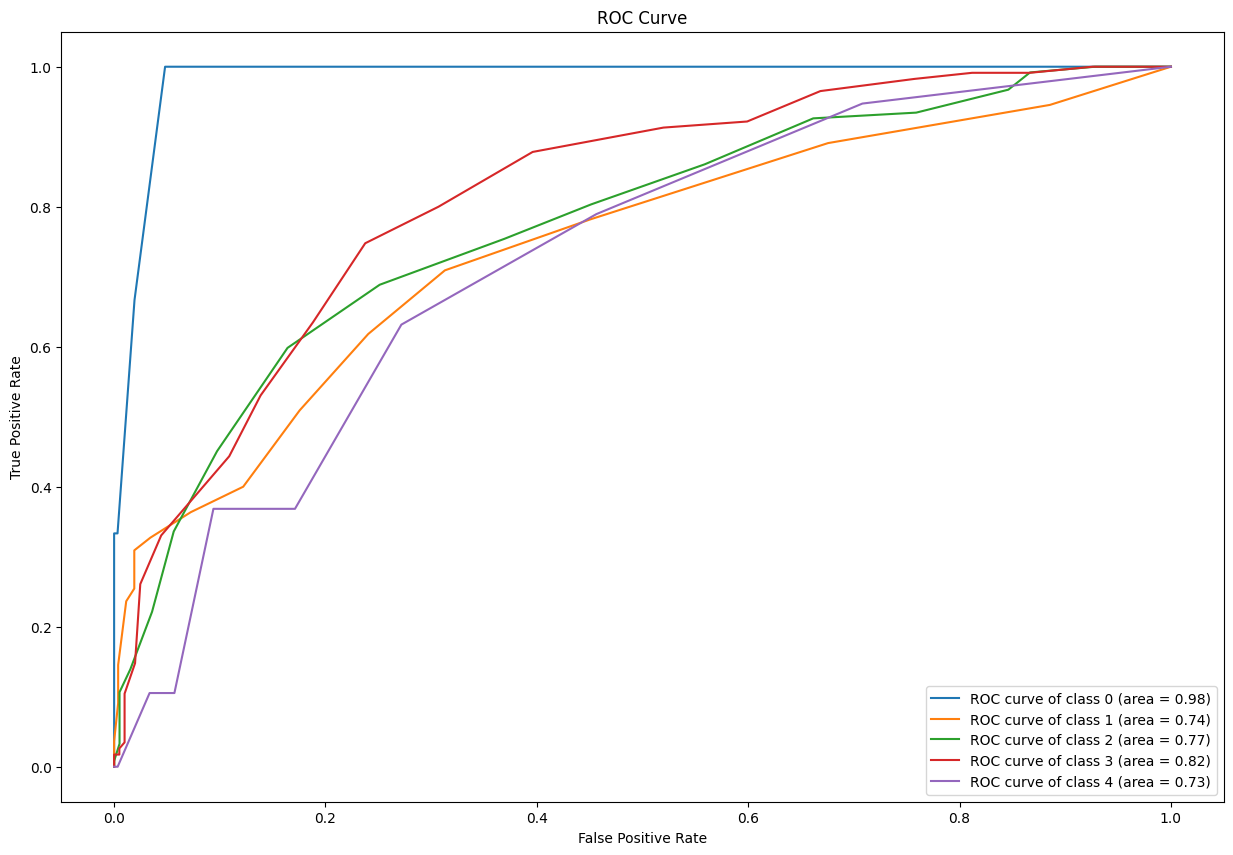

<Figure size 1500x1000 with 0 Axes>

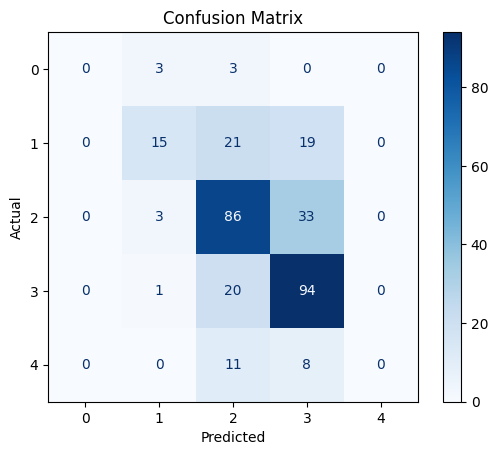

---------Running: Xgboost using TomekLinks
  1%|          | 1/100 [00:00<00:11,  8.73trial/s, best loss: -0.0007031868035276538]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  7%|▋         | 7/100 [00:12<02:43,  1.75s/trial, best loss: -0.665365471142802]    

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 11%|█         | 11/100 [00:13<00:48,  1.82trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 14/100 [00:13<00:30,  2.85trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 17%|█▋        | 17/100 [00:16<00:47,  1.76trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 21%|██        | 21/100 [00:18<00:44,  1.78trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 23%|██▎       | 23/100 [00:18<00:28,  2.67trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 25%|██▌       | 25/100 [00:19<00:22,  3.35trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 26%|██▌       | 26/100 [00:19<00:20,  3.52trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 28/100 [00:19<00:14,  4.91trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 29%|██▉       | 29/100 [00:19<00:15,  4.66trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 30/100 [00:19<00:14,  4.98trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 32%|███▏      | 32/100 [00:20<00:13,  4.98trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 34%|███▍      | 34/100 [00:20<00:13,  4.95trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 36/100 [00:23<00:42,  1.51trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 38/100 [00:23<00:26,  2.37trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 40/100 [00:29<01:24,  1.41s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 43%|████▎     | 43/100 [00:35<01:43,  1.82s/trial, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 46/100 [00:36<00:40,  1.33trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 49%|████▉     | 49/100 [00:37<00:20,  2.52trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 50/100 [00:37<00:16,  3.11trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 53%|█████▎    | 53/100 [00:39<00:22,  2.10trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 56/100 [00:41<00:27,  1.61trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 58/100 [00:41<00:17,  2.46trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 60/100 [00:42<00:15,  2.57trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 62/100 [00:44<00:20,  1.87trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 64/100 [00:44<00:13,  2.74trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 66/100 [00:45<00:09,  3.47trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 68/100 [00:45<00:07,  4.25trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 70/100 [00:45<00:06,  4.74trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 71%|███████   | 71/100 [00:46<00:05,  5.31trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 73%|███████▎  | 73/100 [00:46<00:05,  4.85trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 75%|███████▌  | 75/100 [00:46<00:04,  5.06trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 76/100 [00:47<00:05,  4.53trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 77%|███████▋  | 77/100 [00:47<00:04,  4.85trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 79%|███████▉  | 79/100 [00:48<00:07,  2.67trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 80/100 [00:48<00:06,  3.01trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 81%|████████  | 81/100 [00:49<00:05,  3.21trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 83%|████████▎ | 83/100 [00:49<00:05,  3.39trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 84/100 [00:50<00:08,  1.85trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 86/100 [00:51<00:06,  2.32trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 90/100 [00:54<00:06,  1.55trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 91%|█████████ | 91/100 [00:54<00:04,  1.90trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 94/100 [00:56<00:04,  1.40trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [00:57<00:01,  2.26trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [00:57<00:00,  3.26trial/s, best loss: -0.665365471142802]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [01:06<00:00,  1.50trial/s, best loss: -0.665365471142802]
{'booster': 'gblinear', 'estimators': 67, 'gamma': 0.12, 'grow_policy': 'depthwise', 'learning_rate': 1.1, 'max_depth': 43, 'min_child_weight': 0}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6845425867507886
Precision score:  0.6629413864078438
Recall score:  0.6845425867507886
F1 score:  0.665365471142802


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:31:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


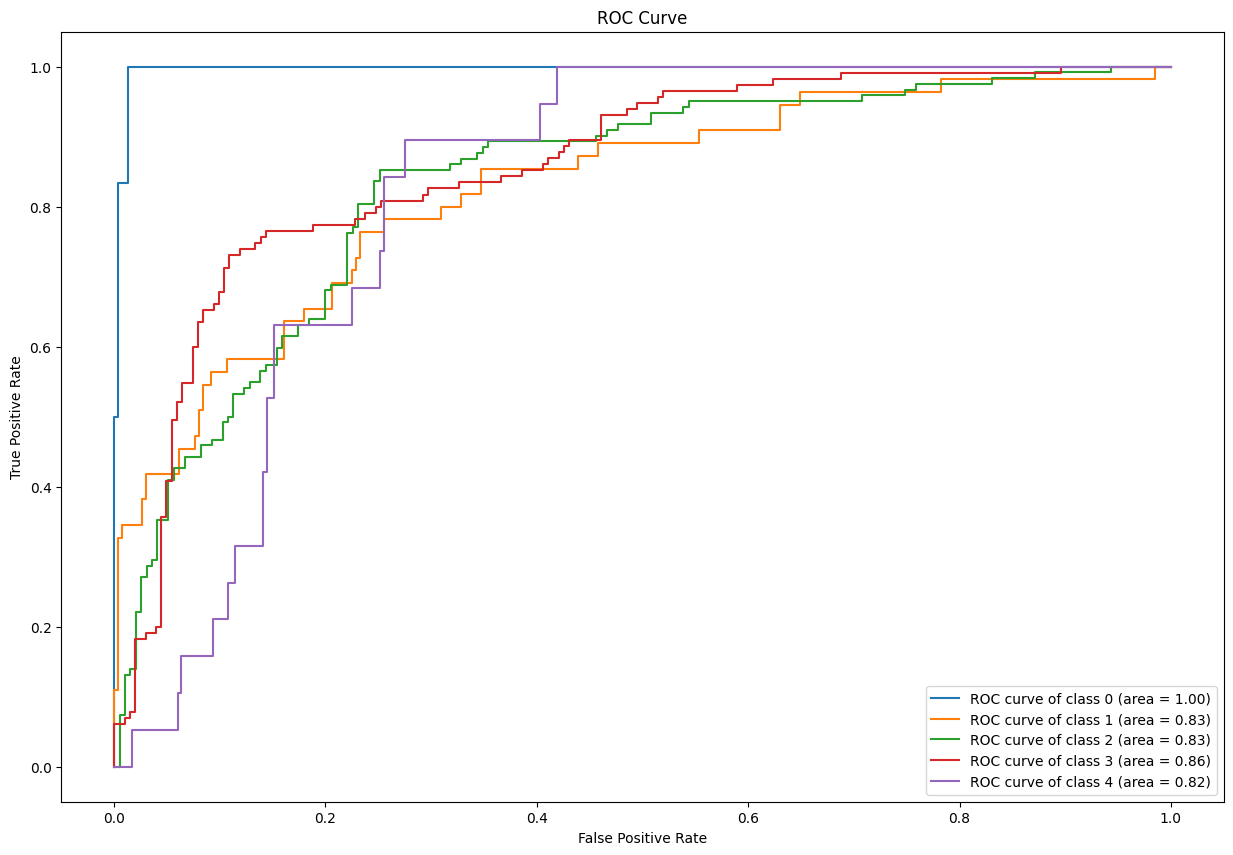

<Figure size 1500x1000 with 0 Axes>

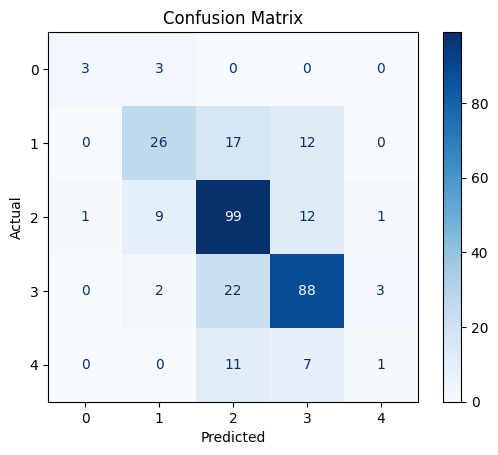

---------Running: AdaBoost using TomekLinks
100%|██████████| 100/100 [00:15<00:00,  6.57trial/s, best loss: -0.6424971641891056]
{'algorithm': 'SAMME', 'estimators': 89, 'learning_rate': 1.2000000000000002}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6719242902208202
Precision score:  0.6323664635358697
Recall score:  0.6719242902208202
F1 score:  0.6424971641891056


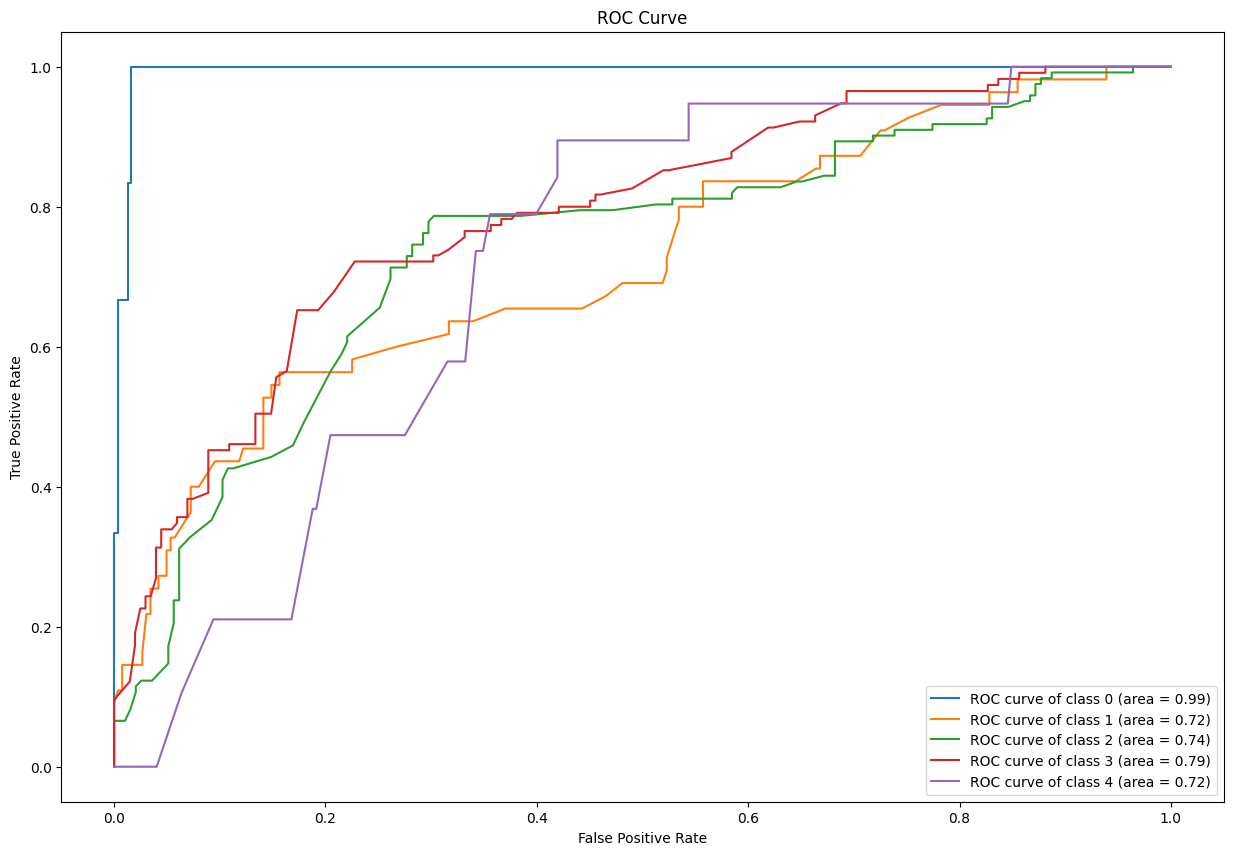

<Figure size 1500x1000 with 0 Axes>

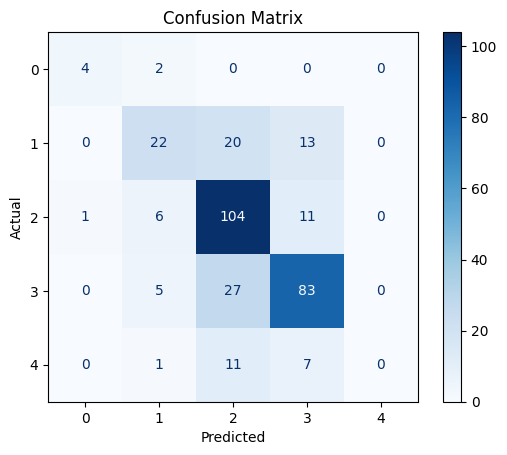

Modelo guardado com sucesso
Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({2: 365, 3: 365, 1: 365, 4: 365, 0: 365})
---------Running: SVM using SMOTE
100%|██████████| 100/100 [00:55<00:00,  1.79trial/s, best loss: -0.6496573695468426]
{'C': 0.8166102870885454}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6340694006309149
Precision score:  0.6753533882871422
Recall score:  0.6340694006309149
F1 score:  0.6496573695468426


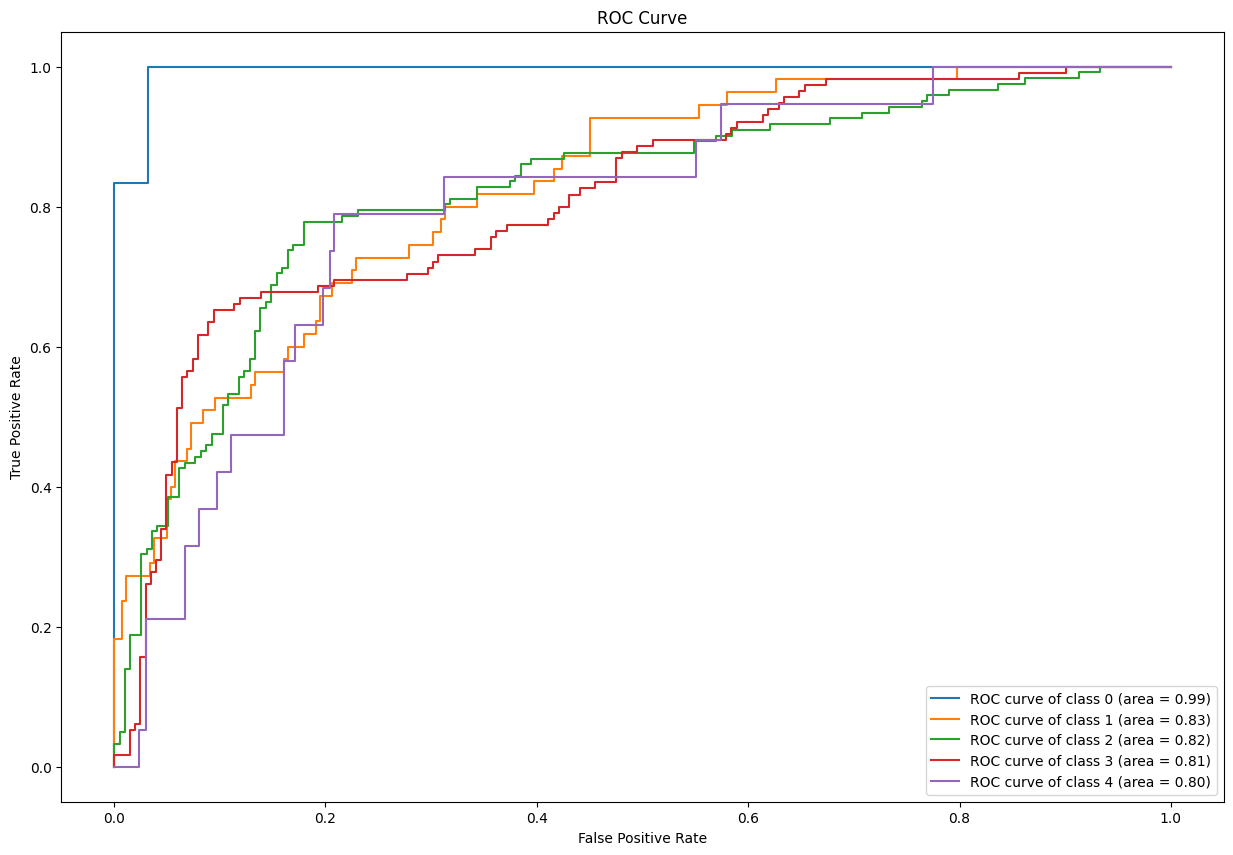

<Figure size 1500x1000 with 0 Axes>

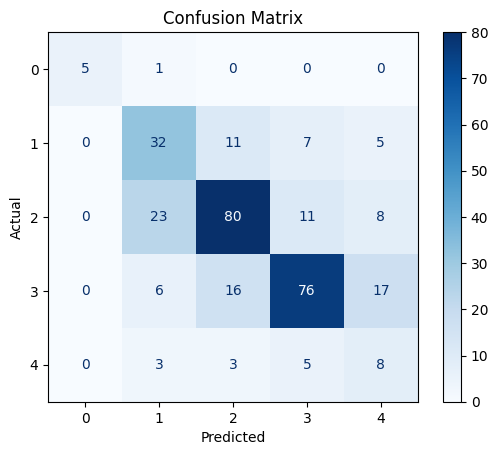

---------Running: Decision Tree using SMOTE
100%|██████████| 100/100 [00:02<00:00, 43.78trial/s, best loss: -0.5213795277387844] 
{'criterion': 0, 'max_depth': 17.0, 'max_features': 1, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2.0, 'min_samples_split': 2.0, 'splitter': 0}

Testing Results:

Accuracy score:  0.5047318611987381
Precision score:  0.6074619411213481
Recall score:  0.5047318611987381
F1 score:  0.5325628051985322


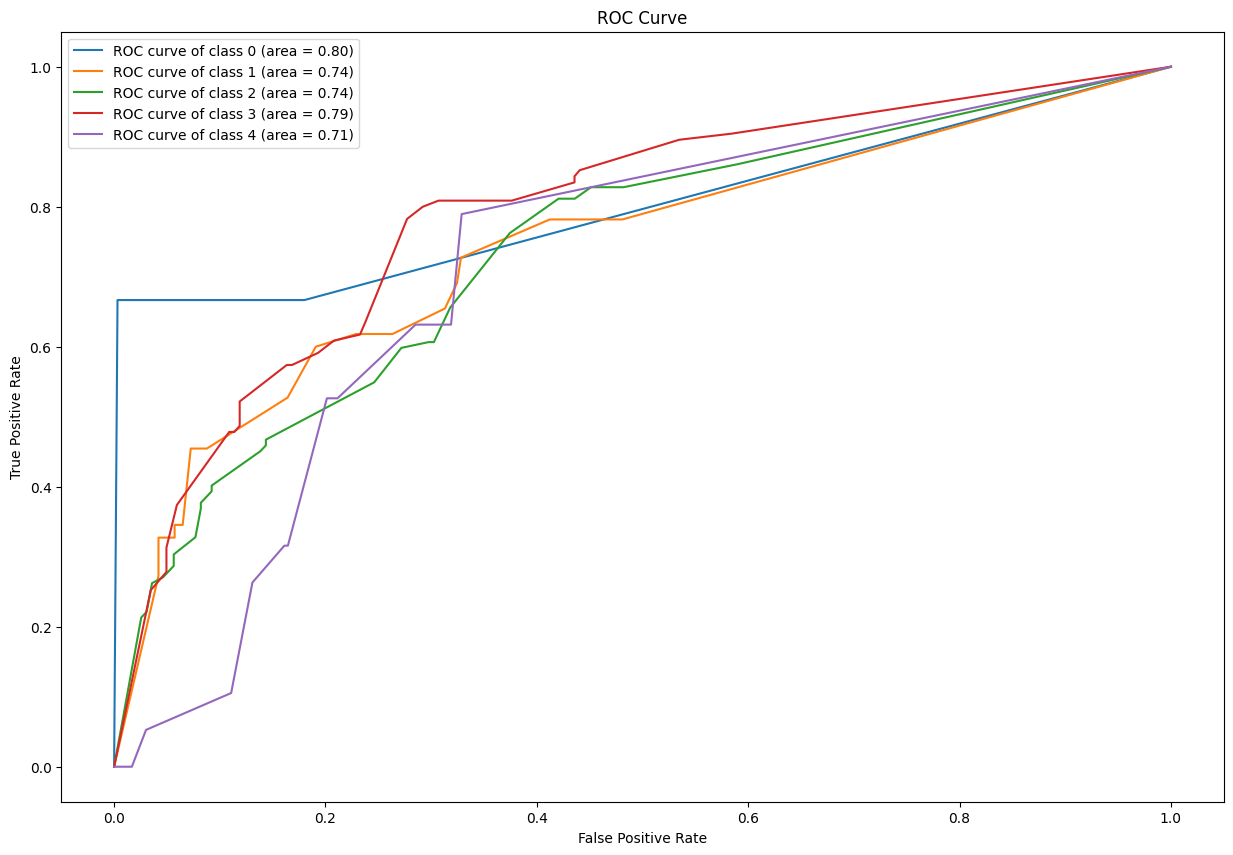

<Figure size 1500x1000 with 0 Axes>

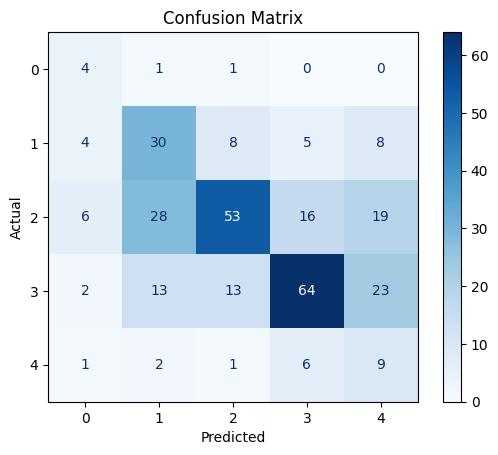

---------Running: K-Nearest Neighbors using SMOTE
100%|██████████| 100/100 [00:06<00:00, 14.95trial/s, best loss: -0.5433559342865337]
{'algorithm': 1, 'leaf_size': 48, 'metric': 1, 'n_neighbors': 6, 'p': 0, 'weights': 1}

Testing Results:

Accuracy score:  0.49842271293375395
Precision score:  0.571751288700166
Recall score:  0.49842271293375395
F1 score:  0.5219752527178108


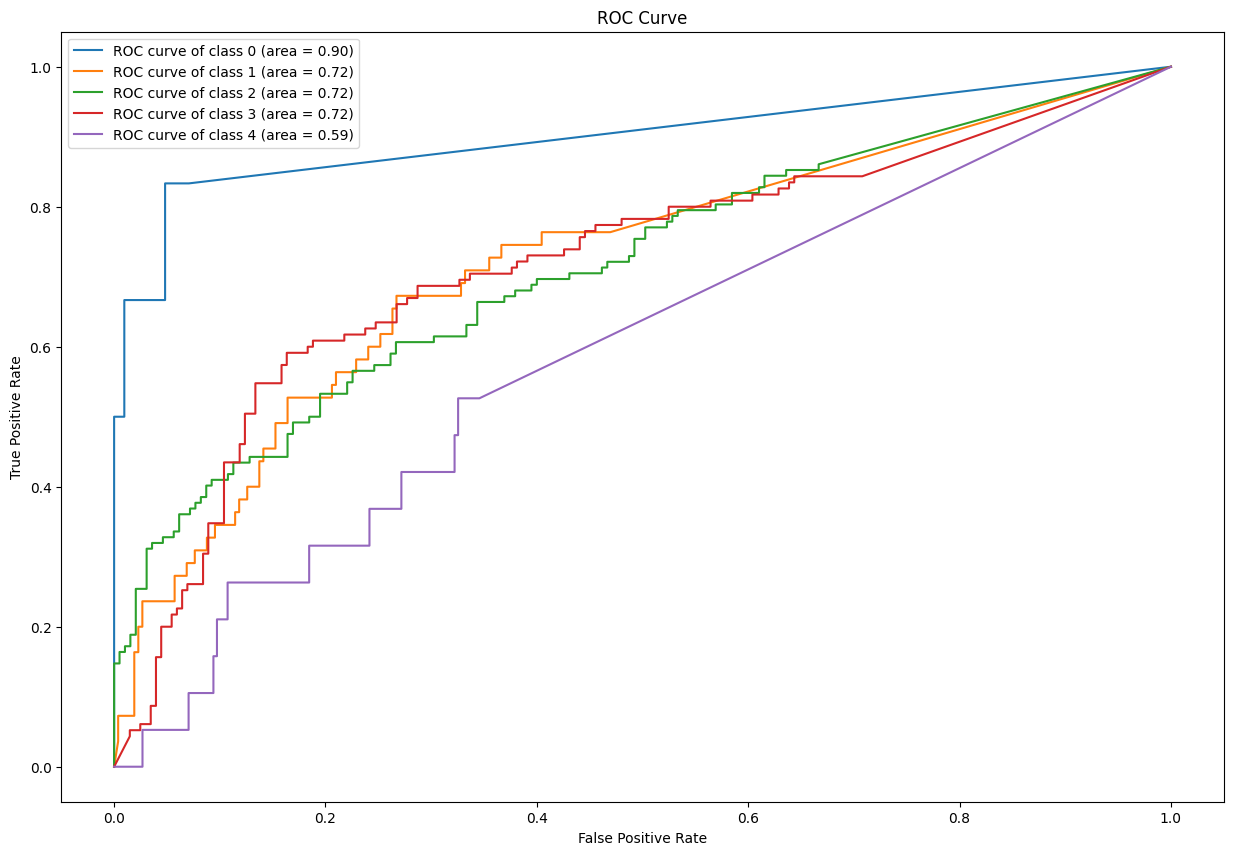

<Figure size 1500x1000 with 0 Axes>

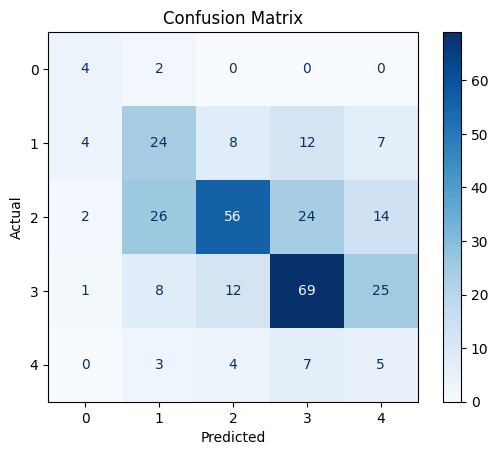

---------Running: Xgboost using SMOTE
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  3%|▎         | 3/100 [00:00<00:19,  5.05trial/s, best loss: -0.177980674449792]    

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  7%|▋         | 7/100 [00:08<02:38,  1.71s/trial, best loss: -0.6147255034111123]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 8/100 [00:08<01:53,  1.23s/trial, best loss: -0.6147255034111123]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 10%|█         | 10/100 [00:08<01:00,  1.48trial/s, best loss: -0.6415350899796562]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 13%|█▎        | 13/100 [00:21<04:01,  2.78s/trial, best loss: -0.6415350899796562]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 20/100 [00:31<01:47,  1.34s/trial, best loss: -0.6415350899796562]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCa

 21%|██        | 21/100 [00:32<01:20,  1.02s/trial, best loss: -0.6415350899796562]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 23%|██▎       | 23/100 [00:32<00:50,  1.51trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 24%|██▍       | 24/100 [00:33<00:42,  1.80trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 26%|██▌       | 26/100 [00:33<00:31,  2.35trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 27%|██▋       | 27/100 [00:34<00:27,  2.61trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 28/100 [00:34<00:26,  2.76trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 29%|██▉       | 29/100 [00:34<00:24,  2.94trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 30/100 [00:34<00:23,  2.94trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 31%|███       | 31/100 [00:35<00:23,  2.97trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 33%|███▎      | 33/100 [00:35<00:19,  3.52trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 35%|███▌      | 35/100 [00:43<01:52,  1.73s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 37%|███▋      | 37/100 [00:44<01:11,  1.13s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 39%|███▉      | 39/100 [00:45<00:47,  1.28trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 41%|████      | 41/100 [00:46<00:30,  1.91trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 44%|████▍     | 44/100 [00:50<01:00,  1.08s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 48/100 [01:00<01:34,  1.82s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 49%|████▉     | 49/100 [01:01<01:09,  1.36s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 52/100 [01:01<00:32,  1.48trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 54/100 [01:02<00:19,  2.35trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 56/100 [01:05<00:38,  1.15trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 58/100 [01:05<00:24,  1.74trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 60/100 [01:06<00:16,  2.50trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 63%|██████▎   | 63/100 [01:21<01:31,  2.47s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 64/100 [01:22<01:05,  1.81s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 65%|██████▌   | 65/100 [01:22<00:46,  1.33s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 66/100 [01:22<00:34,  1.01s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 67%|██████▋   | 67/100 [01:23<00:31,  1.03trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 68/100 [01:23<00:26,  1.21trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 69%|██████▉   | 69/100 [01:24<00:25,  1.20trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 70/100 [01:26<00:31,  1.06s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 71%|███████   | 71/100 [01:29<00:49,  1.71s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 73%|███████▎  | 73/100 [01:30<00:28,  1.05s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 75%|███████▌  | 75/100 [01:34<00:42,  1.70s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 78%|███████▊  | 78/100 [01:36<00:19,  1.16trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 79%|███████▉  | 79/100 [01:36<00:14,  1.46trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 80/100 [01:36<00:11,  1.77trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 81%|████████  | 81/100 [01:37<00:09,  2.04trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 84/100 [01:56<00:50,  3.14s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 85%|████████▌ | 85/100 [01:57<00:34,  2.30s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 88/100 [02:01<00:21,  1.79s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 89%|████████▉ | 89/100 [02:02<00:14,  1.33s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 90/100 [02:02<00:10,  1.03s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 93%|█████████▎| 93/100 [02:13<00:18,  2.61s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 94/100 [02:13<00:11,  1.94s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [02:14<00:04,  1.09s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 97%|█████████▋| 97/100 [02:14<00:02,  1.24trial/s, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [02:20<00:05,  2.53s/trial, best loss: -0.6473171431943879]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [02:21<00:00,  1.42s/trial, best loss: -0.6473171431943879]
{'booster': 'gblinear', 'estimators': 89, 'gamma': 0.25, 'grow_policy': 'lossguide', 'learning_rate': 1.4000000000000001, 'max_depth': 97, 'min_child_weight': 8}


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6309148264984227
Precision score:  0.6738168519707634
Recall score:  0.6309148264984227
F1 score:  0.6473171431943879


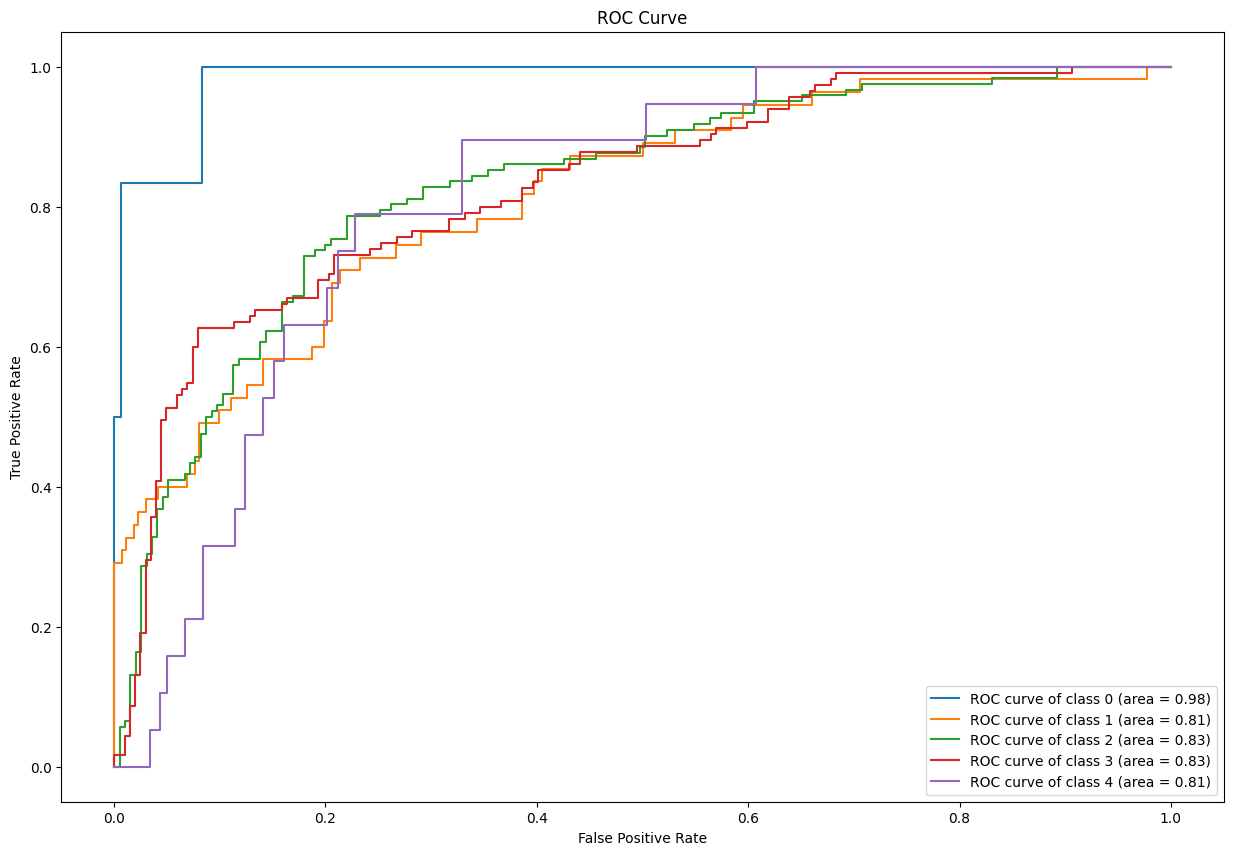

<Figure size 1500x1000 with 0 Axes>

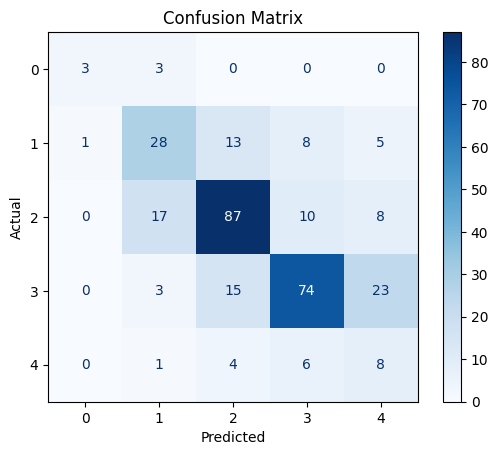

---------Running: AdaBoost using SMOTE
100%|██████████| 100/100 [00:22<00:00,  4.53trial/s, best loss: -0.5397111781283288]
{'algorithm': 'SAMME', 'estimators': 86, 'learning_rate': 1.2000000000000002}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.5236593059936908
Precision score:  0.5882996778895832
Recall score:  0.5236593059936908
F1 score:  0.5447194356279463


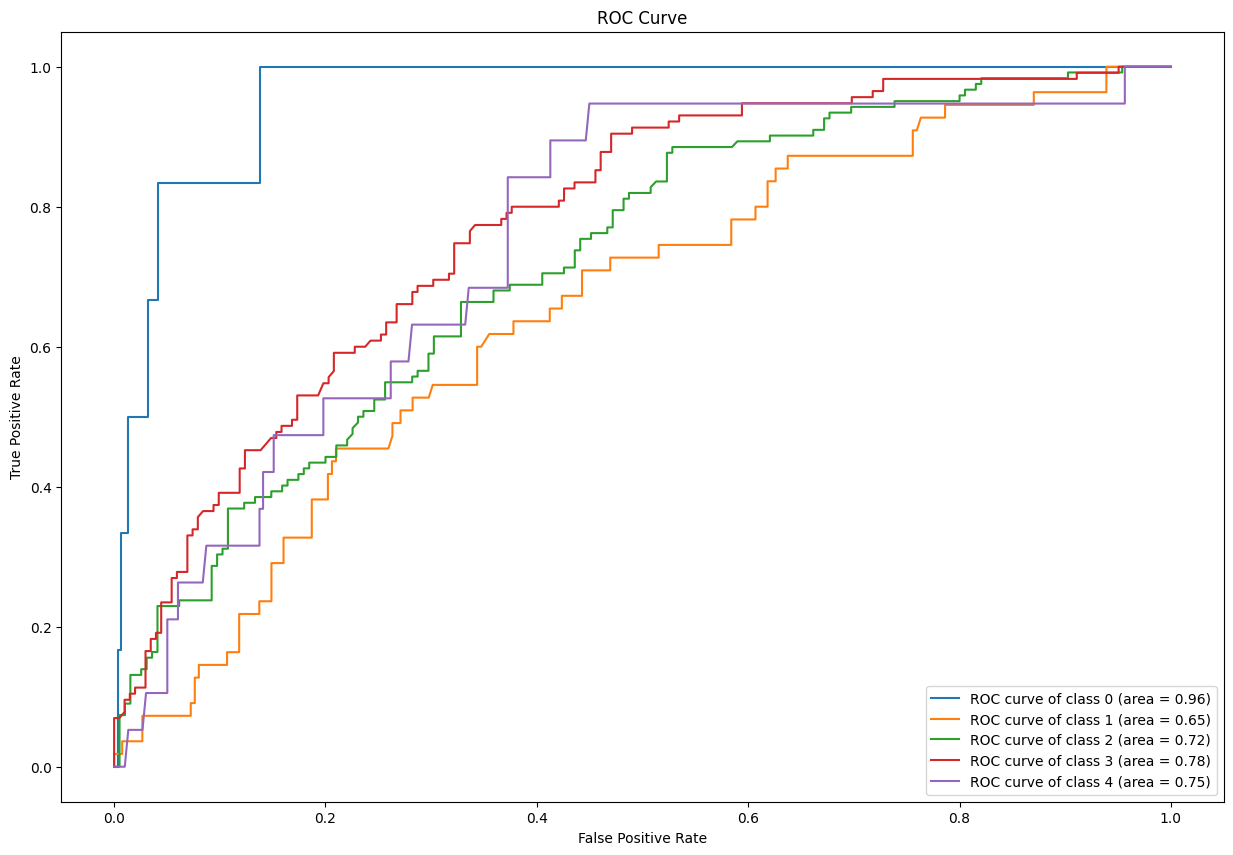

<Figure size 1500x1000 with 0 Axes>

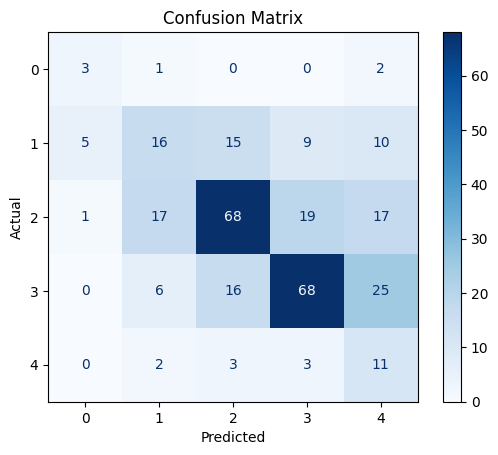

Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({4: 365, 0: 365, 1: 359, 3: 331, 2: 325})
---------Running: SVM using SMOTETomek
100%|██████████| 100/100 [00:55<00:00,  1.82trial/s, best loss: -0.6475726345783773]
{'C': 0.7665223021954761}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6309148264984227
Precision score:  0.6780325513164185
Recall score:  0.6309148264984227
F1 score:  0.6475726345783773


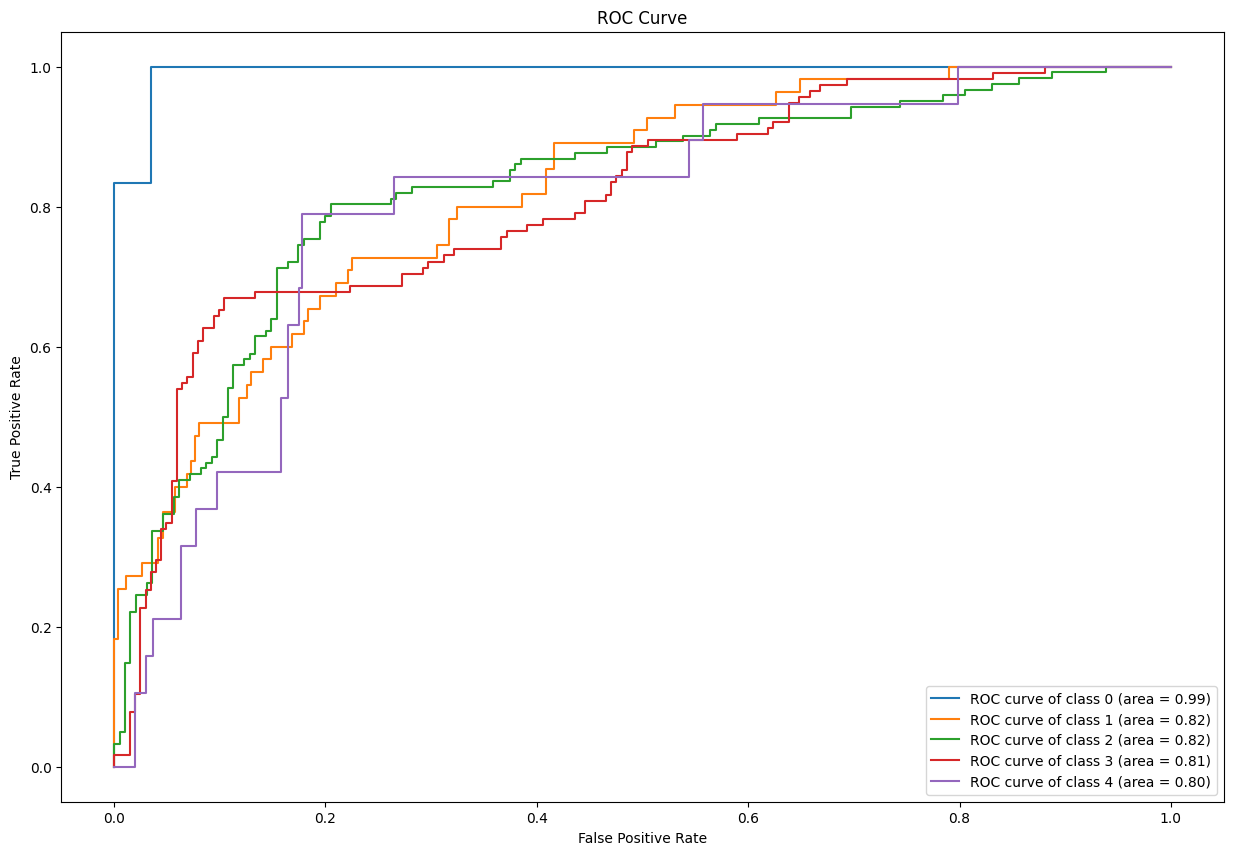

<Figure size 1500x1000 with 0 Axes>

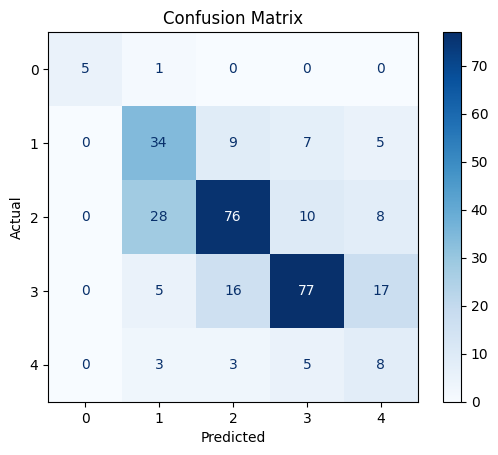

---------Running: Decision Tree using SMOTETomek
100%|██████████| 100/100 [00:03<00:00, 28.93trial/s, best loss: -0.5430589386919134] 
{'criterion': 1, 'max_depth': 13.0, 'max_features': 0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 7.0, 'splitter': 1}

Testing Results:

Accuracy score:  0.38485804416403785
Precision score:  0.5008581316577225
Recall score:  0.38485804416403785
F1 score:  0.4097433353584773


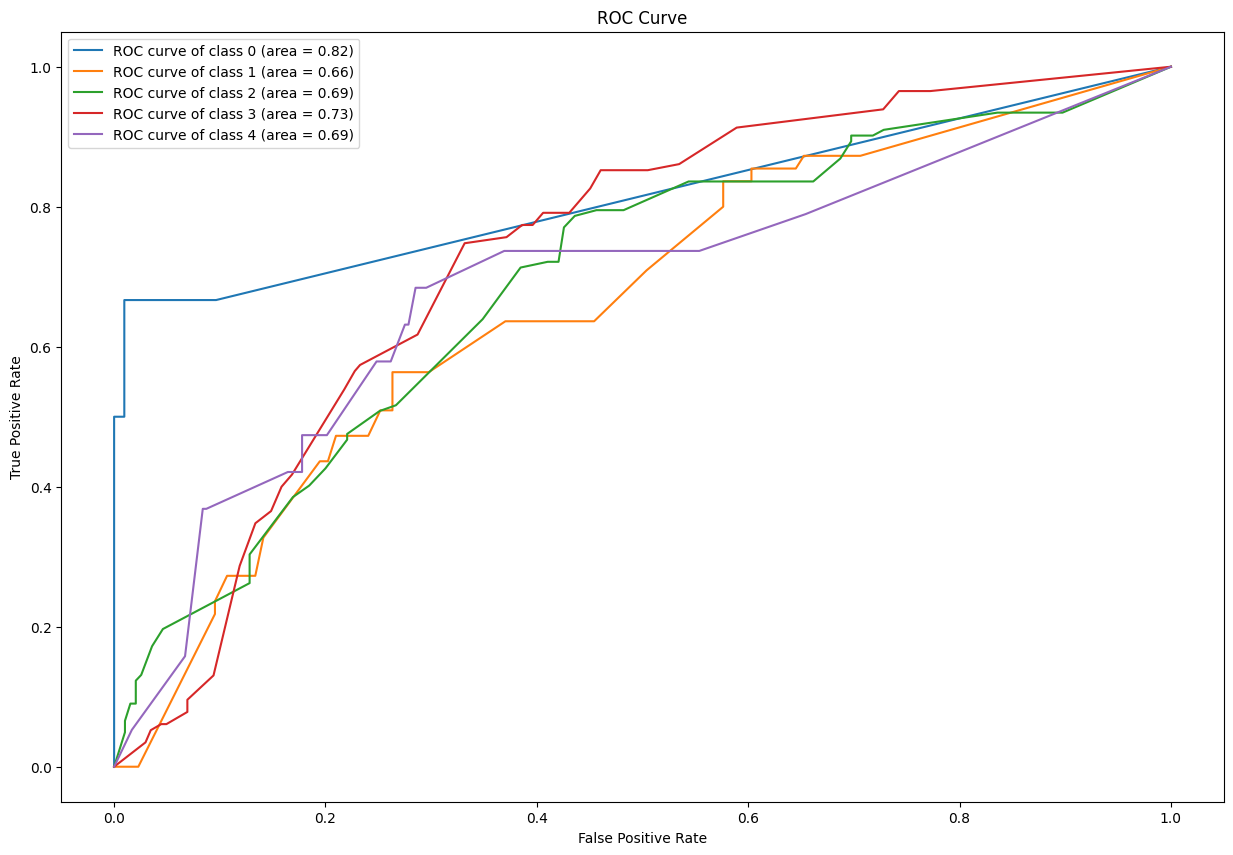

<Figure size 1500x1000 with 0 Axes>

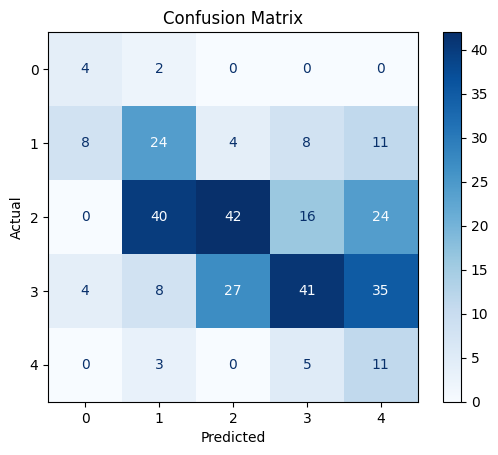

---------Running: K-Nearest Neighbors using SMOTETomek
100%|██████████| 100/100 [00:06<00:00, 15.11trial/s, best loss: -0.5454963821935295]
{'algorithm': 1, 'leaf_size': 29, 'metric': 1, 'n_neighbors': 8, 'p': 0, 'weights': 1}

Testing Results:

Accuracy score:  0.5047318611987381
Precision score:  0.5959969590929588
Recall score:  0.5047318611987381
F1 score:  0.532290604757252


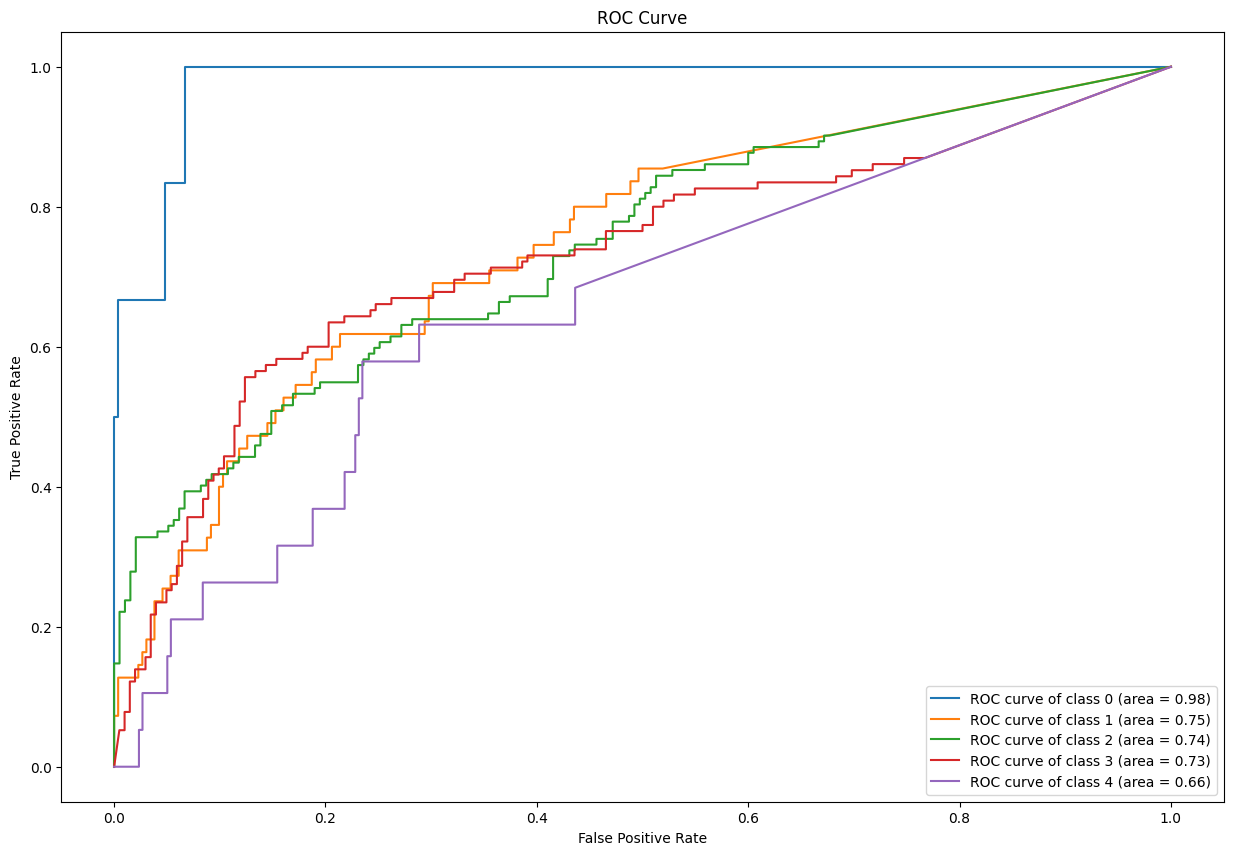

<Figure size 1500x1000 with 0 Axes>

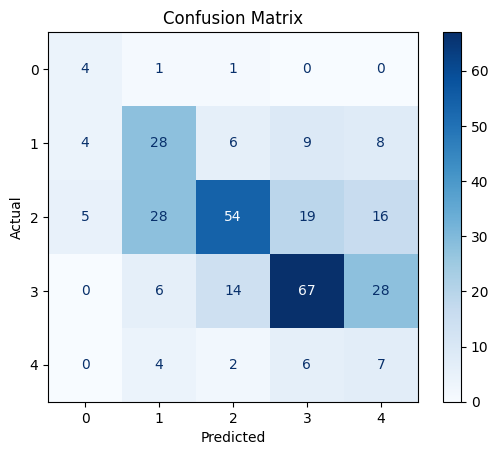

---------Running: Logistic Regression using SMOTETomek
  6%|▌         | 6/100 [00:00<00:16,  5.80trial/s, best loss: -0.6444935885106107]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  8%|▊         | 8/100 [00:01<00:19,  4.74trial/s, best loss: -0.6510298016020153]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 32%|███▏      | 32/100 [00:06<00:13,  4.95trial/s, best loss: -0.6510298016020153]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 44%|████▍     | 44/100 [00:10<00:26,  2.10trial/s, best loss: -0.6535057681163894]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 100/100 [00:20<00:00,  4.90trial/s, best loss: -0.6535057681163894]
{'C': 1.5, 'max_iter': 919, 'penalty': 0, 'solver': 3, 'tolerance': 0.0, 'weights': 0}
{'C': 1.5, 'max_iter': 919, 'penalty': 0, 'solver': 'sag', 'tolerance': 0.0, 'weights': 'balanced'}


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Testing Results:

Accuracy score:  0.637223974763407
Precision score:  0.6810151062366223
Recall score:  0.637223974763407
F1 score:  0.6535057681163894


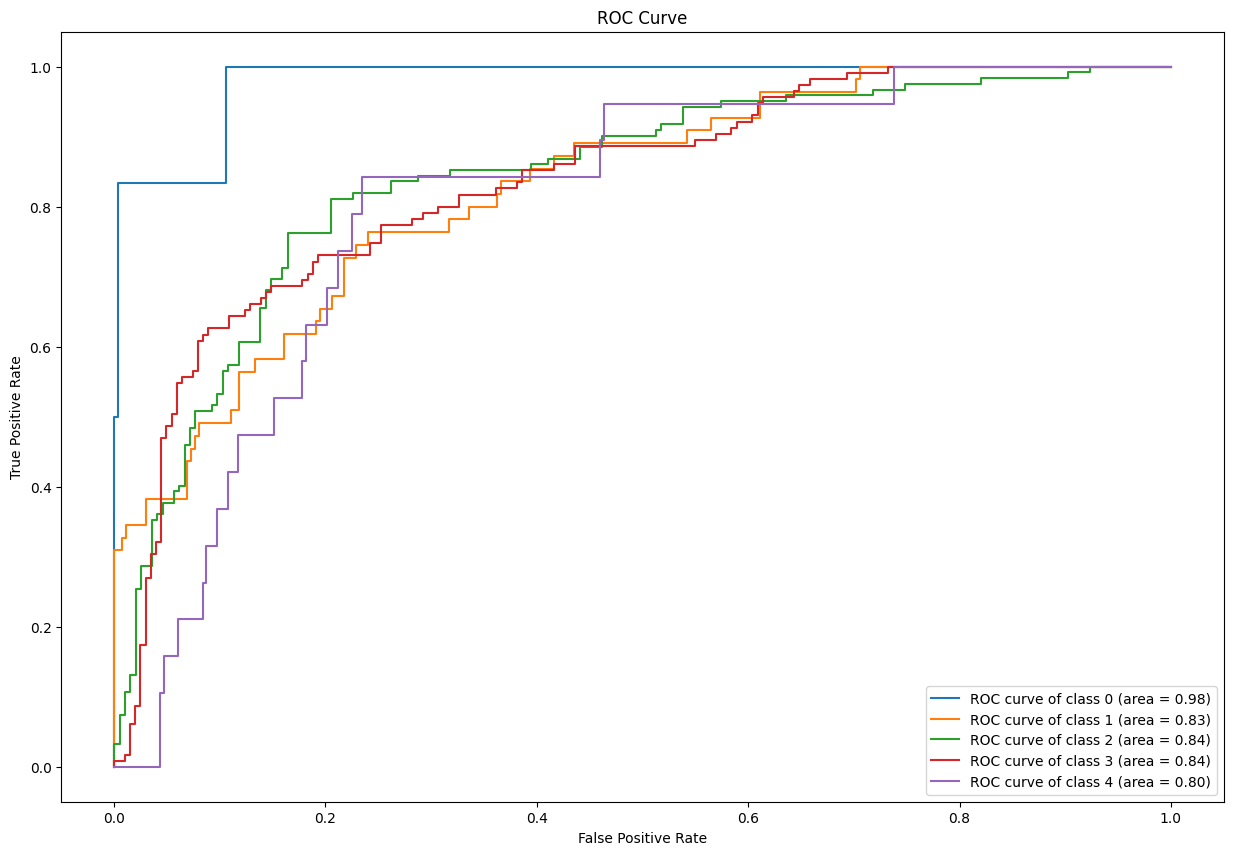

<Figure size 1500x1000 with 0 Axes>

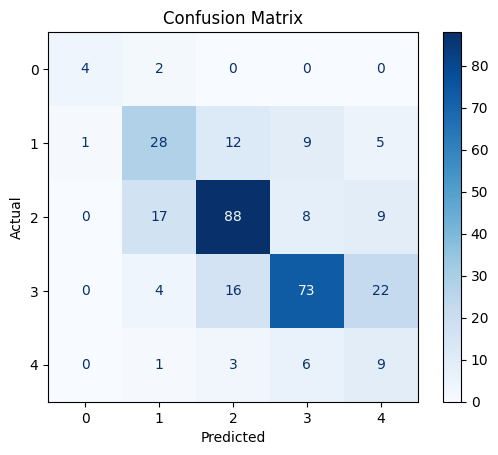

Modelo guardado com sucesso
---------Running: RandomForest using SMOTETomek
 10%|█         | 10/100 [00:02<00:20,  4.29trial/s, best loss: -0.63984371569962] 

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 16%|█▌        | 16/100 [00:04<00:15,  5.25trial/s, best loss: -0.63984371569962]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 17%|█▋        | 17/100 [00:04<00:18,  4.40trial/s, best loss: -0.63984371569962]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 24%|██▍       | 24/100 [00:06<00:22,  3.32trial/s, best loss: -0.63984371569962]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 58%|█████▊    | 58/100 [00:14<00:07,  5.39trial/s, best loss: -0.6410959111050005]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 60%|██████    | 60/100 [00:14<00:05,  6.85trial/s, best loss: -0.6410959111050005]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:22<00:00,  4.45trial/s, best loss: -0.6413841864181324]
{'estimators': 18, 'max_features': 'log2', 'min_sample_leaf': 1, 'n_jobs': 2, 'oob_score': False, 'random_state': 7}

Testing Results:

Accuracy score:  0.583596214511041
Precision score:  0.6071927235013305
Recall score:  0.583596214511041
F1 score:  0.5933140011830613


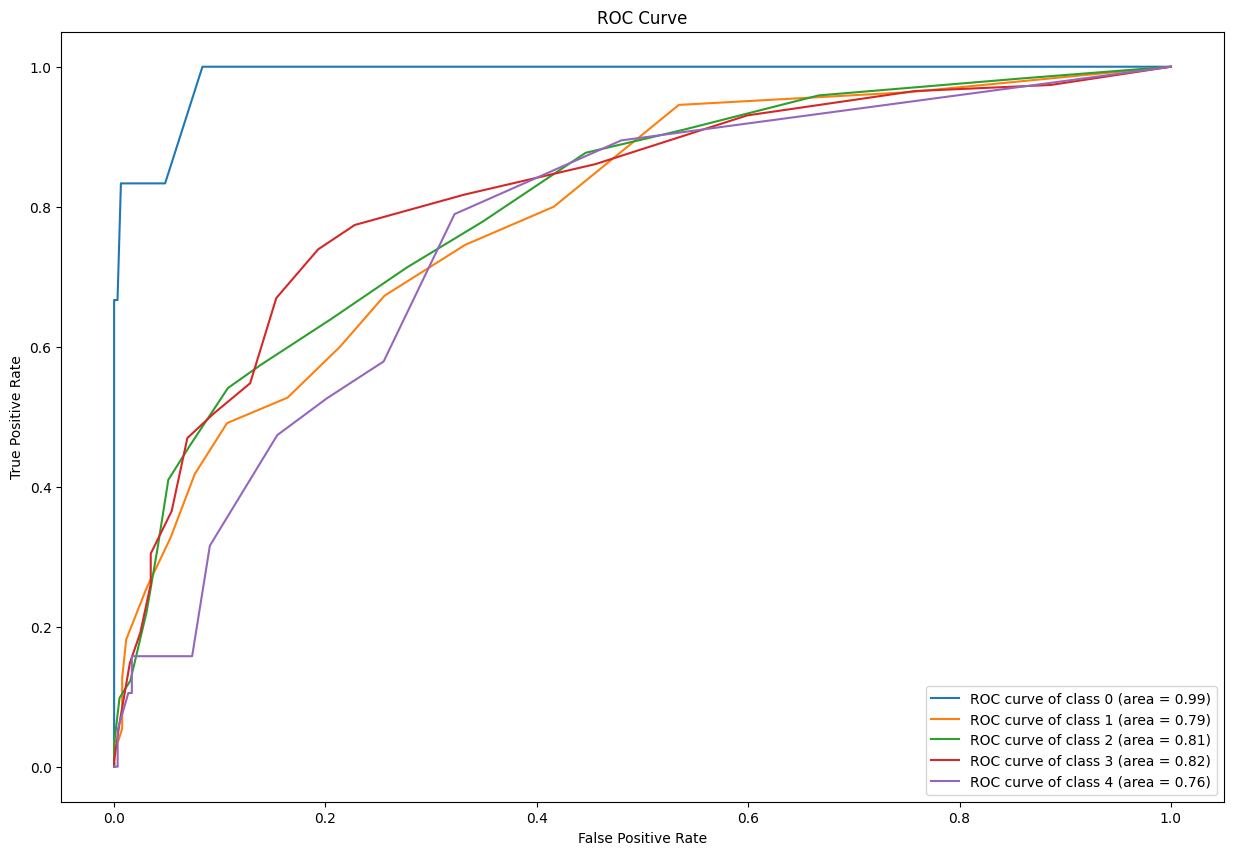

<Figure size 1500x1000 with 0 Axes>

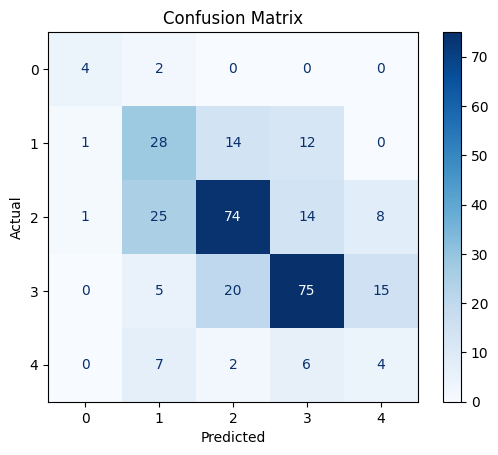

Modelo guardado com sucesso
---------Running: Xgboost using SMOTETomek
  1%|          | 1/100 [00:01<01:47,  1.09s/trial, best loss: -0.05301883383079378]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  3%|▎         | 3/100 [00:02<01:07,  1.43trial/s, best loss: -0.3440464626256247] 

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  7%|▋         | 7/100 [00:10<02:52,  1.85s/trial, best loss: -0.6324850136093906]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 8/100 [00:10<02:08,  1.39s/trial, best loss: -0.6324850136093906]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 11%|█         | 11/100 [00:16<02:23,  1.61s/trial, best loss: -0.6324850136093906]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 15%|█▌        | 15/100 [00:30<04:42,  3.33s/trial, best loss: -0.6324850136093906]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 16/100 [00:30<03:19,  2.38s/trial, best loss: -0.6324850136093906]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 19%|█▉        | 19/100 [00:51<06:58,  5.17s/trial, best loss: -0.6324850136093906]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:38:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 46/100 [01:44<01:24,  1.56s/trial, best loss: -0.6324850136093906]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 47%|████▋     | 47/100 [01:45<01:05,  1.23s/trial, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 48/100 [01:45<00:50,  1.04trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 50/100 [01:45<00:30,  1.63trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 51%|█████     | 51/100 [01:46<00:24,  1.98trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 53%|█████▎    | 53/100 [01:46<00:18,  2.52trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 55%|█████▌    | 55/100 [01:47<00:15,  2.88trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 56/100 [01:47<00:14,  3.06trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 57%|█████▋    | 57/100 [01:48<00:16,  2.67trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 59%|█████▉    | 59/100 [01:48<00:12,  3.21trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 60/100 [01:48<00:11,  3.45trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 62/100 [01:49<00:10,  3.78trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 64/100 [01:49<00:08,  4.38trial/s, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:39:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 65%|██████▌   | 65/100 [02:08<03:20,  5.74s/trial, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 66/100 [02:09<02:22,  4.20s/trial, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 67%|██████▋   | 67/100 [02:09<01:40,  3.05s/trial, best loss: -0.6403511299739615]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 68/100 [02:09<01:11,  2.24s/trial, best loss: -0.6409029018426503]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 69%|██████▉   | 69/100 [02:10<00:51,  1.67s/trial, best loss: -0.6409029018426503]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 71%|███████   | 71/100 [02:10<00:28,  1.02trial/s, best loss: -0.6409029018426503]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 74/100 [02:11<00:13,  1.99trial/s, best loss: -0.6409029018426503]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 75%|███████▌  | 75/100 [02:22<01:30,  3.63s/trial, best loss: -0.6409029018426503]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 77%|███████▋  | 77/100 [02:23<00:45,  1.98s/trial, best loss: -0.6409029018426503]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 80/100 [02:27<00:30,  1.51s/trial, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 81%|████████  | 81/100 [02:28<00:24,  1.29s/trial, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 84/100 [02:33<00:24,  1.50s/trial, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 85%|████████▌ | 85/100 [02:33<00:16,  1.13s/trial, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 86/100 [02:33<00:12,  1.14trial/s, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 88/100 [02:34<00:07,  1.68trial/s, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 90/100 [02:37<00:09,  1.00trial/s, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 92%|█████████▏| 92/100 [02:38<00:05,  1.48trial/s, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 94/100 [02:39<00:02,  2.12trial/s, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 95%|█████████▌| 95/100 [02:39<00:02,  2.38trial/s, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [02:40<00:01,  2.09trial/s, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [02:54<00:08,  4.44s/trial, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [02:54<00:00,  1.75s/trial, best loss: -0.6435109980508713]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



{'booster': 'gblinear', 'estimators': 24, 'gamma': 0.45, 'grow_policy': 'depthwise', 'learning_rate': 1.7000000000000002, 'max_depth': 32, 'min_child_weight': 3}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6182965299684543
Precision score:  0.6730217248023989
Recall score:  0.6182965299684543
F1 score:  0.6378432880376315


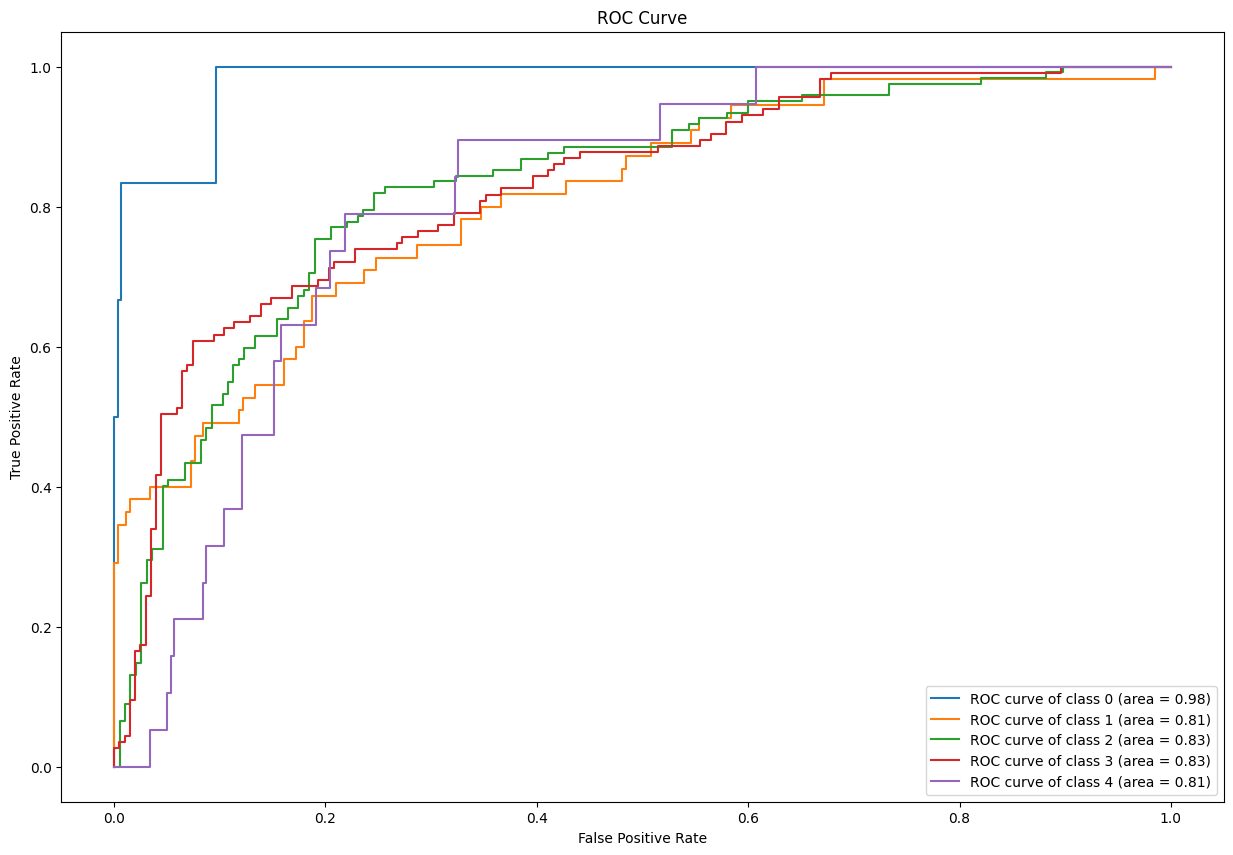

<Figure size 1500x1000 with 0 Axes>

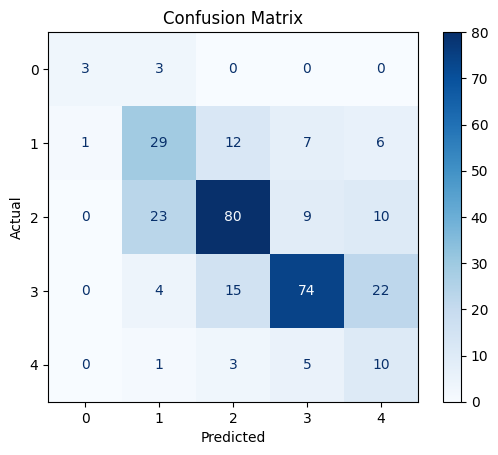

---------Running: AdaBoost using SMOTETomek
100%|██████████| 100/100 [00:26<00:00,  3.71trial/s, best loss: -0.510085851380564] 
{'algorithm': 'SAMME', 'estimators': 49, 'learning_rate': 1.1}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.47634069400630913
Precision score:  0.583510418169587
Recall score:  0.47634069400630913
F1 score:  0.5038647664652038


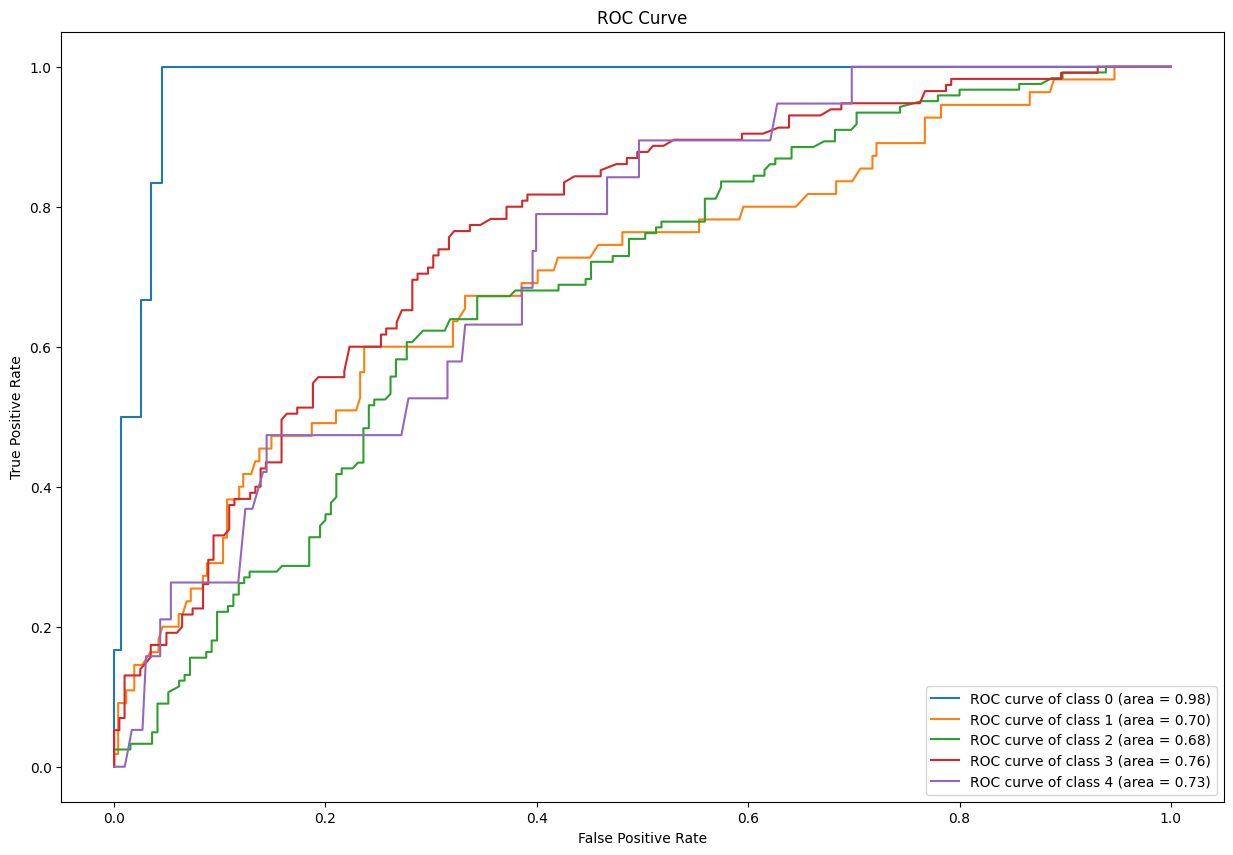

<Figure size 1500x1000 with 0 Axes>

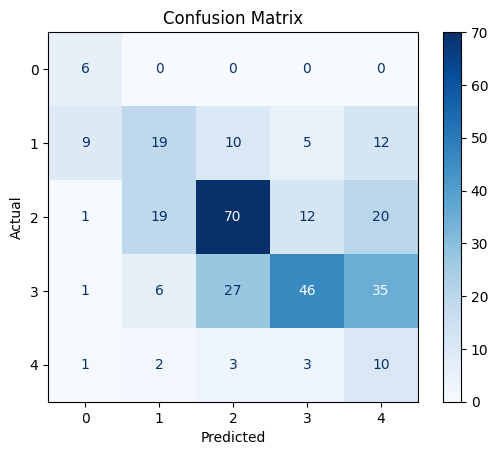

Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({2: 365, 3: 365, 1: 365, 4: 365, 0: 365})
---------Running: SVM using RandomOverSample
100%|██████████| 100/100 [01:11<00:00,  1.39trial/s, best loss: -0.5820184934816522]
{'C': 0.3461846682286627}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.5457413249211357
Precision score:  0.7025701615824556
Recall score:  0.5457413249211357
F1 score:  0.5820184934816522


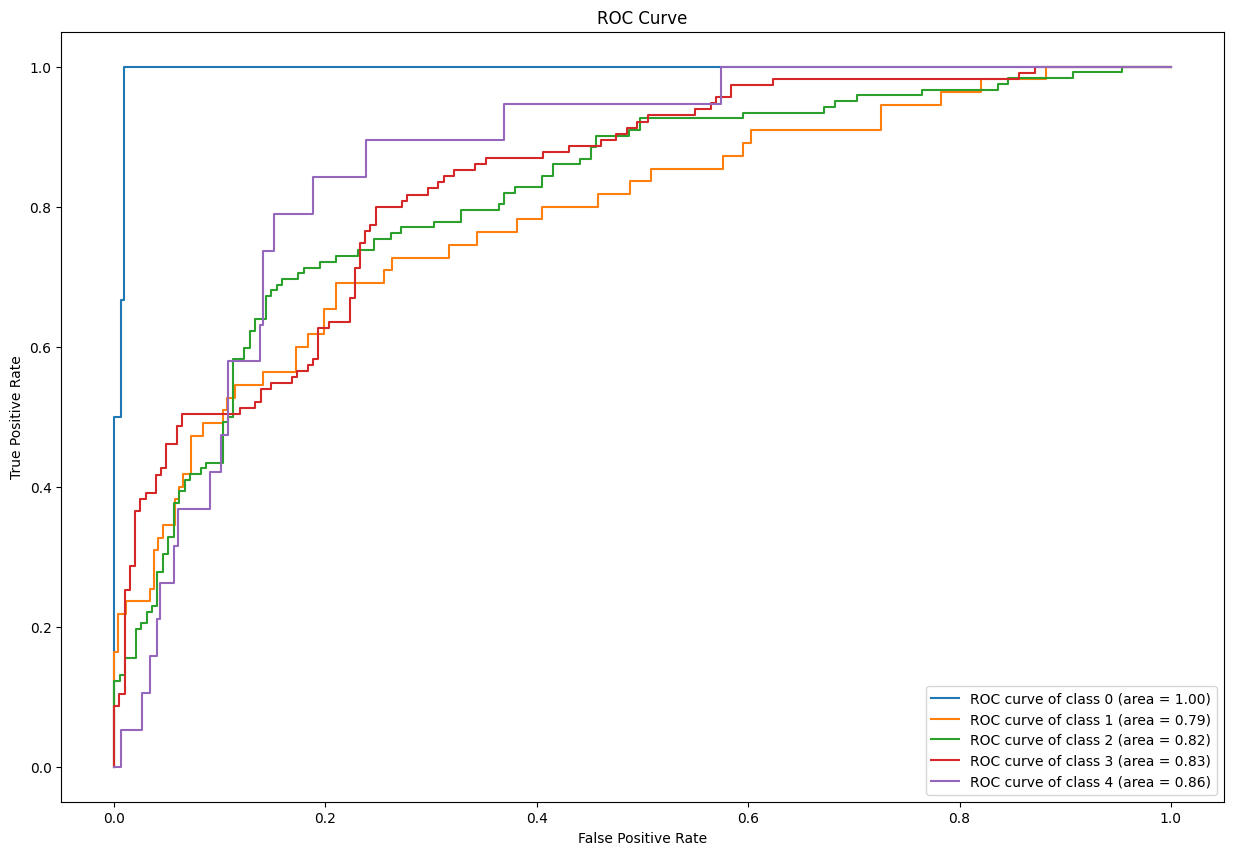

<Figure size 1500x1000 with 0 Axes>

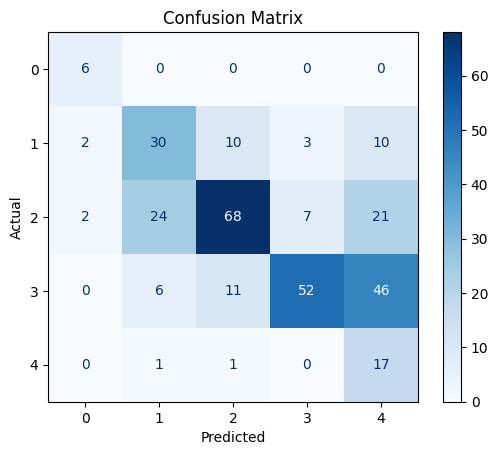

---------Running: Decision Tree using RandomOverSample
100%|██████████| 100/100 [00:02<00:00, 36.77trial/s, best loss: -0.5153515068755281]  
{'criterion': 0, 'max_depth': 8.0, 'max_features': 0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3.0, 'min_samples_split': 2.0, 'splitter': 1}

Testing Results:

Accuracy score:  0.4353312302839117
Precision score:  0.6400535709965076
Recall score:  0.4353312302839117
F1 score:  0.4609381835005619


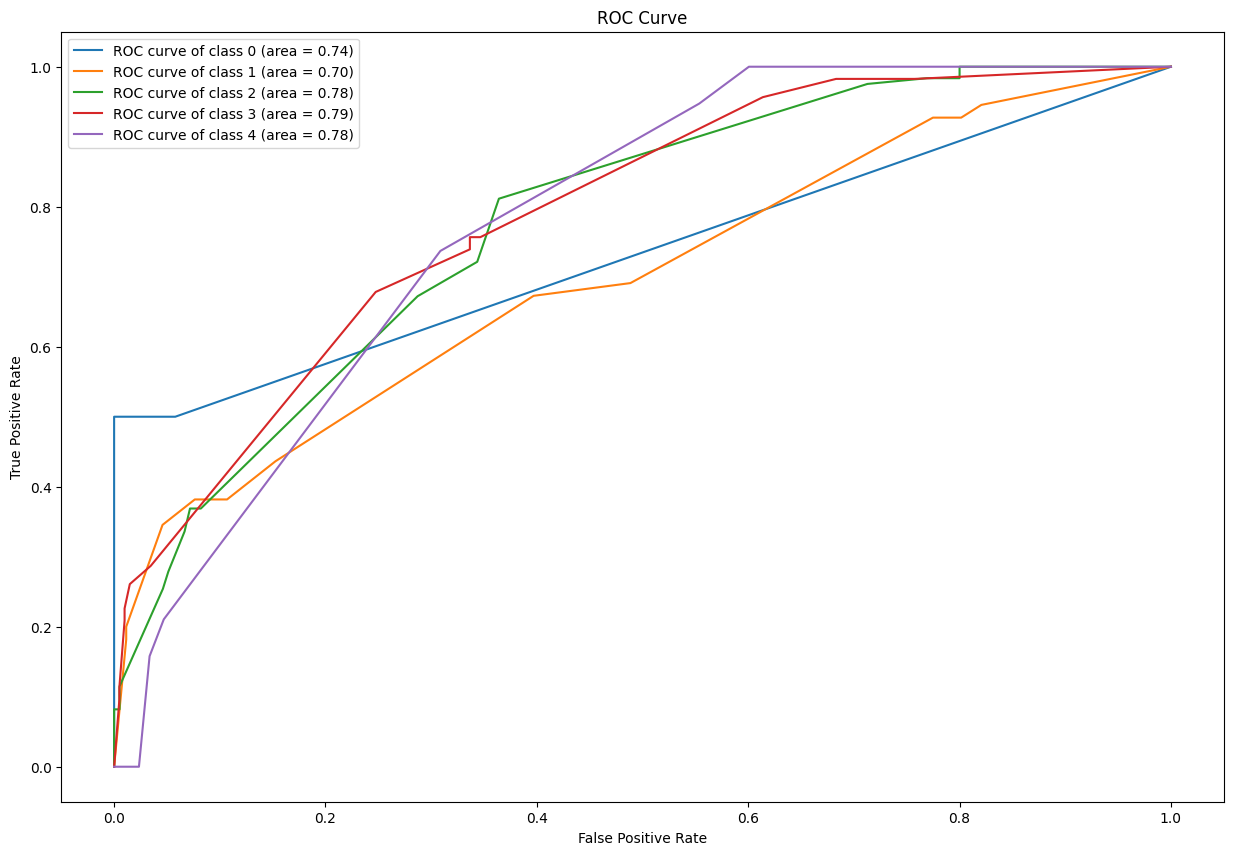

<Figure size 1500x1000 with 0 Axes>

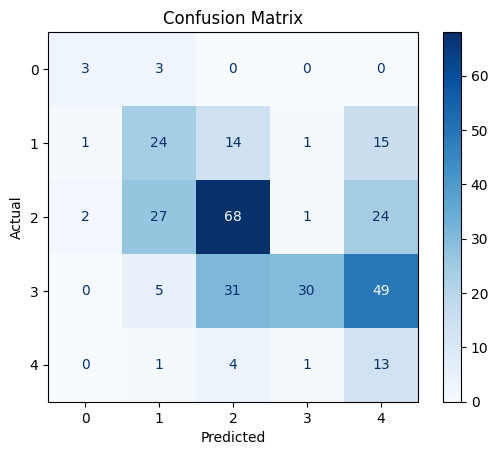

---------Running: K-Nearest Neighbors using RandomOverSample
100%|██████████| 100/100 [00:07<00:00, 13.24trial/s, best loss: -0.5160934927930387]
{'algorithm': 0, 'leaf_size': 24, 'metric': 0, 'n_neighbors': 20, 'p': 0, 'weights': 0}

Testing Results:

Accuracy score:  0.444794952681388
Precision score:  0.6153319313280319
Recall score:  0.444794952681388
F1 score:  0.4957611210326352


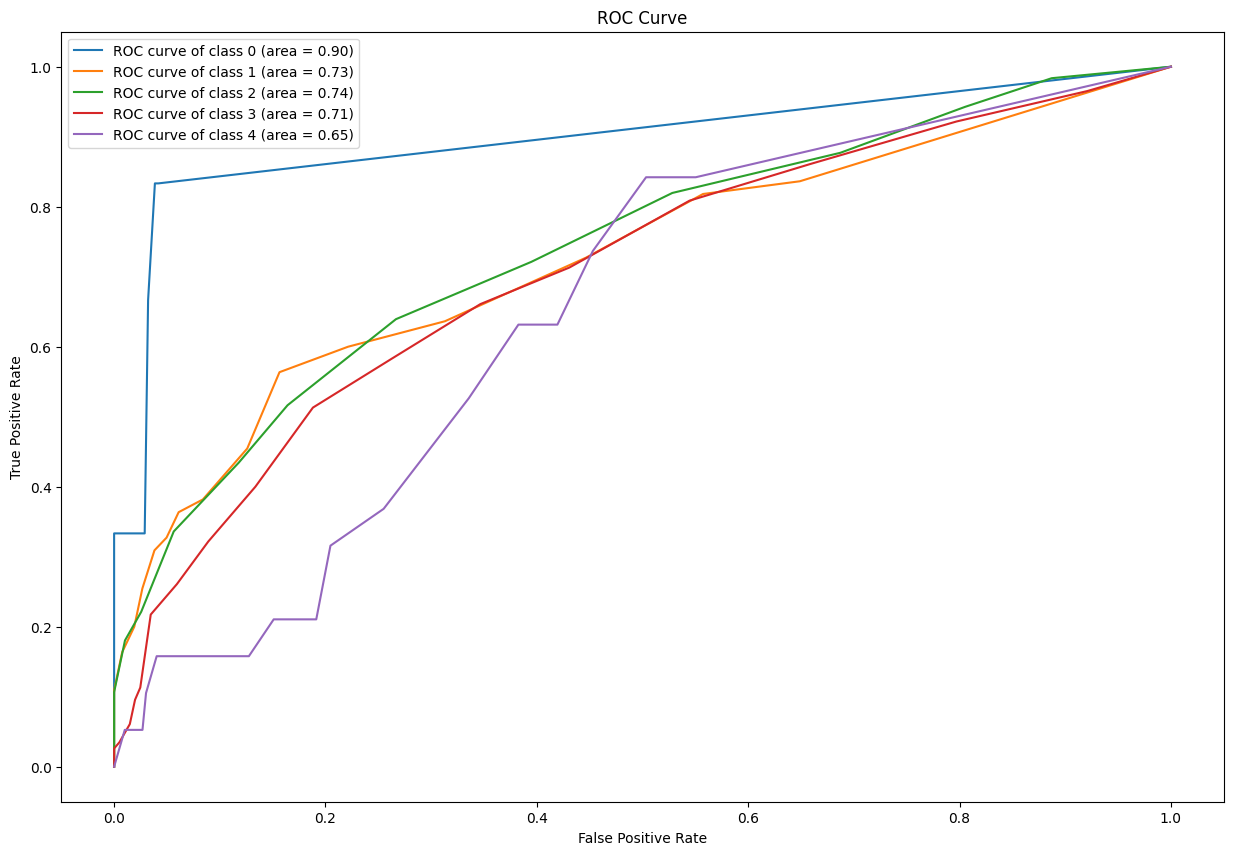

<Figure size 1500x1000 with 0 Axes>

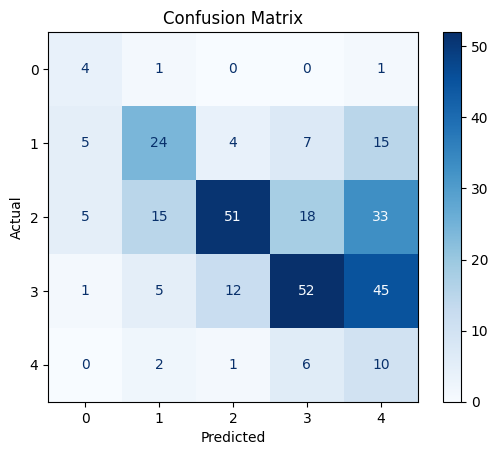

---------Running: Logistic Regression using RandomOverSample
  2%|▏         | 2/100 [00:00<00:26,  3.70trial/s, best loss: -0.5998070321233194]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 41%|████      | 41/100 [00:11<00:15,  3.77trial/s, best loss: -0.5998070321233194]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 47%|████▋     | 47/100 [00:12<00:12,  4.26trial/s, best loss: -0.5998070321233194]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 90%|█████████ | 90/100 [00:20<00:01,  6.98trial/s, best loss: -0.6001688655586517]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(



100%|██████████| 100/100 [00:22<00:00,  4.38trial/s, best loss: -0.6001688655586517]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




{'C': 9.200000000000001, 'max_iter': 347, 'penalty': 0, 'solver': 0, 'tolerance': 0.87, 'weights': 1}
{'C': 9.200000000000001, 'max_iter': 347, 'penalty': 0, 'solver': 'newton-cg', 'tolerance': 0.87, 'weights': None}

Testing Results:

Accuracy score:  0.5646687697160884
Precision score:  0.6910121541580673
Recall score:  0.5646687697160884
F1 score:  0.6001688655586517


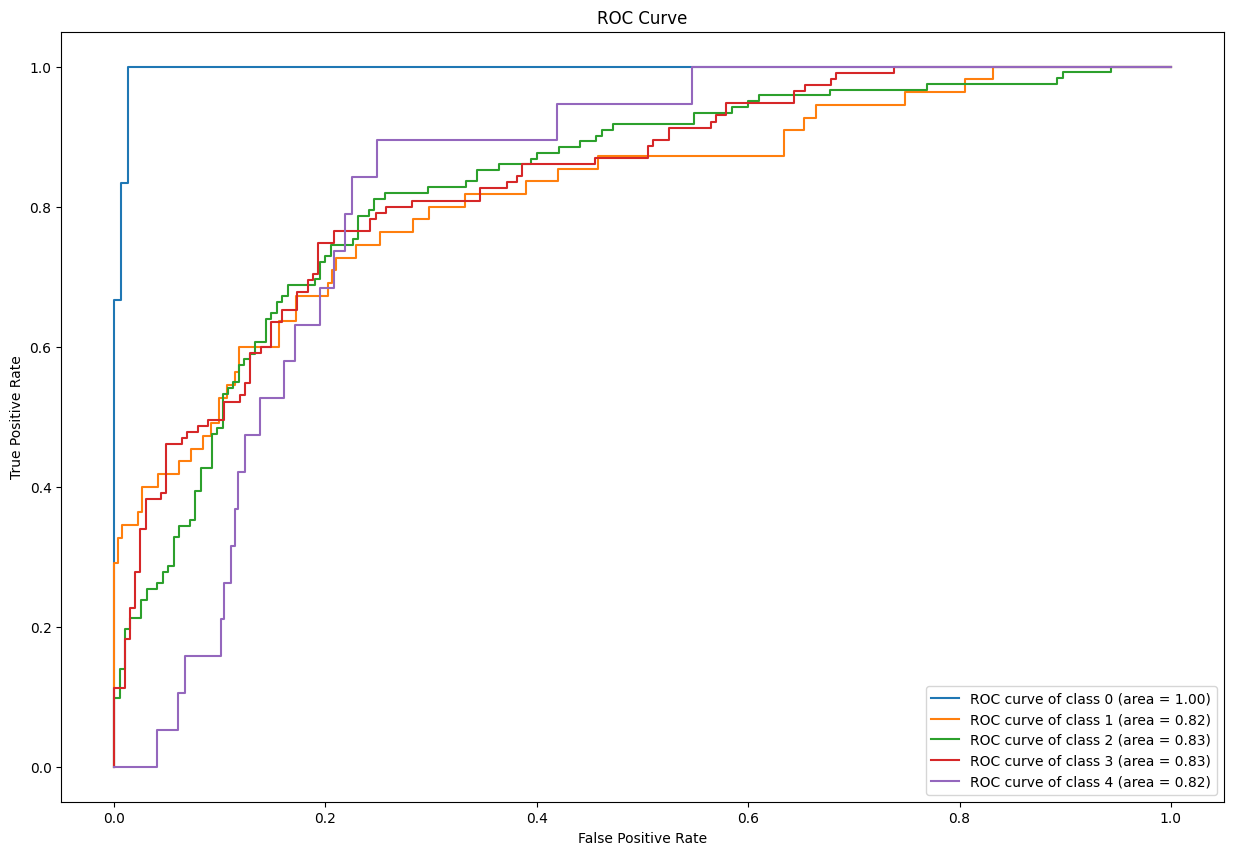

<Figure size 1500x1000 with 0 Axes>

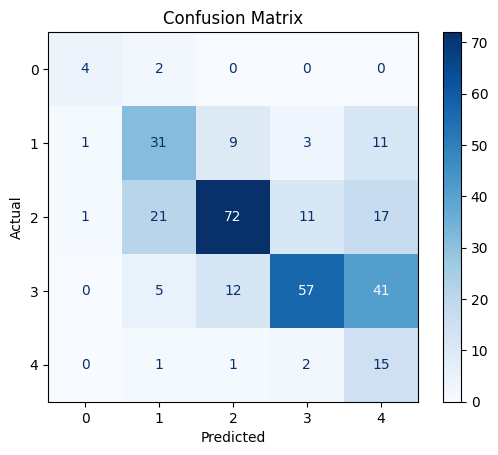

---------Running: RandomForest using RandomOverSample
  2%|▏         | 2/100 [00:00<00:22,  4.33trial/s, best loss: -0.6331772597658155]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



  8%|▊         | 8/100 [00:01<00:12,  7.55trial/s, best loss: -0.6331772597658155]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 11%|█         | 11/100 [00:01<00:12,  7.02trial/s, best loss: -0.6532283787822464]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 22%|██▏       | 22/100 [00:04<00:19,  4.07trial/s, best loss: -0.6545731103647336]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 24%|██▍       | 24/100 [00:04<00:14,  5.24trial/s, best loss: -0.6545731103647336]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 31%|███       | 31/100 [00:06<00:14,  4.76trial/s, best loss: -0.6559809381549975]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 38%|███▊      | 38/100 [00:07<00:09,  6.83trial/s, best loss: -0.6559809381549975]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:20<00:00,  4.82trial/s, best loss: -0.6740850660353926]
{'estimators': 63, 'max_features': 'log2', 'min_sample_leaf': 2, 'n_jobs': 4, 'oob_score': False, 'random_state': 5}

Testing Results:

Accuracy score:  0.6277602523659306
Precision score:  0.6259773742904363
Recall score:  0.6277602523659306
F1 score:  0.624780559357435


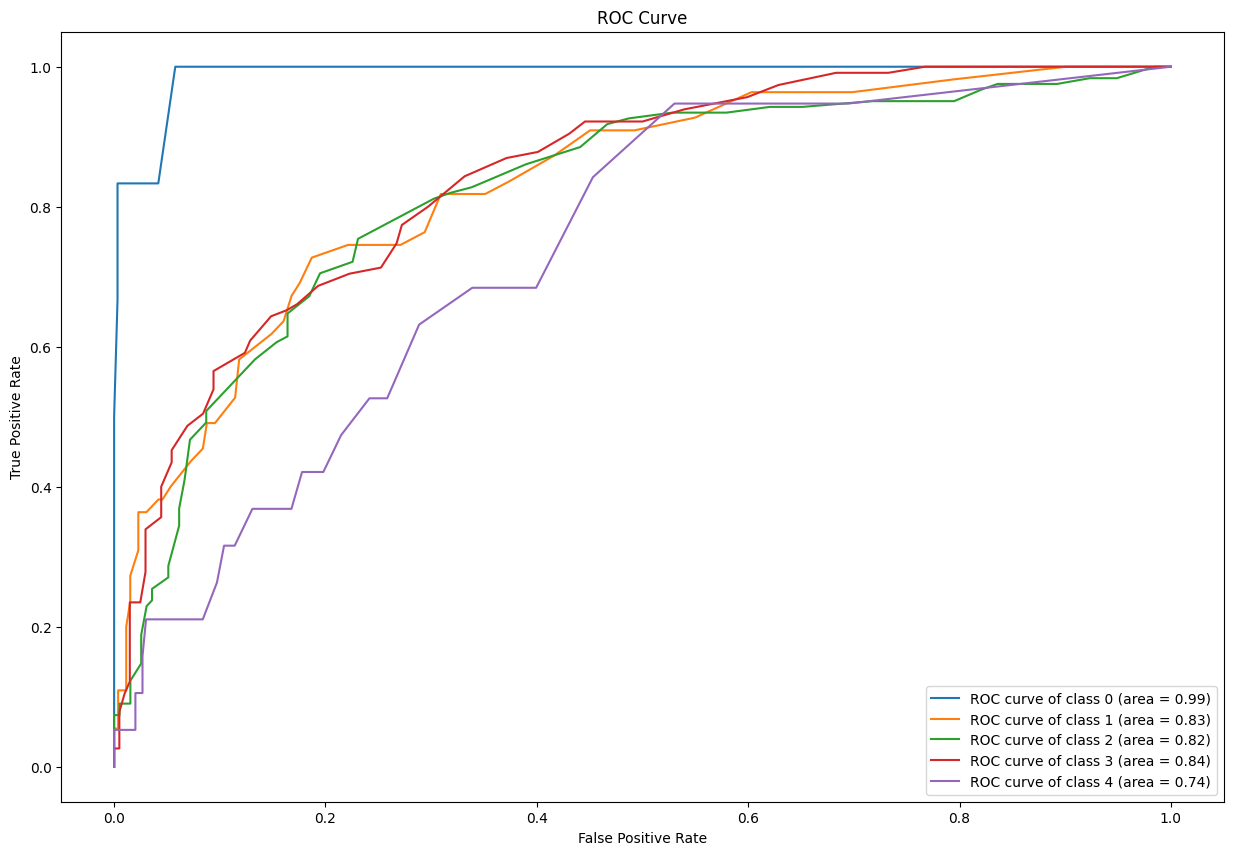

<Figure size 1500x1000 with 0 Axes>

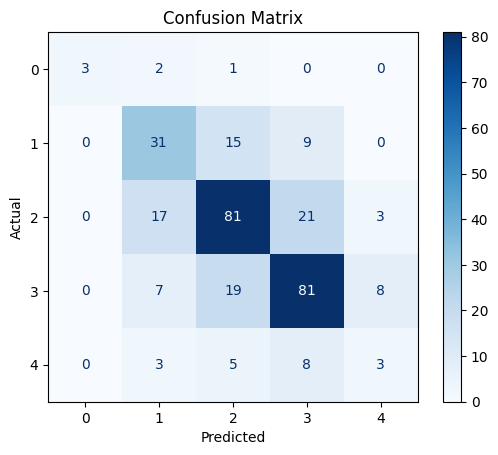

Modelo guardado com sucesso
---------Running: Xgboost using RandomOverSample
  2%|▏         | 2/100 [00:06<04:23,  2.69s/trial, best loss: -0.47686953295110485]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:43:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  4%|▍         | 4/100 [00:14<05:10,  3.23s/trial, best loss: -0.47686953295110485]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:43:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 16/100 [01:15<03:54,  2.79s/trial, best loss: -0.6326520205974016]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:44:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 18/100 [01:52<14:45, 10.80s/trial, best loss: -0.6326520205974016]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:45:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 19%|█▉        | 19/100 [01:52<10:18,  7.64s/trial, best loss: -0.6326520205974016]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:45:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 30/100 [02:03<00:42,  1.64trial/s, best loss: -0.6407515182556612]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:45:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 34%|███▍      | 34/100 [02:19<02:50,  2.58s/trial, best loss: -0.6407515182556612]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 39%|███▉      | 39/100 [02:33<02:30,  2.47s/trial, best loss: -0.6407515182556612]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:46:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 46/100 [02:40<00:42,  1.27trial/s, best loss: -0.6407515182556612]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:46:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 51%|█████     | 51/100 [02:56<02:00,  2.46s/trial, best loss: -0.6407515182556612]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:46:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 55%|█████▌    | 55/100 [03:05<01:42,  2.27s/trial, best loss: -0.6407515182556612]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:46:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 61%|██████    | 61/100 [03:33<02:28,  3.80s/trial, best loss: -0.6407515182556612]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:47:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 74/100 [05:25<04:27, 10.29s/trial, best loss: -0.6495219612073243]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:49:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 80/100 [05:46<02:07,  6.39s/trial, best loss: -0.6495219612073243]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:49:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 86/100 [05:55<00:40,  2.86s/trial, best loss: -0.6495219612073243]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 91%|█████████ | 91/100 [06:14<00:47,  5.31s/trial, best loss: -0.6495219612073243]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:49:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [06:21<00:02,  1.44s/trial, best loss: -0.6495219612073243]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [21:49:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [06:28<00:00,  3.88s/trial, best loss: -0.6495219612073243]
{'booster': 'dart', 'estimators': 77, 'gamma': 0.9, 'grow_policy': 'depthwise', 'learning_rate': 0.1, 'max_depth': 92, 'min_child_weight': 0}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.6435331230283912
Precision score:  0.6585352332467234
Recall score:  0.6435331230283912
F1 score:  0.6500339721331889


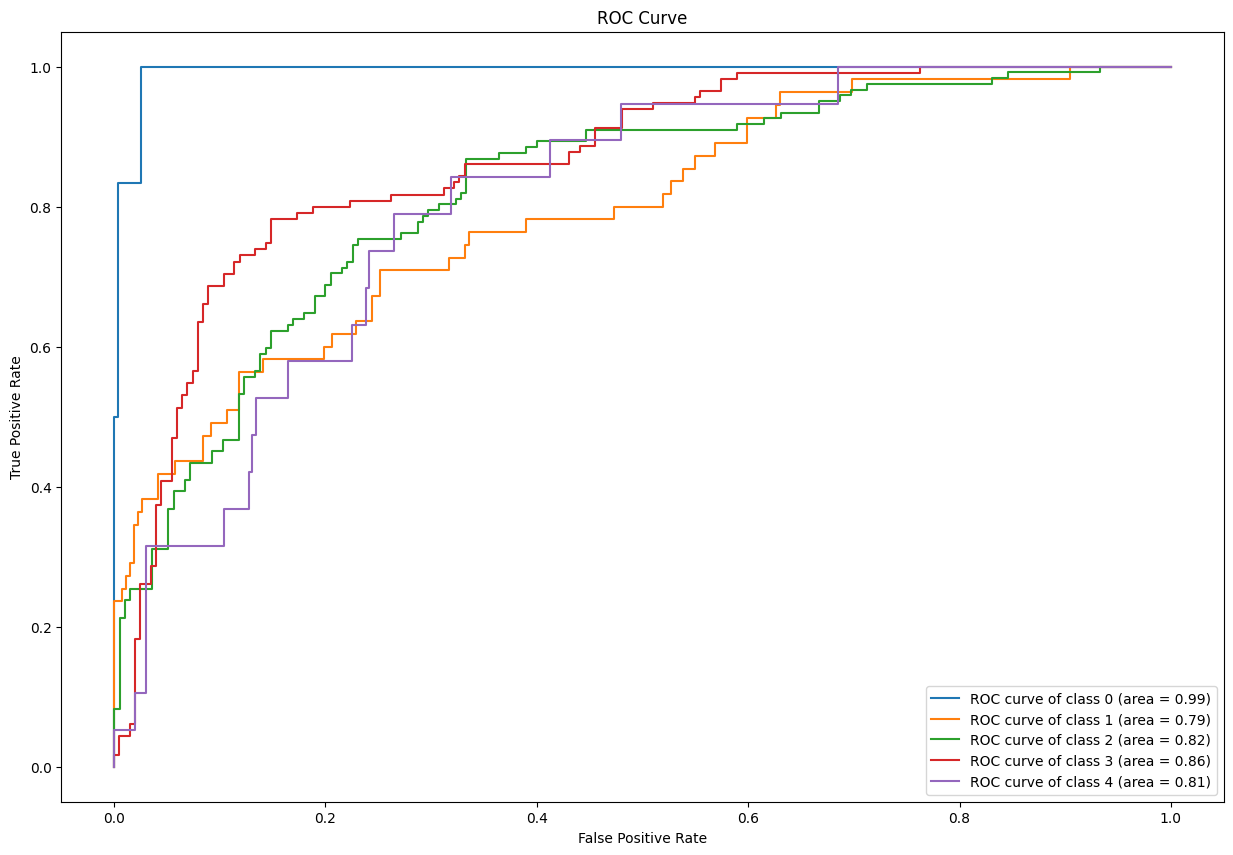

<Figure size 1500x1000 with 0 Axes>

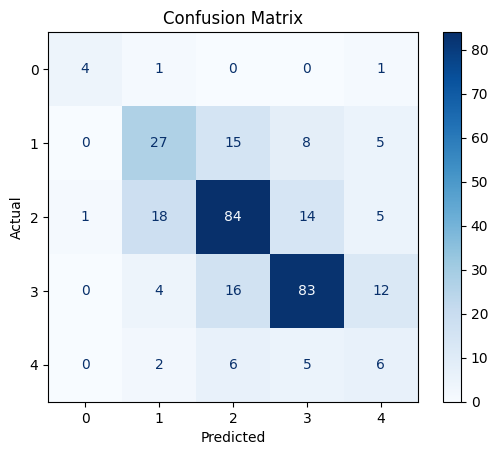

---------Running: AdaBoost using RandomOverSample
100%|██████████| 100/100 [00:35<00:00,  2.82trial/s, best loss: -0.5347174856183026]
{'algorithm': 'SAMME', 'estimators': 96, 'learning_rate': 1.6}
Modelo guardado com sucesso

Testing Results:

Accuracy score:  0.4227129337539432
Precision score:  0.5140466782451693
Recall score:  0.4227129337539432
F1 score:  0.3925379824962592


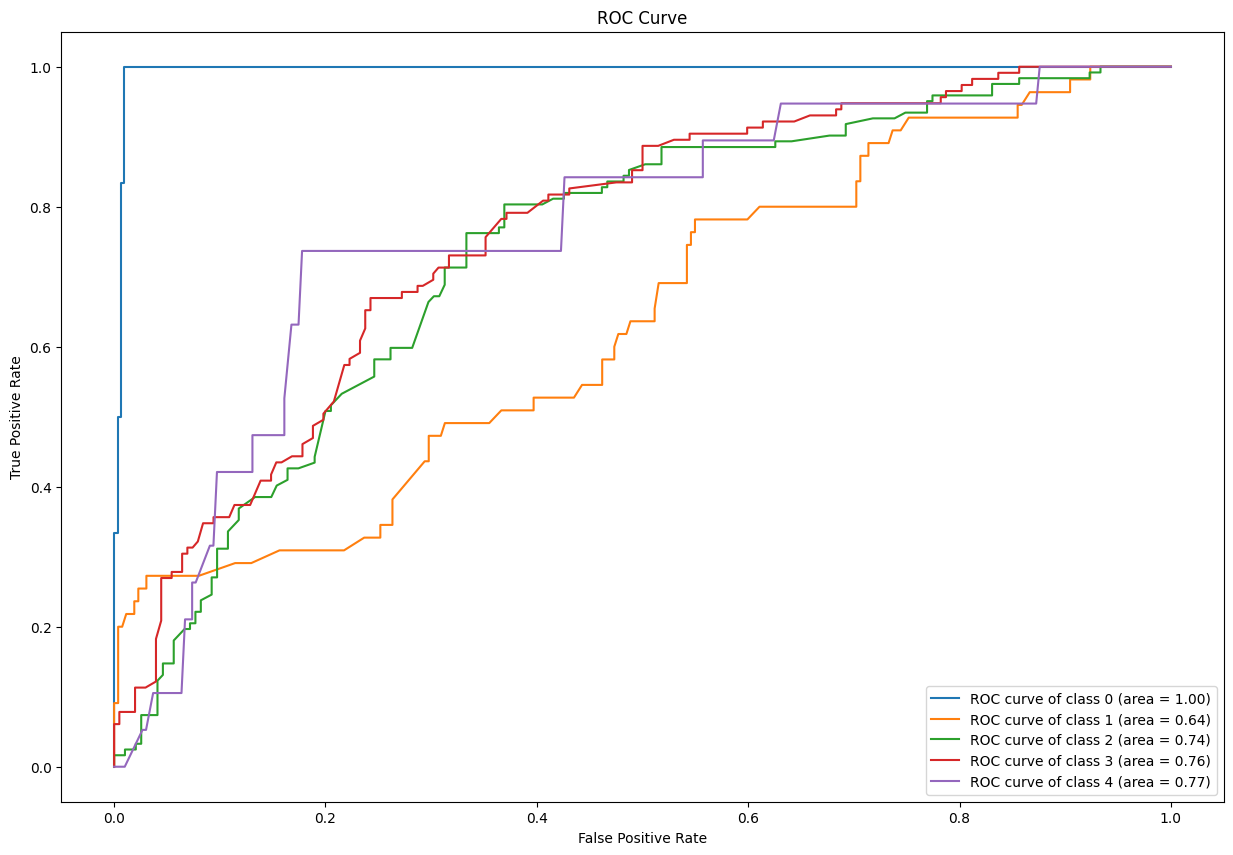

<Figure size 1500x1000 with 0 Axes>

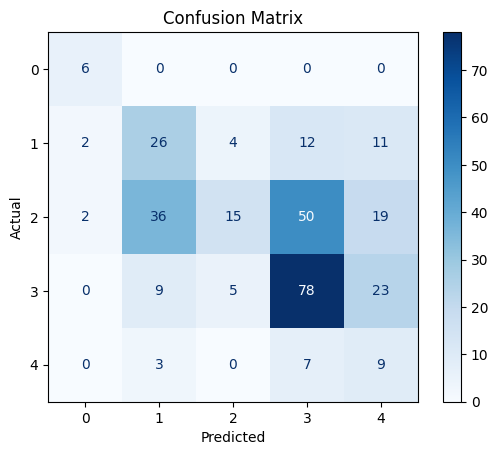

BEST: {'TomekLinks': {'Xgboost': {'accuracy': 0.6845425867507886, 'precision': 0.6629413864078438, 'recall': 0.6845425867507886, 'f1': 0.665365471142802}, 'SVM': {'accuracy': 0.6813880126182965, 'precision': 0.6450675231130328, 'recall': 0.6813880126182965, 'f1': 0.6582860698225659}, 'AdaBoost': {'accuracy': 0.6719242902208202, 'precision': 0.6323664635358697, 'recall': 0.6719242902208202, 'f1': 0.6424971641891056}}, 'Smote': {'SVM': {'accuracy': 0.6340694006309149, 'precision': 0.6753533882871422, 'recall': 0.6340694006309149, 'f1': 0.6496573695468426}, 'Xgboost': {'accuracy': 0.6309148264984227, 'precision': 0.6738168519707634, 'recall': 0.6309148264984227, 'f1': 0.6473171431943879}, 'AdaBoost': {'accuracy': 0.5236593059936908, 'precision': 0.5882996778895832, 'recall': 0.5236593059936908, 'f1': 0.5447194356279463}}, 'SmoteTomek': {'Logistic Regression': {'accuracy': 0.637223974763407, 'precision': 0.6810151062366223, 'recall': 0.637223974763407, 'f1': 0.6535057681163894}, 'SVM': {'a

In [197]:
list_balance={
    "TomekLinks":tomek_links_hyperopt,
    "Smote":smote_hyperopt,
    "SmoteTomek":smote_tomek_hyperopt,
    "RandomOverSample":random_over_sample_hyperopt  
}

def best_hyperopt():

    best={}
    for balance_name, balance_func in list_balance.items():
        orderRes={}
        best_aux={}
        orderRes[balance_name] = balance_func()
        tres_primeiros_chaves = list(orderRes[balance_name].keys())[:3]
        tres_primeiros_dict = {chave: orderRes[balance_name][chave] for chave in tres_primeiros_chaves}
        best_aux[balance_name] = tres_primeiros_dict 
        best.update(best_aux)

    print(f"BEST: {best}")
    print("-------------------------------------------------------------")
    print("-------------------------------------------------------------")
    print("\n \n Exibição dos resultados com base na ACCURACY") 


    for name_balance, models in best.items():
            print(f"Técnica de Balanceamento: {name_balance}")
            print(f"Modelos {models}")
      


best_hyperopt()

In [198]:
#print best f1 score
print(f"Best F1 scores com hyperopt: {best_scores}")

Best F1 scores com hyperopt: {'SVM': 0.6582860698225659, 'Decision Tree': 0.5627879716428839, 'K-Nearest Neighbors': 0.5868437776529187, 'Logistic Regression': 0.6535057681163894, 'Neural Network': 0.0, 'RandomForest': 0.624780559357435, 'Xgboost': 0.665365471142802, 'AdaBoost': 0.6424971641891056}


### The best for Grid Search

Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({2: 294, 3: 283, 1: 135, 4: 36, 0: 20})
---------Running: SVM using TomekLinks
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.01, kernel=linear, probability=True...................
[CV 1/10; 1/10] END C=0.01, kernel=linear, probability=True;, score=0.441 total time=   0.1s
[CV 2/10; 1/10] START C=0.01, kernel=linear, probability=True...................
[CV 2/10; 1/10] END C=0.01, kernel=linear, probability=True;, score=0.487 total time=   0.0s
[CV 3/10; 1/10] START C=0.01, kernel=linear, probability=True...................
[CV 3/10; 1/10] END C=0.01, kernel=linear, probability=True;, score=0.448 total time=   0.0s
[CV 4/10; 1/10] START C=0.01, kernel=linear, probability=True...................
[CV 4/10; 1/10] END C=0.01, kernel=linear, probability=True;, score=0.426 total time=   0.0s
[CV 5/10; 1/10] START C=0.01, kernel=linear, probability=True..........

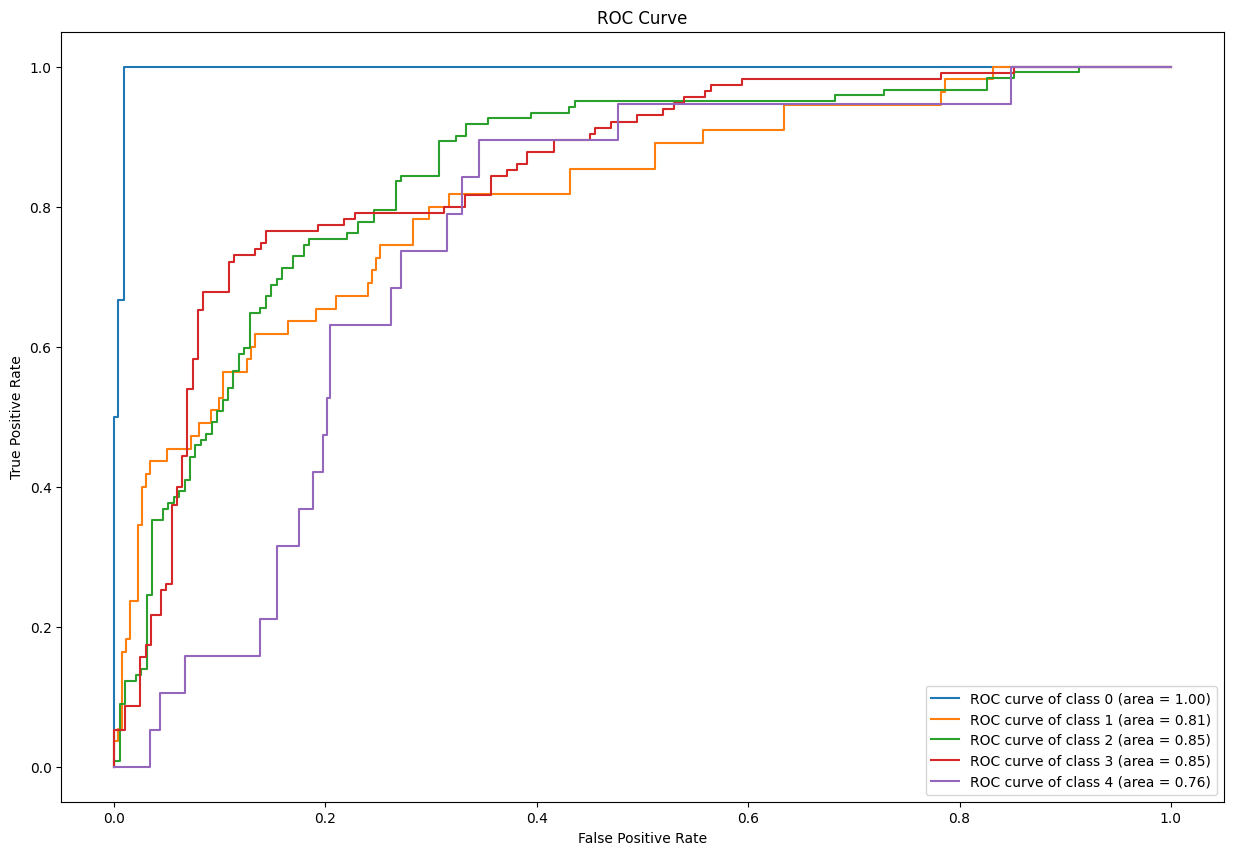

<Figure size 1500x1000 with 0 Axes>

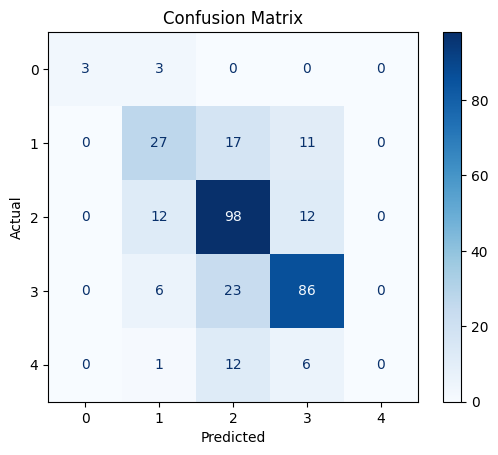

---------Running: Decision Tree using TomekLinks
Fitting 5 folds for each of 109440 candidates, totalling 547200 fits
[CV 1/5; 1/109440] START criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 1/109440] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.244 total time=   0.0s
[CV 2/5; 1/109440] START criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 1/109440] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.232 total time=   0.0s
[CV 3/5; 1/109440] START criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 1/109440] END criterion=gini, max_de

KeyboardInterrupt: 

In [213]:
list_balance={
    "TomekLinks":tomek_links_gridsearch,
    "Smote":smote_gridsearch,
    "SmoteTomek":smote_tomek_gridsearch,
    "RandomOverSample":random_over_sample_gridsearch  
}

def best_gridsearch():

    best={}
    for balance_name, balance_func in list_balance.items():
        orderRes={}
        best_aux={}
        orderRes[balance_name] = balance_func()
        tres_primeiros_chaves = list(orderRes[balance_name].keys())[:3]
        tres_primeiros_dict = {chave: orderRes[balance_name][chave] for chave in tres_primeiros_chaves}
        best_aux[balance_name] = tres_primeiros_dict 
        best.update(best_aux)

    print(f"BEST: {best}")
    print("-------------------------------------------------------------")
    print("-------------------------------------------------------------")
    print("\n \n Exibição dos resultados com base na ACCURACY") 


    for name_balance, models in best.items():
            print(f"Técnica de Balanceamento: {name_balance}")
            print(f"Modelos {models}")
      


best_hyperopt()

# Save Model

In [150]:
import joblib

def save_model(model, filename):

    folder_path = "Models"
    file_path = f"{folder_path}/{filename}/model_{filename}.joblib"

    joblib.dump(model, file_path)

    print("Modelo guardado com sucesso")

